# Are some train routes more likely to experience delays than others? Visualize and proof statistically.

Import modules and packages

In [1]:
import src.data_processing.data as data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import geopandas as gpd

Initialise variables

In [3]:
trips = data.full_trips
stations = data.stations
# put all station names in lower case in stations and trips
stations["name"] = stations["name"].str.lower()
trips["Name of the stop"] = trips["Name of the stop"].str.lower()

In [4]:
trips[["Delay time","Train number"]].sort_values(by = "Delay time" , ascending = False)

Delay time  Train number
36675       86399          2422
43688       86397           723
3041        86397          1922
54352       86393          2294
13498       86393          2294
...           ...           ...
10439           0          3312
10445           0          3312
10446           0          4681
10450           0          4862
27317           0          4238

[440943 rows x 2 columns]

In [5]:
trips[["Delay time"]].describe()

Delay time
count  440943.000000
mean      132.252935
std       973.275448
min         0.000000
25%         0.000000
50%        31.000000
75%       123.000000
max     86399.000000

Some delay times are 'impossible', such as the max and another example below, so delete outliers

In [7]:
for x in trips[['Delay time']]:
    q75,q25 = np.percentile(trips.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(3*intr_qr)
    min = q25-(3*intr_qr)

    trips.loc[trips[x] < min,x] = np.nan
    trips.loc[trips[x] > max,x] = np.nan

trips[["Delay time"]].isnull().sum()


Delay time    22335
dtype: int64

In [8]:
trips = trips.dropna(subset=["Delay time"])
trips[["Delay time"]].count()

Delay time    418608
dtype: int64

In [9]:

trips[["Delay time"]].isnull().sum()

Delay time    0
dtype: int64

In [10]:

trips["Delay time"].describe()

count    418608.000000
mean         70.993488
std         101.911997
min           0.000000
25%           0.000000
50%          26.000000
75%         102.000000
max         492.000000
Name: Delay time, dtype: float64

Merge trips and stations so we can get long and latitude

In [11]:
trips = trips.merge(stations, left_on = "Name of the stop", right_on = "name")
trips

Unnamed: 0 Date of departure  Train number Relation Railway operators  \
0                3        2020-09-22            11      ICE         SNCB/NMBS   
1              422        2020-09-22            17      ICE         SNCB/NMBS   
2              502        2020-09-22          1940  IC 06-1         SNCB/NMBS   
3              515        2020-09-22          1939  IC 06-1         SNCB/NMBS   
4              555        2020-09-22          1539    IC 03         SNCB/NMBS   
...            ...               ...           ...      ...               ...   
313648       18698        2020-09-26           581     L 02         SNCB/NMBS   
313649       20938        2020-09-26           583     L 02         SNCB/NMBS   
313650       21489        2020-09-26           585     L 02         SNCB/NMBS   
313651       23159        2020-09-26           587     L 02         SNCB/NMBS   
313652       23959        2020-09-26           589     L 02         SNCB/NMBS   

       Railway of departure Time of real arrival Time of real departure  \
0                       36N  2022-10-28 06:38:39    2022-10-28 06:38:39   
1                       36N  2022-10-28 14:40:29    2022-10-28 14:40:29   
2                        36  2022-10-28 18:50:02    2022-10-28 18:51:59   
3                        36  2022-10-28 17:49:28    2022-10-28 17:51:35   
4                       36N  2022-10-28 17:30:00    2022-10-28 17:30:00   
...                     ...                  ...                    ...   
313648                  NaN  2022-10-28 11:56:31                    NaT   
313649                  NaN  2022-10-28 13:55:32                    NaT   
313650                  NaN  2022-10-28 15:55:37                    NaT   
313651                  NaN  2022-10-28 17:56:01                    NaT   
313652                  NaN  2022-10-28 19:54:59                    NaT   

       Time of planned arrival Time of planned departure  ...  \
0          2022-10-28 06:38:00       2022-10-28 06:38:00  ...   
1          2022-10-28 14:39:00       2022-10-28 14:39:00  ...   
2          2022-10-28 18:50:00       2022-10-28 18:51:00  ...   
3          2022-10-28 17:50:00       2022-10-28 17:51:00  ...   
4          2022-10-28 17:31:00       2022-10-28 17:31:00  ...   
...                        ...                       ...  ...   
313648     2022-10-28 11:56:00                       NaT  ...   
313649     2022-10-28 13:56:00                       NaT  ...   
313650     2022-10-28 15:56:00                       NaT  ...   
313651     2022-10-28 17:56:00                       NaT  ...   
313652     2022-10-28 19:56:00                       NaT  ...   

       Date of real arrival Date of real departure Delay time        URI  \
0                2020-09-22             2020-09-22       39.0  008811213   
1                2020-09-22             2020-09-22       89.0  008811213   
2                2020-09-22             2020-09-22        2.0  008811213   
3                2020-09-22             2020-09-22        0.0  008811213   
4                2020-09-22             2020-09-22        0.0  008811213   
...                     ...                    ...        ...        ...   
313648           2020-09-26                    NaN       31.0  008891173   
313649           2020-09-26                    NaN        0.0  008891173   
313650           2020-09-26                    NaN        0.0  008891173   
313651           2020-09-26                    NaN        1.0  008891173   
313652           2020-09-26                    NaN        0.0  008891173   

                    name country-code longitude   latitude avg_stop_times  \
0                 diegem           be  4.442774  50.890478     369.843284   
1                 diegem           be  4.442774  50.890478     369.843284   
2                 diegem           be  4.442774  50.890478     369.843284   
3                 diegem           be  4.442774  50.890478     369.843284   
4                 diegem           be  4.442774  50.890

In [12]:
trips.dtypes

Unnamed: 0                            int64
Date of departure                    object
Train number                          int64
Relation                             object
Railway operators                    object
Railway of departure                 object
Time of real arrival         datetime64[ns]
Time of real departure       datetime64[ns]
Time of planned arrival      datetime64[ns]
Time of planned departure    datetime64[ns]
Direction of relation                object
Name of the stop                     object
Railway of arrival                   object
Date of planned arrival              object
Date of planned departure            object
Date of real arrival                 object
Date of real departure               object
Delay time                          float64
URI                                  object
name                                 object
country-code                         object
longitude                           float64
latitude                        

In [13]:
trips.columns

Index(['Unnamed: 0', 'Date of departure', 'Train number', 'Relation',
       'Railway operators', 'Railway of departure', 'Time of real arrival',
       'Time of real departure', 'Time of planned arrival',
       'Time of planned departure', 'Direction of relation',
       'Name of the stop', 'Railway of arrival', 'Date of planned arrival',
       'Date of planned departure', 'Date of real arrival',
       'Date of real departure', 'Delay time', 'URI', 'name', 'country-code',
       'longitude', 'latitude', 'avg_stop_times', 'official_transfer_time'],
      dtype='object')

Many columns we don't need, filter out the ones that are useful to us

In [14]:
trips = trips[['Date of departure', 'Train number','Time of real arrival',
       'Time of real departure', 'Time of planned arrival',
       'Time of planned departure','Name of the stop', 'Delay time', 'longitude', 'latitude']]

A route is just an array of subsequent train stops

In [86]:
#get all train numbers from train_trips
train_numbers = trips["Train number"].unique()
# # create the routes
# routes = []
# for train_number in train_numbers:
#     routes.append(trips[trips["Train number"] == train_number].sort_values(by= "Time of real departure"))
# # sort the routes based on train number
# routes.sort(key = lambda x: x["Train number"].iloc[0])
routes = {}
for train_number in train_numbers:
    routes[train_number] = trips[trips["Train number"] == train_number].sort_values(by= "Time of real departure")

# we can use the train number as the key

for train_number in train_numbers:
    routes[train_number]["Number of delays"] = len(routes.get(train_number)[routes.get(train_number)["Delay time"] > 0])
routes.get(10)

Date of departure  Train number Time of real arrival  \
41287        2020-09-26            10  2022-10-28 20:26:47   
41329        2020-09-25            10  2022-10-28 20:27:51   
41254        2020-09-21            10  2022-10-28 20:27:54   
41130        2020-09-22            10  2022-10-28 20:30:31   
41158        2020-09-23            10  2022-10-28 20:35:15   
...                 ...           ...                  ...   
584          2020-09-23            10  2022-10-28 21:23:14   
926          2020-09-20            10  2022-10-28 21:24:31   
95320        2020-09-24            10  2022-10-28 21:24:42   
62564        2020-09-24            10  2022-10-28 21:25:34   
2365         2020-09-24            10  2022-10-28 21:26:29   

      Time of real departure Time of planned arrival  \
41287    2022-10-28 20:26:47     2022-10-28 20:29:00   
41329    2022-10-28 20:27:51     2022-10-28 20:29:00   
41254    2022-10-28 20:27:54     2022-10-28 20:29:00   
41130    2022-10-28 20:30:31     2022-10-28 20:29:00   
41158    2022-10-28 20:35:15     2022-10-28 20:29:00   
...                      ...                     ...   
584      2022-10-28 21:24:17     2022-10-28 21:19:00   
926      2022-10-28 21:24:31     2022-10-28 21:21:00   
95320    2022-10-28 21:24:42     2022-10-28 21:17:00   
62564    2022-10-28 21:25:34     2022-10-28 21:18:00   
2365     2022-10-28 21:26:29     2022-10-28 21:19:00   

      Time of planned departure Name of the stop  Delay time  longitude  \
41287       2022-10-28 20:29:00       hergenrath         0.0   6.041335   
41329       2022-10-28 20:29:00       hergenrath         0.0   6.041335   
41254       2022-10-28 20:29:00       hergenrath         0.0   6.041335   
41130       2022-10-28 20:29:00       hergenrath        91.0   6.041335   
41158       2022-10-28 20:29:00       hergenrath       375.0   6.041335   
...                         ...              ...         ...        ...   
584         2022-10-28 21:19:00           diegem       254.0   4.442774   
926         2022-10-28 21:21:00           diegem       211.0   4.442774   
95320       2022-10-28 21:17:00         nossegem       462.0   4.506112   
62564       2022-10-28 21:18:00         zaventem       454.0   4.469886   
2365        2022-10-28 21:19:00           diegem       449.0   4.442774   

        latitude  Number of delays  
41287  50.718209                46  
41329  50.718209                46  
41254  50.718209                46  
41130  50.718209                46  
41158  50.718209                46  
...          ...               ...  
584    50.890478                46  
926    50.890478                46  
95320  50.883314                46  
62564  50.885723                46  
2365   50.890478                46  

[77 rows x 11 columns]

In [90]:
delay_occurences_per_route = {}
for train_number in train_numbers:
    if not delay_occurences_per_route .__contains__(train_number):
     delay_occurences_per_route [train_number]  = routes[train_number]["Number of delays"] = len(routes.get(train_number)[routes.get(train_number)["Delay time"] > 0])/ len(routes.get(train_number))
delay_occurences_per_route
routes.get(12161)

Date of departure  Train number Time of real arrival  \
139781        2020-09-25         12161  2022-10-28 11:41:31   
139574        2020-09-22         12161  2022-10-28 11:41:55   
139617        2020-09-23         12161  2022-10-28 11:41:52   
139727        2020-09-21         12161  2022-10-28 11:42:16   
139829        2020-09-24         12161  2022-10-28 11:42:44   
19628         2020-09-25         12161  2022-10-28 11:45:48   
19107         2020-09-23         12161  2022-10-28 11:46:04   
19404         2020-09-21         12161  2022-10-28 11:46:31   
18993         2020-09-22         12161  2022-10-28 11:46:18   
19731         2020-09-24         12161  2022-10-28 11:46:54   
18742         2020-09-25         12161  2022-10-28 11:52:38   
18654         2020-09-21         12161  2022-10-28 11:53:01   
18792         2020-09-24         12161  2022-10-28 11:53:17   
18504         2020-09-22         12161  2022-10-28 11:53:21   
18570         2020-09-23         12161  2022-10-28 11:53:16   
30723         2020-09-21         12161  2022-10-28 11:54:00   
30846         2020-09-24         12161  2022-10-28 11:54:17   
30630         2020-09-23         12161  2022-10-28 11:53:31   
30818         2020-09-25         12161  2022-10-28 11:54:32   
30561         2020-09-22         12161  2022-10-28 11:54:42   
11723         2020-09-21         12161  2022-10-28 11:58:00   
11867         2020-09-24         12161  2022-10-28 11:58:17   
11831         2020-09-25         12161  2022-10-28 11:58:32   
11574         2020-09-22         12161  2022-10-28 11:58:42   
11642         2020-09-23         12161  2022-10-28 11:59:46   
11448         2020-09-24         12161  2022-10-28 12:01:15   
11287         2020-09-21         12161  2022-10-28 12:01:03   
11152         2020-09-22         12161  2022-10-28 12:01:45   
11398         2020-09-25         12161  2022-10-28 12:01:53   
11228         2020-09-23         12161  2022-10-28 12:01:59   
12819         2020-09-21         12161  2022-10-28 12:04:57   
12665         2020-09-22         12161  2022-10-28 12:05:25   
12912         2020-09-25         12161  2022-10-28 12:05:42   
12739         2020-09-23         12161  2022-10-28 12:06:27   
12959         2020-09-24         12161  2022-10-28 12:04:47   
55030         2020-09-21         12161  2022-10-28 12:07:12   
54529         2020-09-22         12161  2022-10-28 12:07:47   
55584         2020-09-24         12161  2022-10-28 12:08:28   
55493         2020-09-25         12161  2022-10-28 12:07:49   
54714         2020-09-23         12161  2022-10-28 12:09:09   
54082         2020-09-24         12161  2022-10-28 12:12:22   
53948         2020-09-25         12161  2022-10-28 12:12:33   
53440         2020-09-21         12161  2022-10-28 12:11:13   
52840         2020-09-22         12161  2022-10-28 12:12:02   
53080         2020-09-23         12161  2022-10-28 12:13:31   
72153         2020-09-25         12161  2022-10-28 12:17:56   
72248         2020-09-24         12161  2022-10-28 12:17:47   
71423         2020-09-22         12161  2022-10-28 12:18:06   
71563         2020-09-23         12161  2022-10-28 12:17:56   
71810         2020-09-21         12161  2022-10-28 12:18:33   
81319         2020-09-22         12161  2022-10-28 12:22:19   
81480         2020-09-23         12161  2022-10-28 12:21:58   
81854         2020-09-21         12161  2022-10-28 12:22:20   
82100         2020-09-25         12161  2022-10-28 12:21:55   
82191         2020-09-24         12161  2022-10-28 12:22:41   

       Time of real departure Time of planned arrival  \
139781    2022-10-28 11:41:31     2022-10-28 11:41:00   
139574    2022-10-28 11:41:55     2022-10-28 11:41:00   
139617    2022-10-28 11:41:57     2022-10-28 11:41:00   
139727    2022-10-28 11:42:16     2022-10-28 11:41:00   
139829    2022-10-28 11:42:44     2022-10-28 11:41:00   
19628     2022-10-28 11:46:53     2022-10-28 11:45:00   
19107     2022-10-28 11:47:04     2022-10-28 11:45:00   
19404     2022-10-28 1

(array([194.,   0.,   0.,   0.,   1.,   2.,   1.,   1.,   1.,   1.,   3.,
          4.,   1.,   1.,  23.,   9.,  16.,   1.,   4.,   5.,  33.,   6.,
         14.,   6.,   9.,  31.,  14.,  13.,  34.,  13.,  45.,  23.,  11.,
         41.,  26.,  23.,  31.,  37.,  37.,  17.,  70.,  30.,  72.,  28.,
         49.,  46.,  63.,  42.,  58.,  24., 201.,  54.,  59.,  61.,  73.,
         93.,  57.,  85.,  61.,  54., 145.,  93.,  94.,  68.,  65.,  88.,
        114.,  72.,  95., 112.,  64.,  77.,  90.,  81.,  74.,  91.,  60.,
         65.,  68.,  50.,  89.,  54.,  46.,  57.,  44.,  56.,  33.,  45.,
         50.,  17.,  36.,  22.,  13.,  13.,  14.,   8.,   7.,   5.,   1.,
         75.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

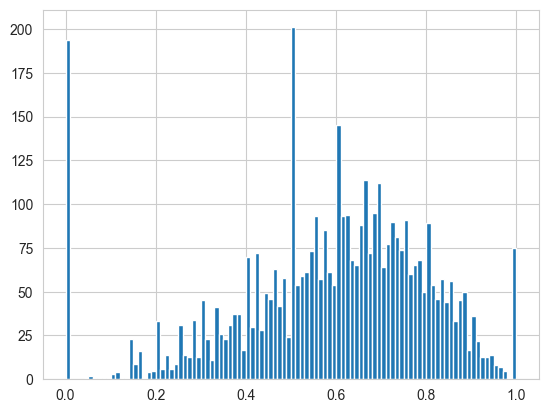

In [100]:
delay_occurences = pd.DataFrame.from_dict(delay_occurences_per_route, orient ="index")
delay_occurences = delay_occurences.reset_index()
delay_occurences= delay_occurencs.rename(columns={"index": "Route", 0: "Delay_frequency"})
plt.hist(delay_occurences["Delay_frequency"], bins = 100)


In [101]:
def check_dict(dictionary):
    for key, value in dictionary.items():
        if value == 1:
            print(key)
check_dict(delay_occurences_per_route)
routes[12157]

9448
7489
12157
3970
6566
6557
3956
3958
3957
8659
8660
3891
2187
2182
2184
2179
2188
2183
2178
2186
2180
2181
2177
4486
19223
9304
9810
9846
9830
9838
8572
9870
9606
9891
9375
9600
9816
9603
9360
9372
8953
8678
8677
5840
5837
5838
5836
5834
5828
5827
5826
5830
5833
5832
5937
5935
5926
5928
4638
4641
4367
19901
19945
19907
19929
19947
19955
17209
19703
8013
7494
9334
8457
8458
5372


Date of departure  Train number Time of real arrival  \
139701        2020-09-21         12157  2022-10-28 07:41:49   
139793        2020-09-25         12157  2022-10-28 07:42:34   
139611        2020-09-23         12157  2022-10-28 07:42:36   
139826        2020-09-24         12157  2022-10-28 07:43:40   
139544        2020-09-22         12157  2022-10-28 07:44:15   
19320         2020-09-21         12157  2022-10-28 07:45:44   
19102         2020-09-23         12157  2022-10-28 07:46:11   
19653         2020-09-25         12157  2022-10-28 07:46:36   
19729         2020-09-24         12157  2022-10-28 07:47:56   
18900         2020-09-22         12157  2022-10-28 07:48:19   
18670         2020-09-21         12157  2022-10-28 07:52:33   
18768         2020-09-25         12157  2022-10-28 07:53:27   
18574         2020-09-23         12157  2022-10-28 07:53:43   
18796         2020-09-24         12157  2022-10-28 07:54:17   
18459         2020-09-22         12157  2022-10-28 07:54:45   
30808         2020-09-25         12157  2022-10-28 07:54:37   
30708         2020-09-21         12157  2022-10-28 07:55:00   
30625         2020-09-23         12157  2022-10-28 07:54:30   
30516         2020-09-22         12157  2022-10-28 07:55:48   
30852         2020-09-24         12157  2022-10-28 07:55:56   
11839         2020-09-25         12157  2022-10-28 07:58:37   
11738         2020-09-21         12157  2022-10-28 07:59:00   
11647         2020-09-23         12157  2022-10-28 07:59:46   
11531         2020-09-22         12157  2022-10-28 07:59:48   
11866         2020-09-24         12157  2022-10-28 07:59:56   
11411         2020-09-25         12157  2022-10-28 08:01:32   
11230         2020-09-23         12157  2022-10-28 08:02:02   
11329         2020-09-21         12157  2022-10-28 08:02:00   
11117         2020-09-22         12157  2022-10-28 08:02:58   
11452         2020-09-24         12157  2022-10-28 08:03:04   
12918         2020-09-25         12157  2022-10-28 08:05:16   
12740         2020-09-23         12157  2022-10-28 08:05:53   
12835         2020-09-21         12157  2022-10-28 08:06:15   
12628         2020-09-22         12157  2022-10-28 08:06:44   
12963         2020-09-24         12157  2022-10-28 08:07:12   
55480         2020-09-25         12157  2022-10-28 08:07:35   
55031         2020-09-21         12157  2022-10-28 08:08:35   
54718         2020-09-23         12157  2022-10-28 08:08:07   
54401         2020-09-22         12157  2022-10-28 08:08:45   
55583         2020-09-24         12157  2022-10-28 08:09:46   
53101         2020-09-23         12157  2022-10-28 08:13:01   
54086         2020-09-24         12157  2022-10-28 08:14:37   
53980         2020-09-25         12157  2022-10-28 08:11:46   
52689         2020-09-22         12157  2022-10-28 08:13:49   
71567         2020-09-23         12157  2022-10-28 08:17:14   
72246         2020-09-24         12157  2022-10-28 08:20:09   
53525         2020-09-21         12157  2022-10-28 08:12:47   
72164         2020-09-25         12157  2022-10-28 08:22:02   
71337         2020-09-22         12157  2022-10-28 08:23:14   
81218         2020-09-22         12157  2022-10-28 08:26:39   
81484         2020-09-23         12157  2022-10-28 08:21:38   
82105         2020-09-25         12157  2022-10-28 08:26:18   
82190         2020-09-24         12157  2022-10-28 08:23:45   

       Time of real departure Time of planned arrival  \
139701    2022-10-28 07:41:49     2022-10-28 07:41:00   
139793    2022-10-28 07:42:34     2022-10-28 07:41:00   
139611    2022-10-28 07:42:55     2022-10-28 07:41:00   
139826    2022-10-28 07:43:40     2022-10-28 07:41:00   
139544    2022-10-28 07:44:15     2022-10-28 07:41:00   
19320     2022-10-28 07:46:52     2022-10-28 07:45:00   
19102     2022-10-28 07:47:29     2022-10-28 07:45:00   
19653     2022-10-28 07:47:53     2022-10-28 07:45:00   
19729     2022-10-28 07:48:51     2022-10-28 07:45:00   
18900     2022-10-28 07:48:59     

rou

In [102]:
delay_occurences.describe()

Route  Delay_frequency
count   4363.000000      4363.000000
mean    5245.317671         0.584948
std     4170.420141         0.220873
min       10.000000         0.000000
25%     2476.500000         0.470588
50%     4159.000000         0.612613
75%     6489.500000         0.740000
max    19979.000000         1.000000

In [105]:
import scipy.stats as stats
def calculate_z_score(df, column):
    df["z_score"] = (df[column] - df[column].mean()) / df[column].std(ddof=0)
    return df
def calculate_p_value(df):
    df["p_value"] = stats.norm.sf(abs(df["z_score"])) * 2
    return df

calculate_z_score(delay_occurences, "Delay_frequency")
calculate_p_value(delay_occurences)

Route  Delay_frequency   z_score   p_value
0        11         0.796875  0.959607  0.337253
1        17         0.792208  0.938474  0.348001
2      1940         0.793651  0.945008  0.344655
3      1939         0.743243  0.716762  0.473521
4      1539         0.798030  0.964835  0.334628
...     ...              ...       ...       ...
4358   4741         0.000000 -2.648650  0.008081
4359   4743         0.000000 -2.648650  0.008081
4360   4737         0.000000 -2.648650  0.008081
4361   5068         0.166667 -1.893982  0.058227
4362   5094         0.000000 -2.648650  0.008081

[4363 rows x 4 columns]

In [108]:
delay_occurences.describe()

Route  Delay_frequency       z_score      p_value
count   4363.000000      4363.000000  4.363000e+03  4363.000000
mean    5245.317671         0.584948 -6.514258e-17     0.516282
std     4170.420141         0.220873  1.000115e+00     0.285684
min       10.000000         0.000000 -2.648650e+00     0.008081
25%     2476.500000         0.470588 -5.178223e-01     0.277551
50%     4159.000000         0.612613  1.252652e-01     0.525979
75%     6489.500000         0.740000  7.020763e-01     0.748999
max    19979.000000         1.000000  1.879358e+00     0.998897

In [122]:
pd.options.display.max_rows = 4000
routes.get(10).sort_values(by = ["Date of departure", "Time of planned arrival"])

Date of departure  Train number Time of real arrival  \
41199        2020-09-20            10  2022-10-28 20:36:30   
8555         2020-09-20            10  2022-10-28 20:48:43   
39931        2020-09-20            10  2022-10-28 20:56:54   
96799        2020-09-20            10  2022-10-28 21:15:00   
38099        2020-09-20            10  2022-10-28 21:17:03   
64816        2020-09-20            10  2022-10-28 21:17:12   
35160        2020-09-20            10  2022-10-28 21:18:12   
3446         2020-09-20            10  2022-10-28 21:20:12   
93981        2020-09-20            10  2022-10-28 21:21:45   
61127        2020-09-20            10  2022-10-28 21:23:19   
926          2020-09-20            10  2022-10-28 21:24:31   
41254        2020-09-21            10  2022-10-28 20:27:54   
8717         2020-09-21            10  2022-10-28 20:41:02   
40021        2020-09-21            10  2022-10-28 20:51:21   
97162        2020-09-21            10  2022-10-28 21:10:12   
38310        2020-09-21            10  2022-10-28 21:12:20   
65041        2020-09-21            10  2022-10-28 21:13:32   
35338        2020-09-21            10  2022-10-28 21:14:32   
3705         2020-09-21            10  2022-10-28 21:15:32   
94201        2020-09-21            10  2022-10-28 21:16:14   
61328        2020-09-21            10  2022-10-28 21:17:00   
1169         2020-09-21            10  2022-10-28 21:17:53   
41130        2020-09-22            10  2022-10-28 20:30:31   
8280         2020-09-22            10  2022-10-28 20:42:42   
39702        2020-09-22            10  2022-10-28 20:51:04   
95802        2020-09-22            10  2022-10-28 21:09:39   
37463        2020-09-22            10  2022-10-28 21:11:48   
64173        2020-09-22            10  2022-10-28 21:13:06   
34523        2020-09-22            10  2022-10-28 21:14:06   
2807         2020-09-22            10  2022-10-28 21:15:06   
93348        2020-09-22            10  2022-10-28 21:15:48   
60417        2020-09-22            10  2022-10-28 21:16:35   
216          2020-09-22            10  2022-10-28 21:17:33   
41158        2020-09-23            10  2022-10-28 20:35:15   
8393         2020-09-23            10  2022-10-28 20:43:46   
39815        2020-09-23            10  2022-10-28 20:52:51   
96243        2020-09-23            10  2022-10-28 21:11:40   
37750        2020-09-23            10  2022-10-28 21:16:58   
64465        2020-09-23            10  2022-10-28 21:15:50   
34826        2020-09-23            10  2022-10-28 21:17:04   
3110         2020-09-23            10  2022-10-28 21:21:42   
93633        2020-09-23            10  2022-10-28 21:20:16   
60801        2020-09-23            10  2022-10-28 21:22:05   
584          2020-09-23            10  2022-10-28 21:23:14   
41406        2020-09-24            10  2022-10-28 20:35:56   
9181         2020-09-24            10  2022-10-28 20:48:50   
40435        2020-09-24            10  2022-10-28 20:57:54   
98805        2020-09-24            10  2022-10-28 21:18:07   
39437        2020-09-24            10  2022-10-28 21:20:12   
66172        2020-09-24            10  2022-10-28 21:21:53   
36513        2020-09-24            10  2022-10-28 21:22:53   
4796         2020-09-24            10  2022-10-28 21:23:53   
95320        2020-09-24            10  2022-10-28 21:24:42   
62564        2020-09-24            10  2022-10-28 21:25:34   
2365         2020-09-24            10  2022-10-28 21:26:29   
41329        2020-09-25            10  2022-10-28 20:27:51   
8932         2020-09-25            10  2022-10-28 20:41:29   
40235        2020-09-25            10  2022-10-28 20:51:29   
97926        2020-09-25            10  2022-10-28 21:11:36   
38897        2020-09-25            10  2022-10-28 21:13:54   
65619        2020-09-25            10  2022-10-28 21:15:19   
35976        2020-09-25            10  2022-10-28 21:16:19   
4261         2020-09-25            10  2022-10-28 21:17:19   
94793        2020-09-25            10 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/plotting.py:673: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


KeyboardInterrupt: 

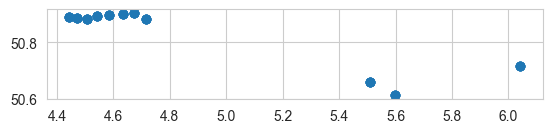

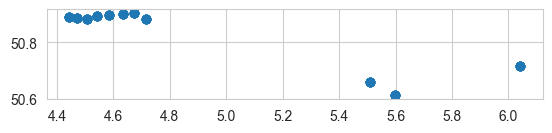

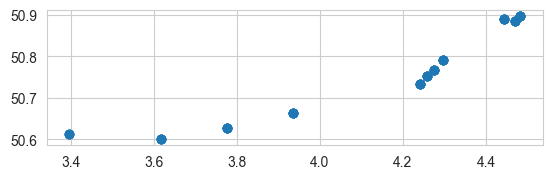

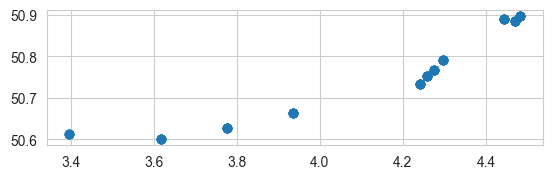

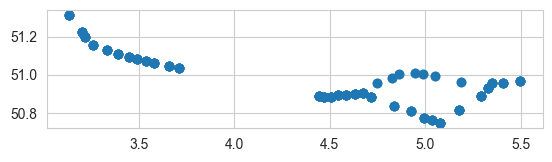

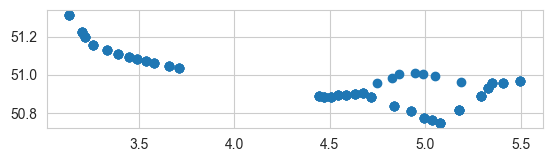

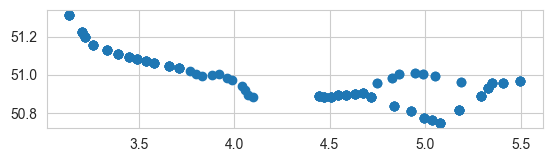

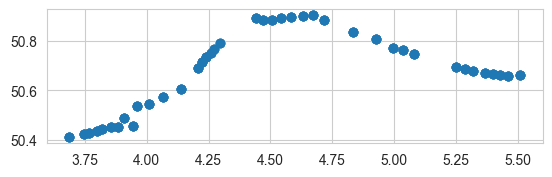

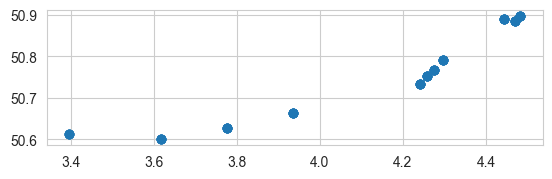

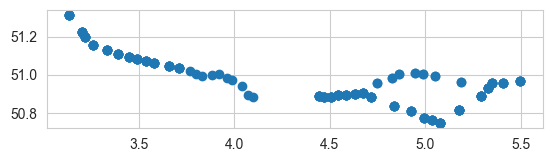

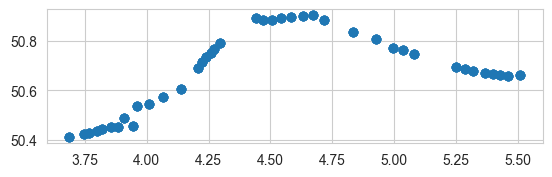

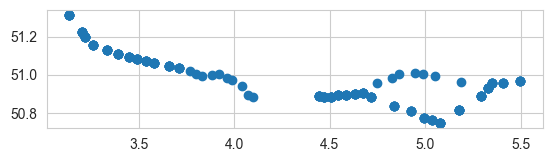

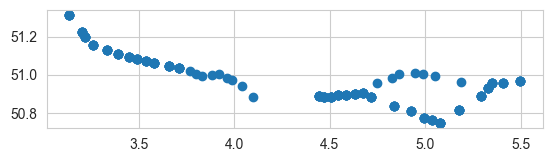

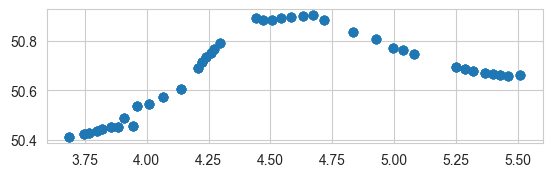

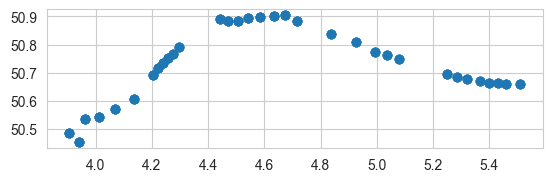

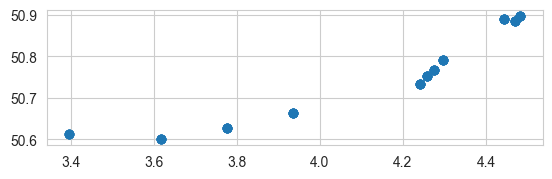

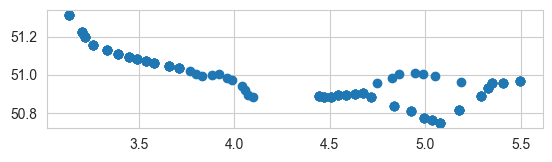

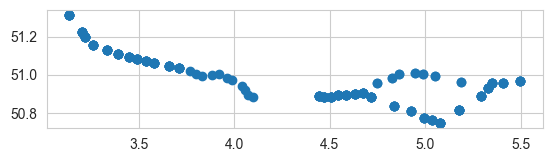

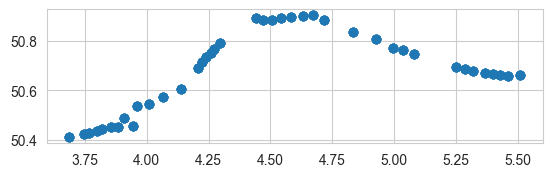

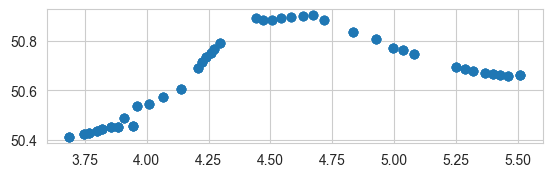

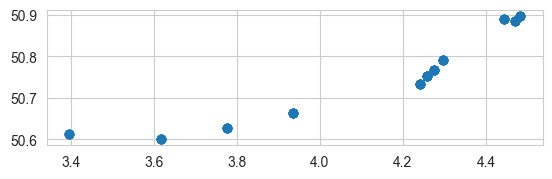

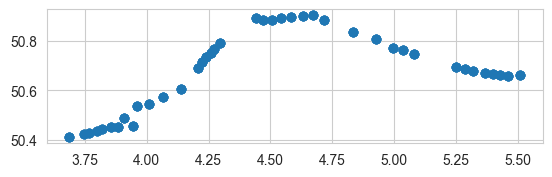

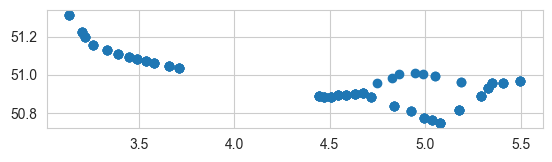

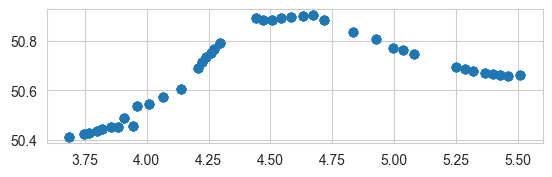

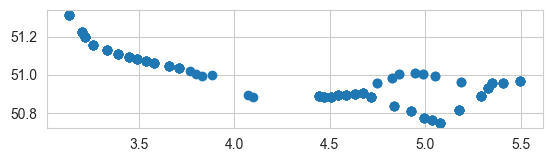

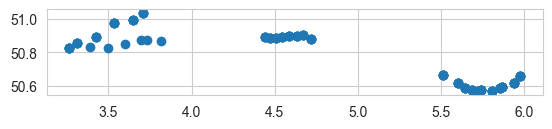

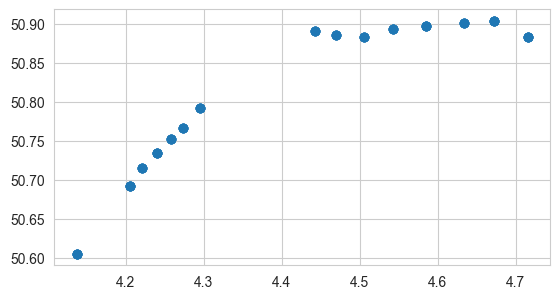

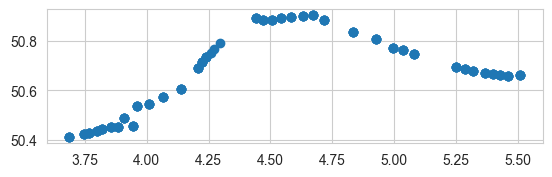

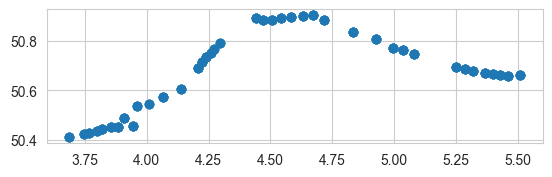

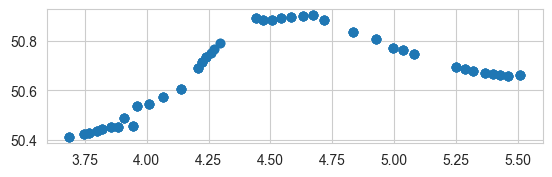

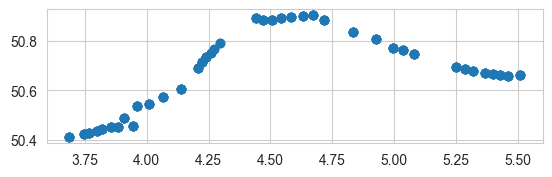

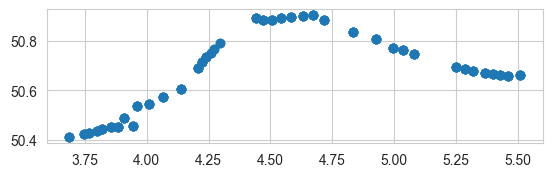

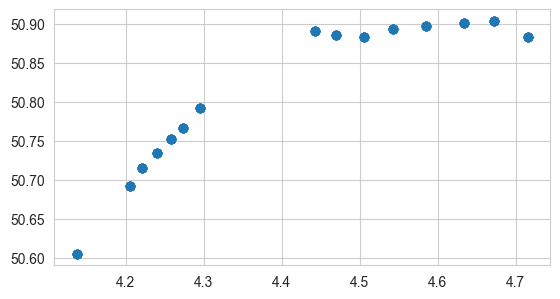

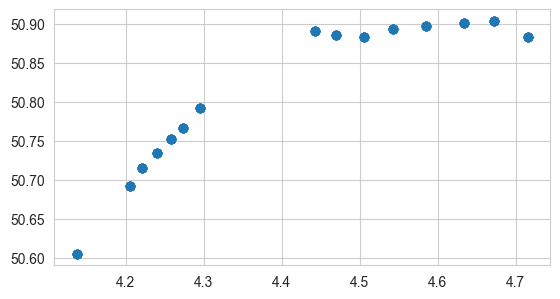

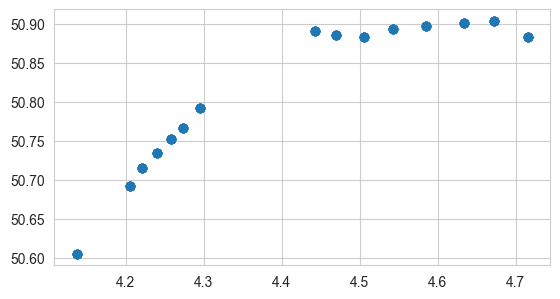

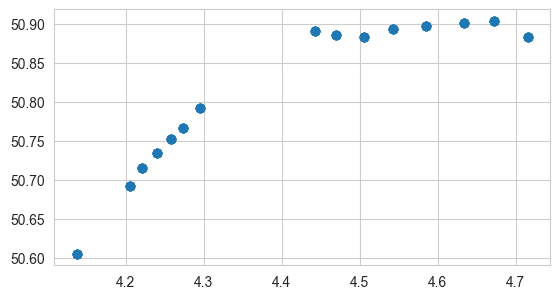

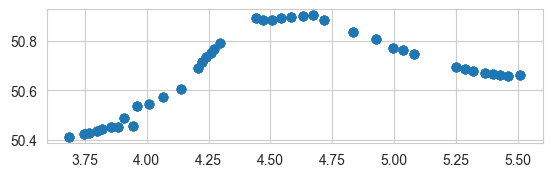

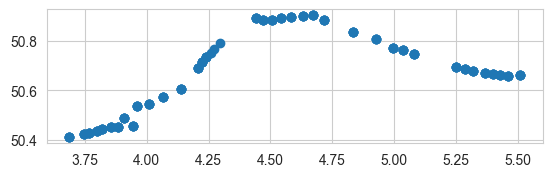

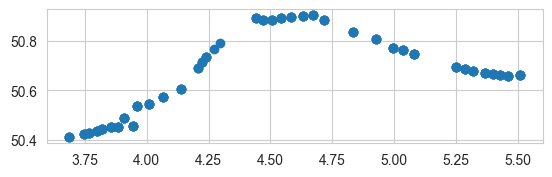

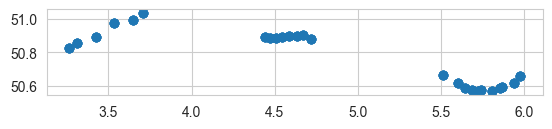

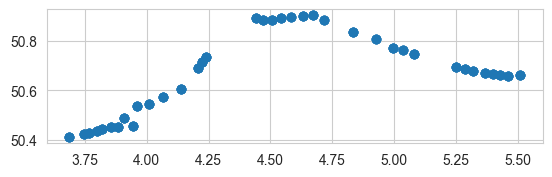

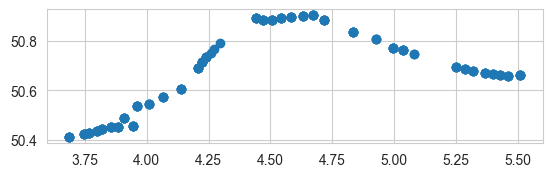

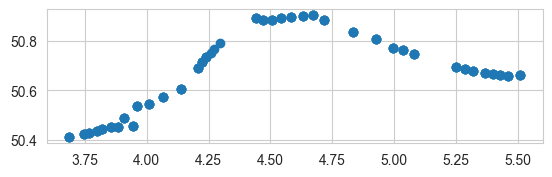

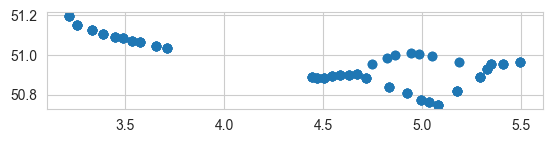

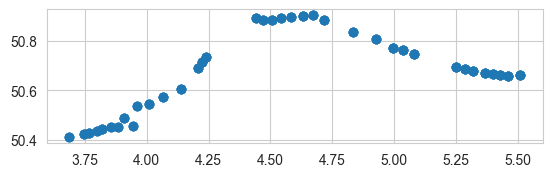

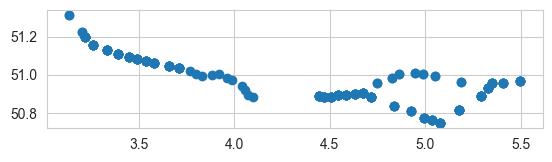

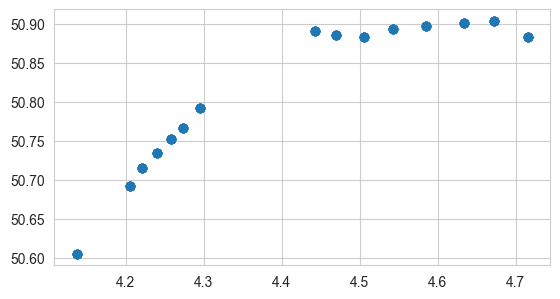

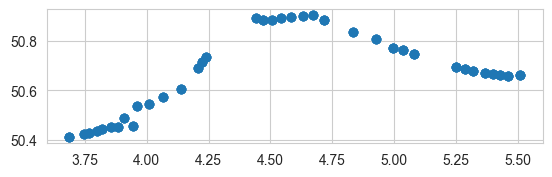

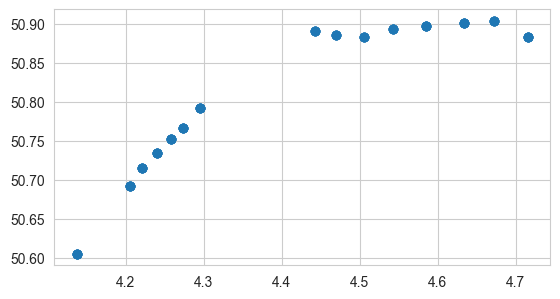

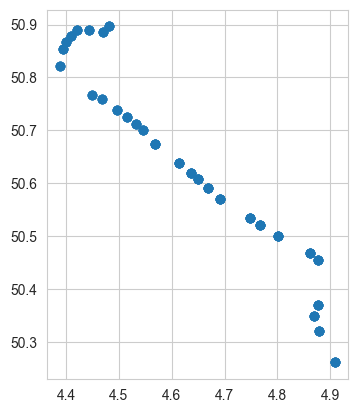

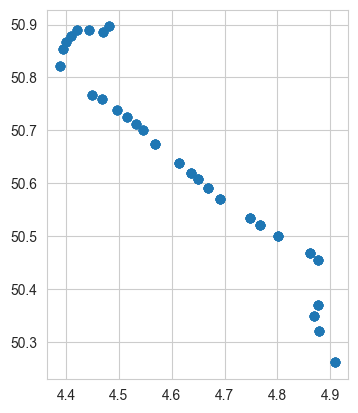

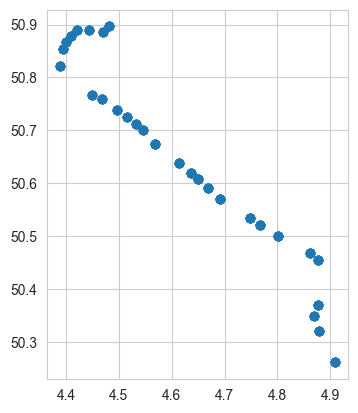

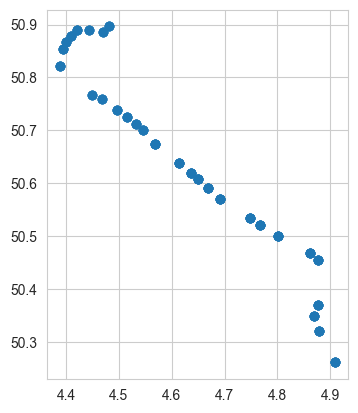

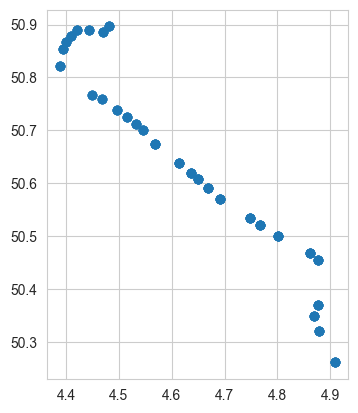

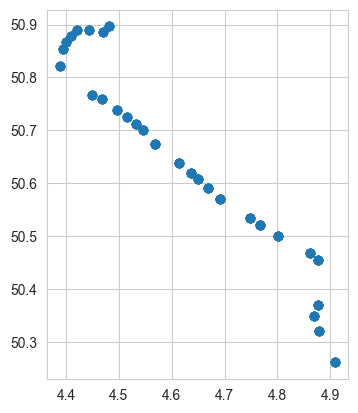

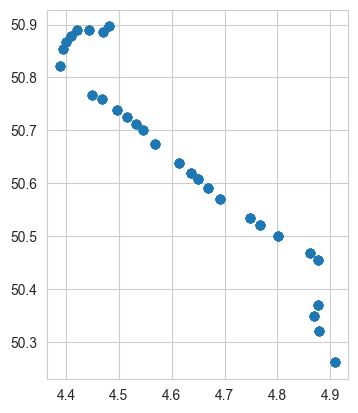

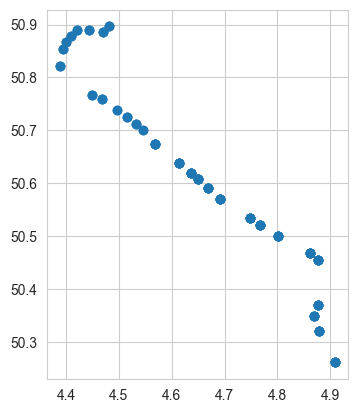

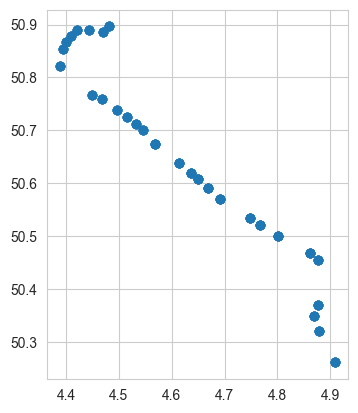

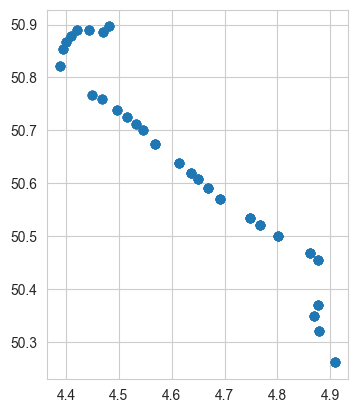

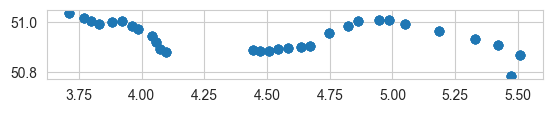

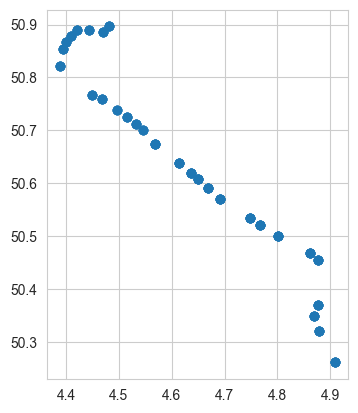

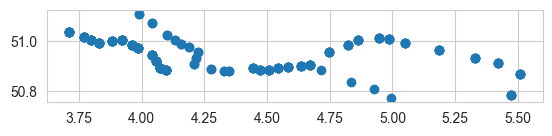

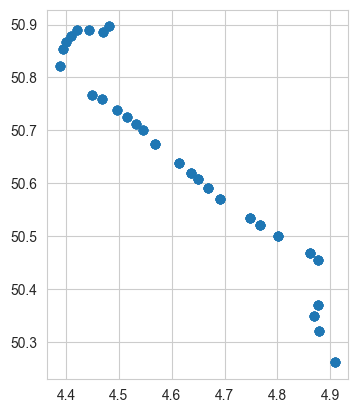

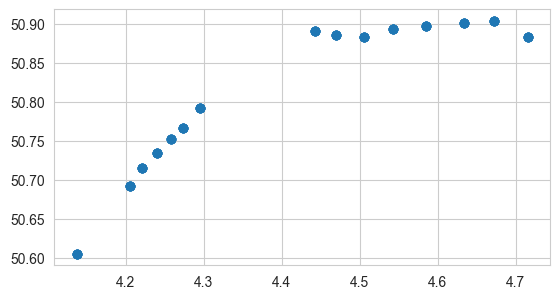

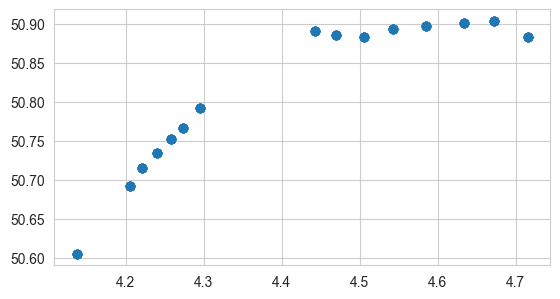

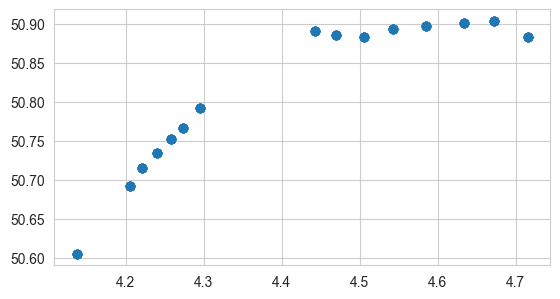

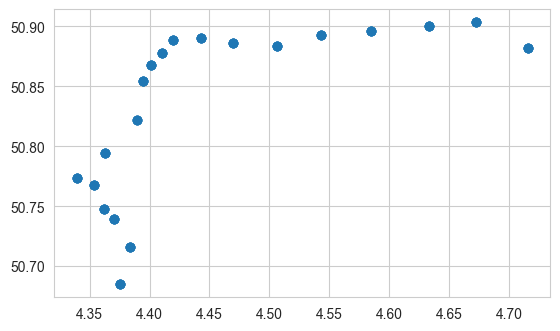

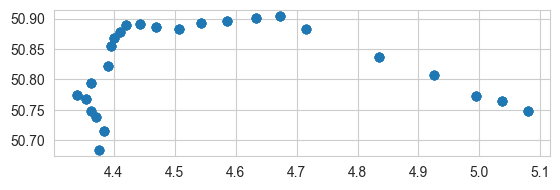

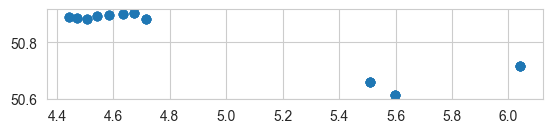

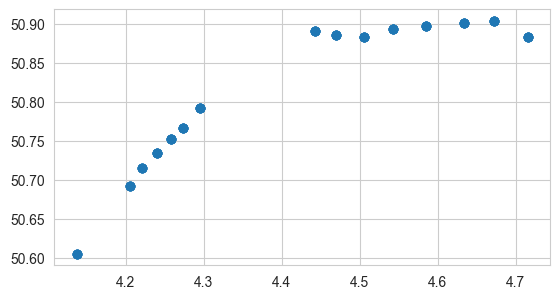

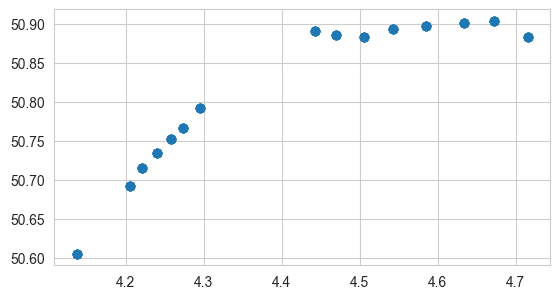

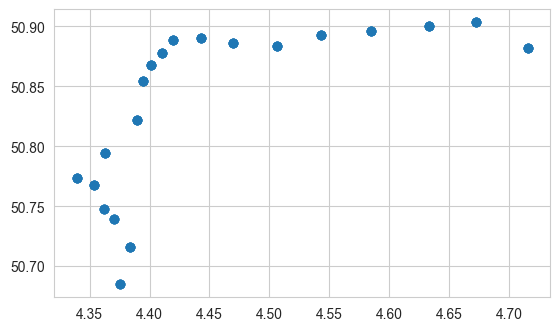

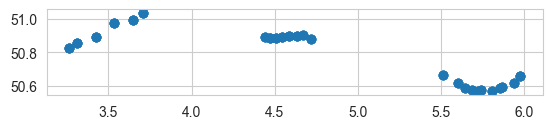

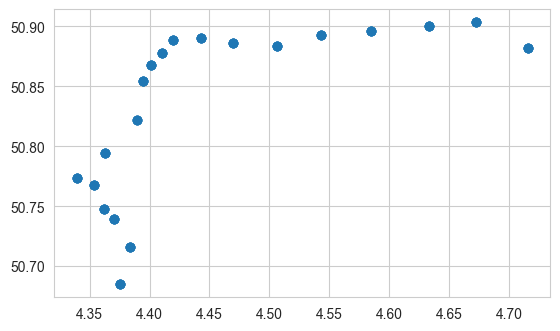

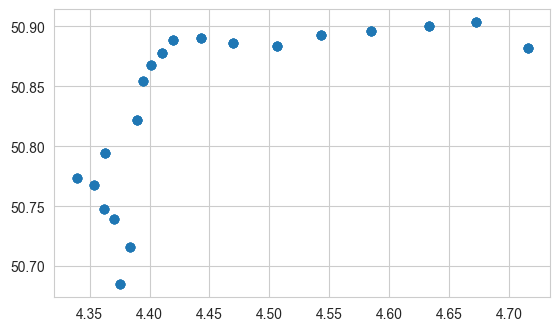

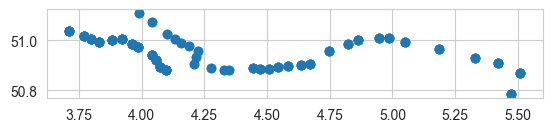

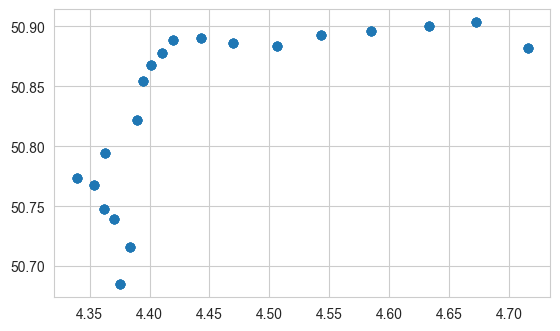

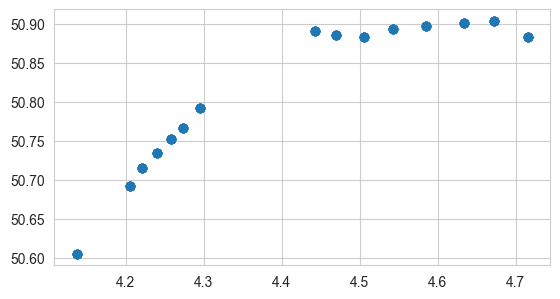

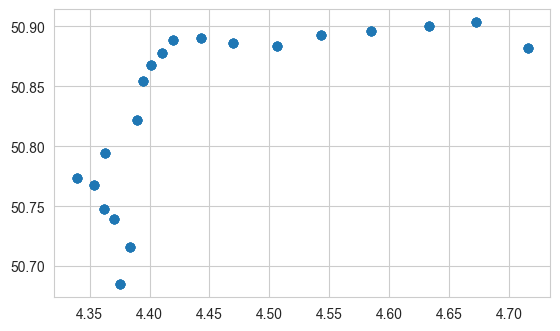

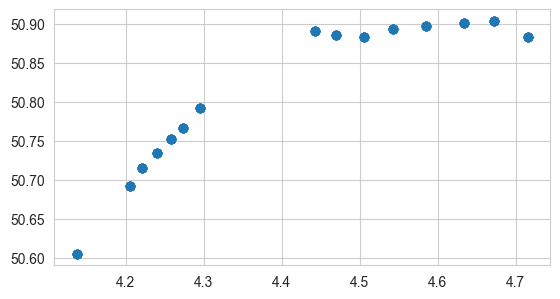

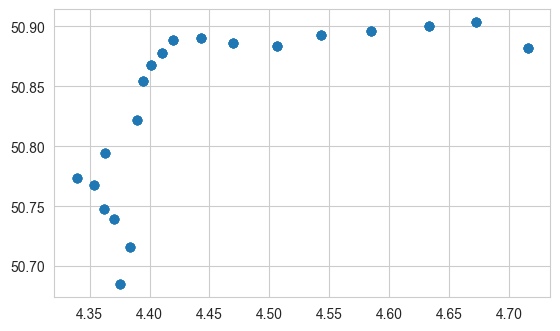

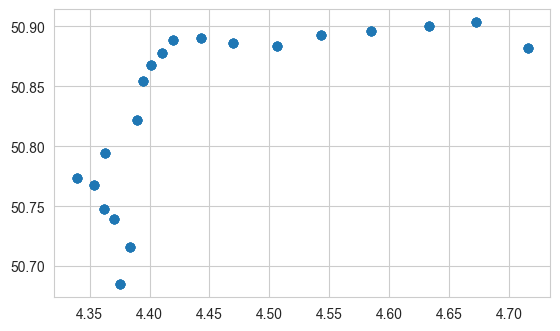

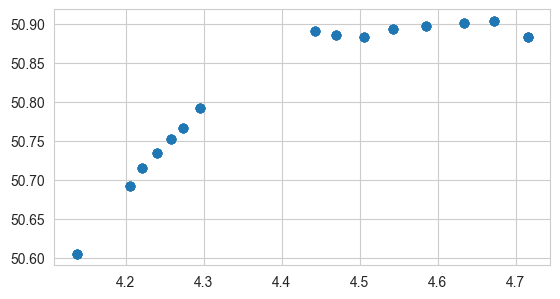

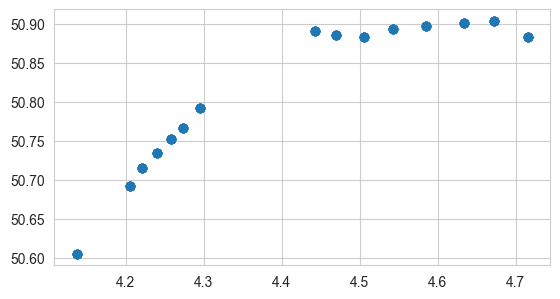

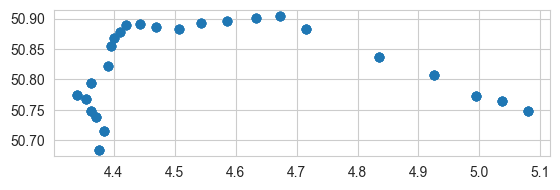

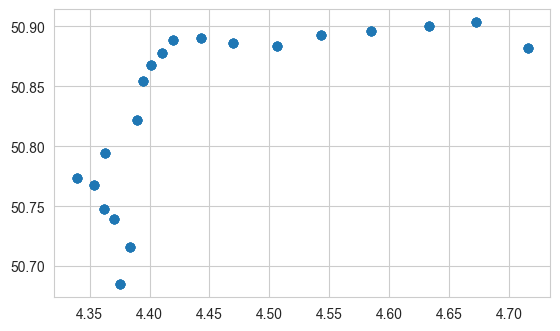

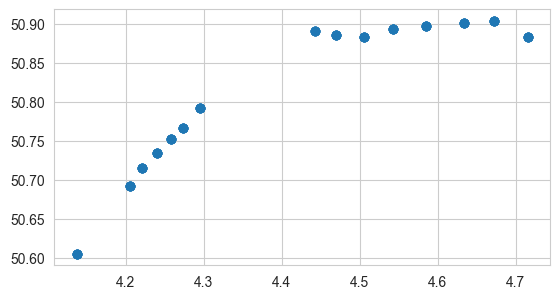

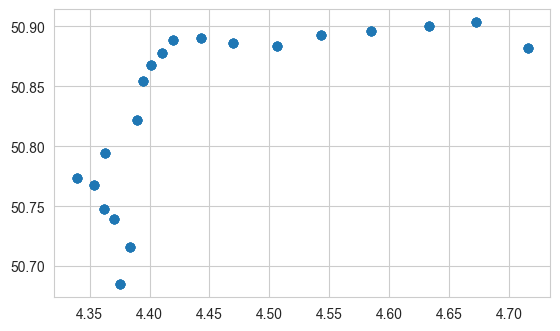

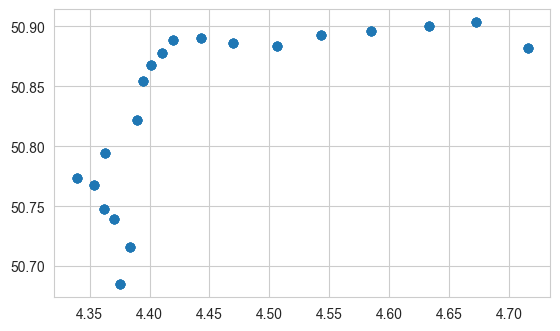

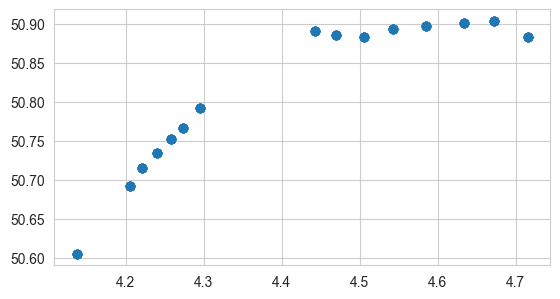

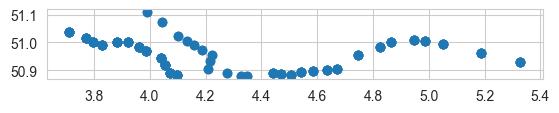

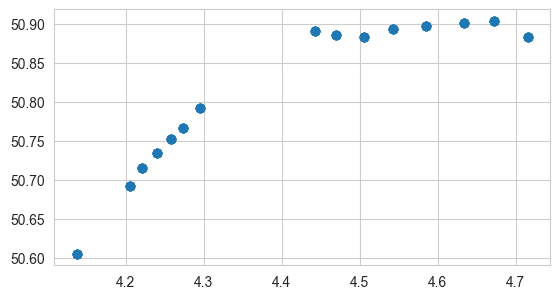

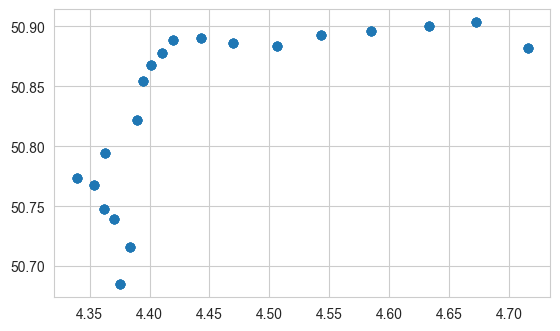

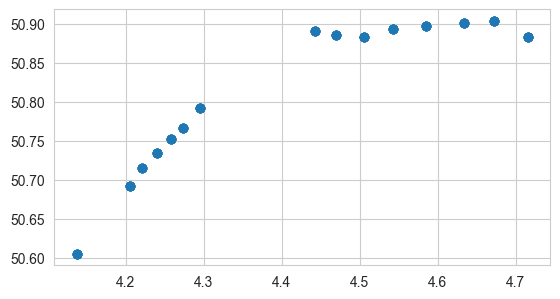

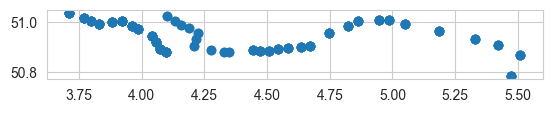

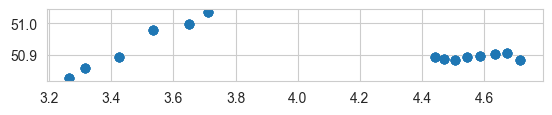

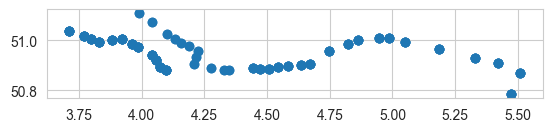

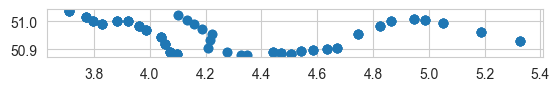

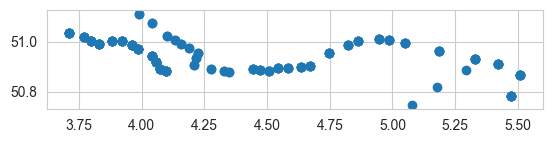

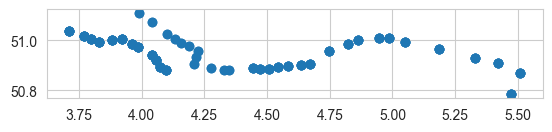

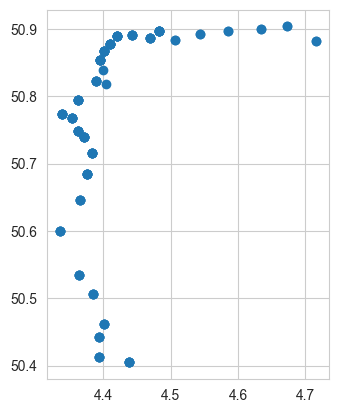

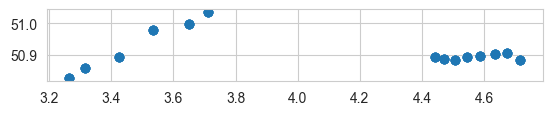

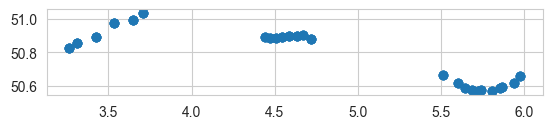

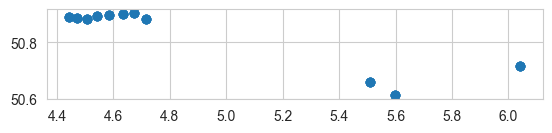

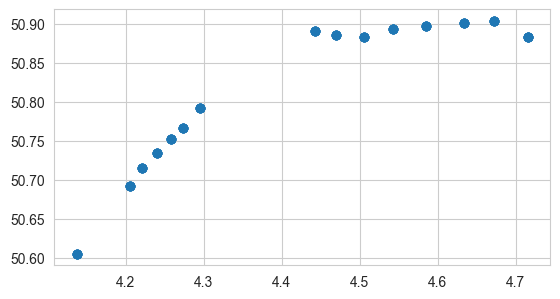

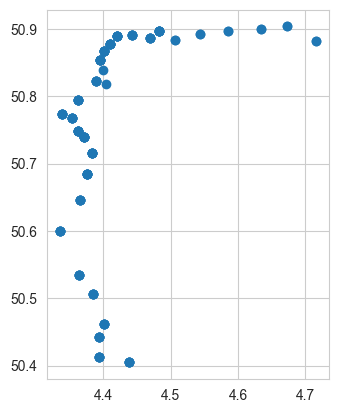

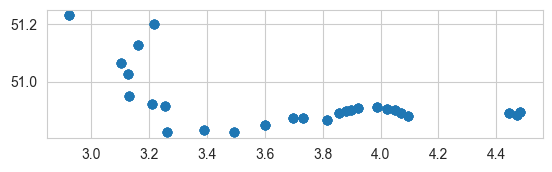

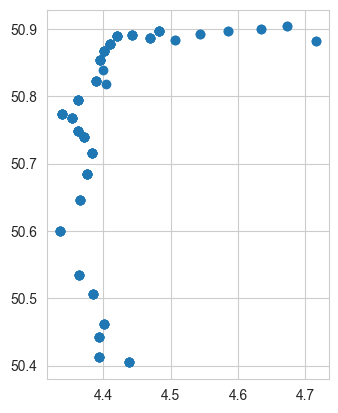

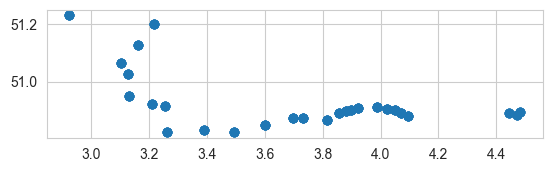

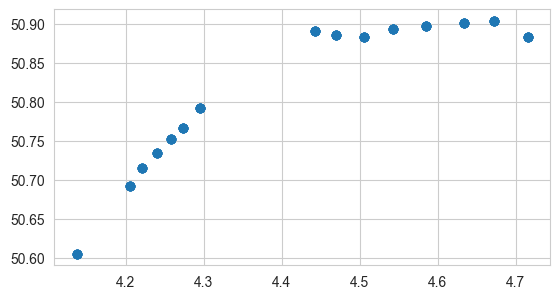

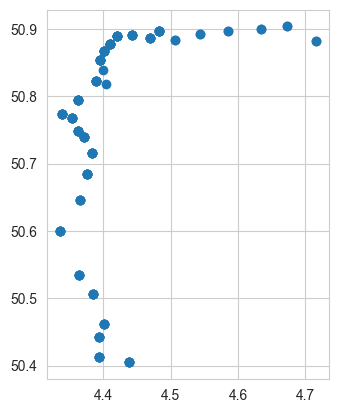

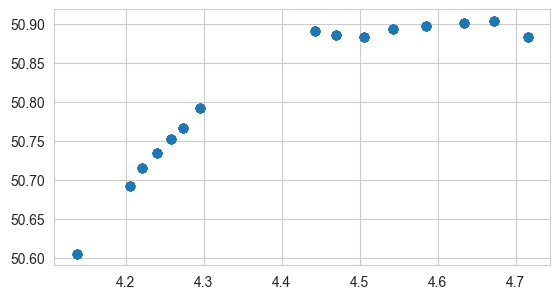

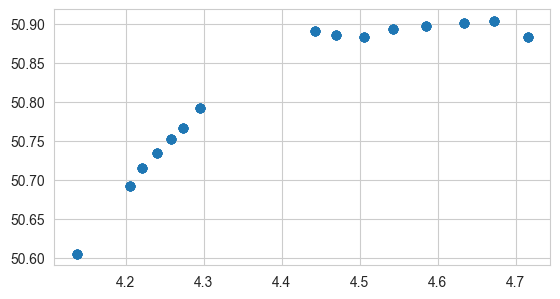

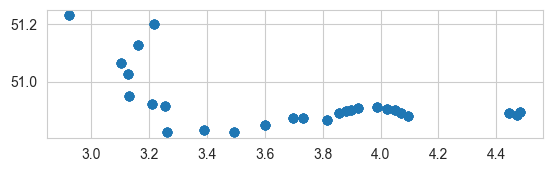

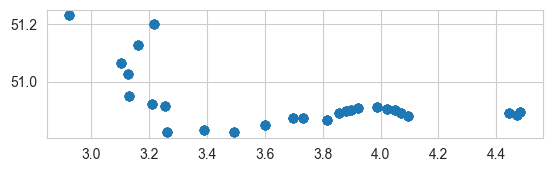

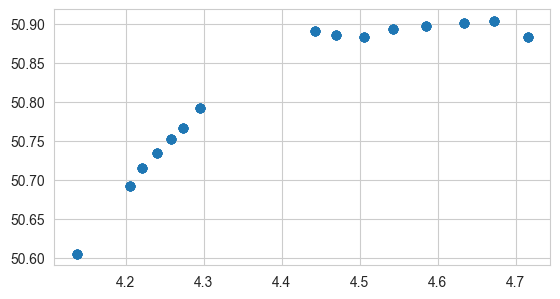

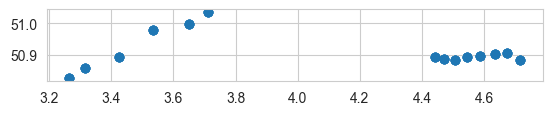

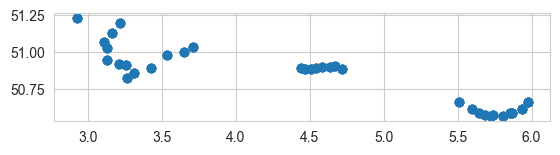

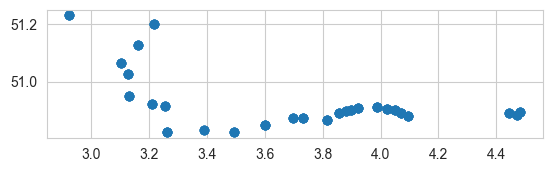

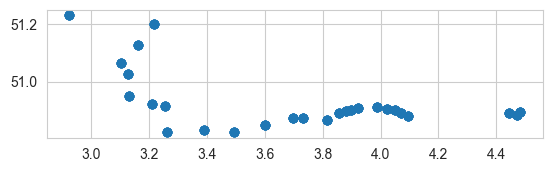

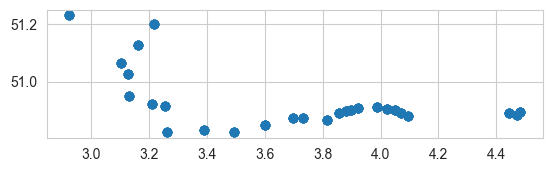

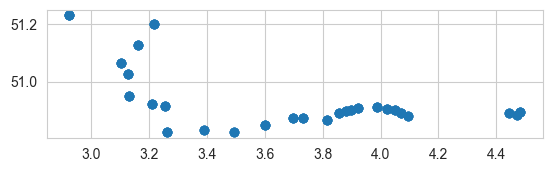

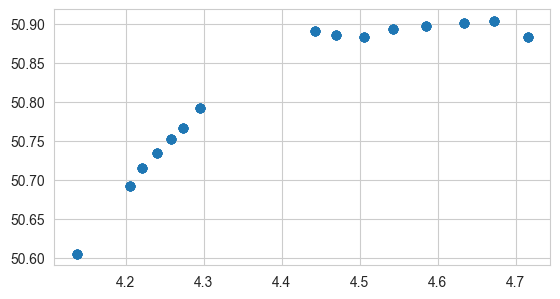

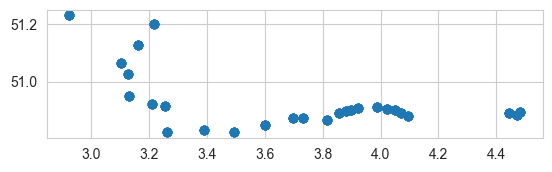

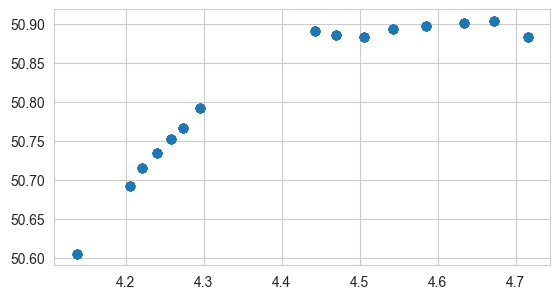

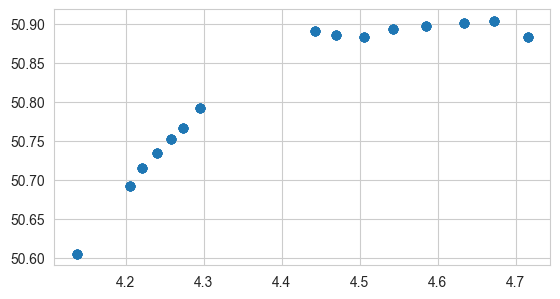

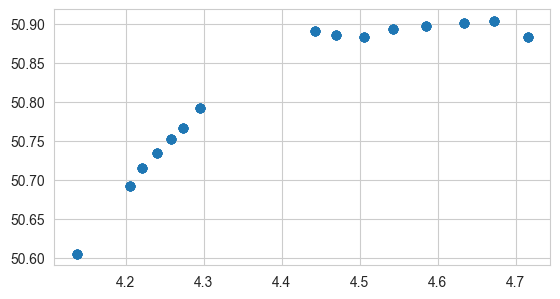

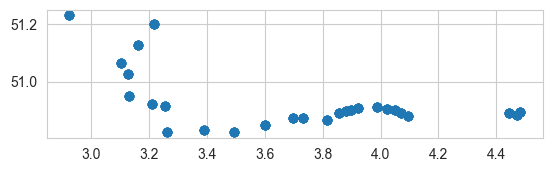

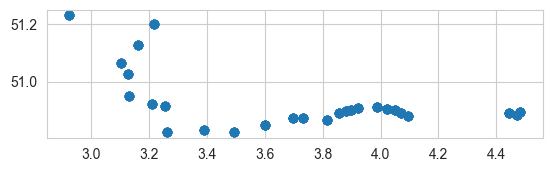

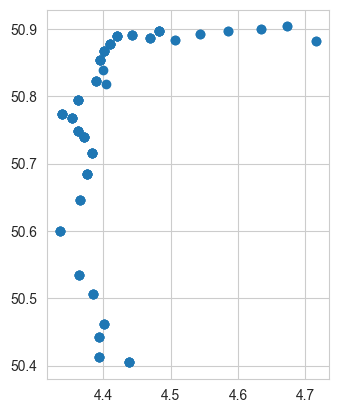

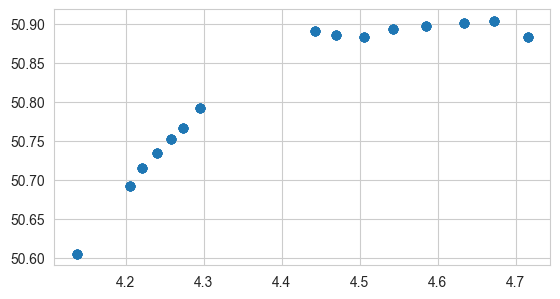

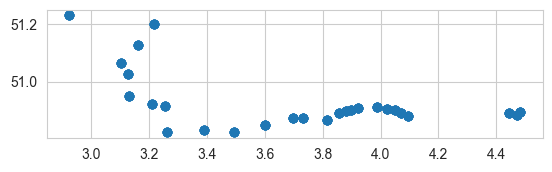

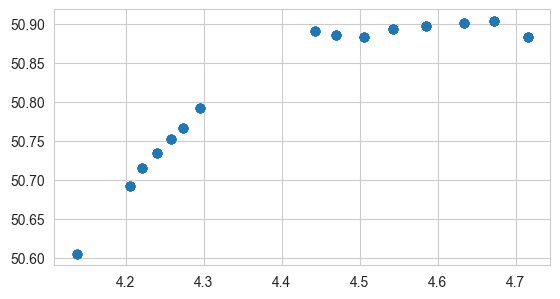

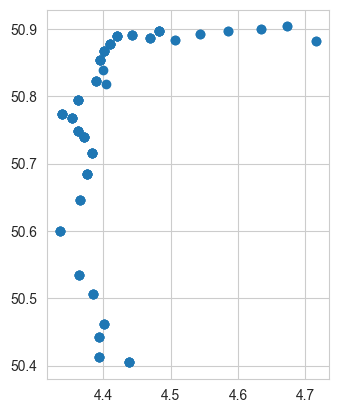

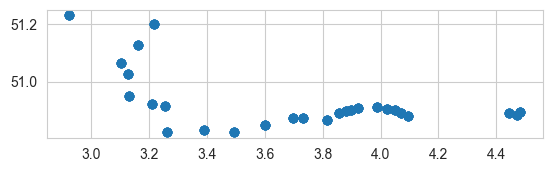

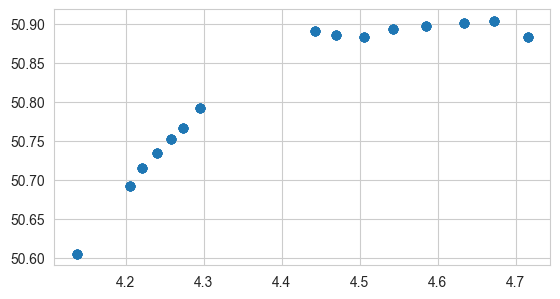

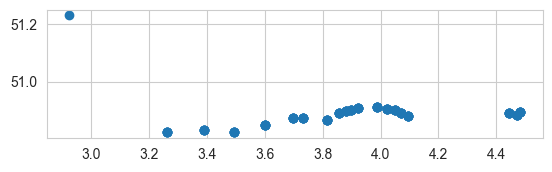

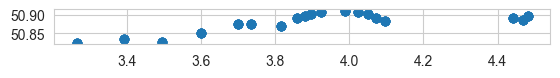

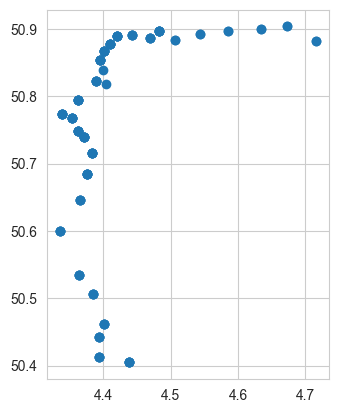

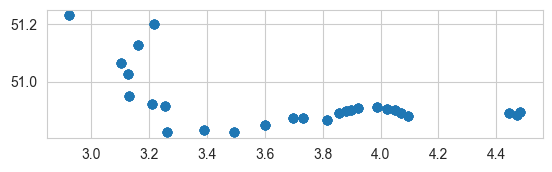

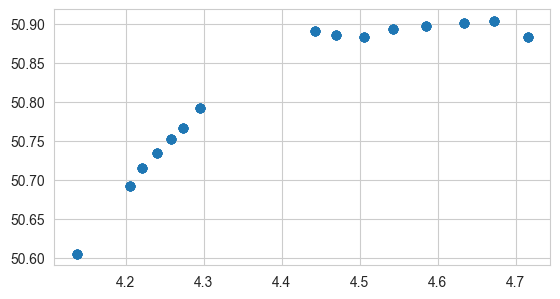

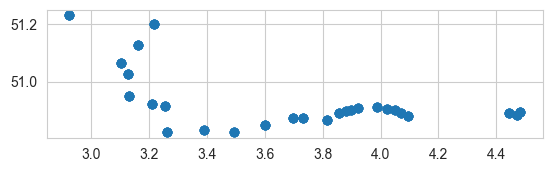

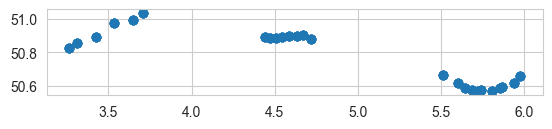

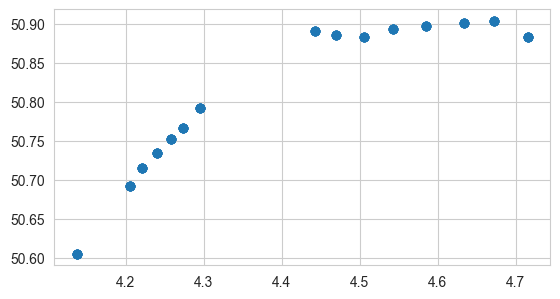

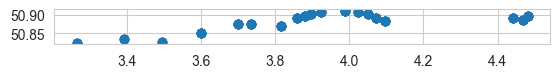

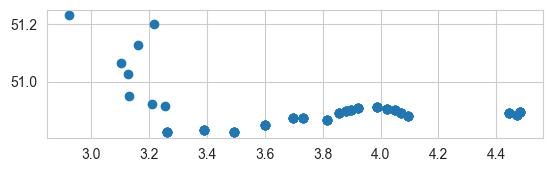

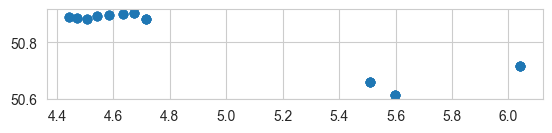

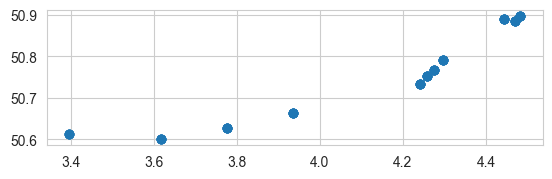

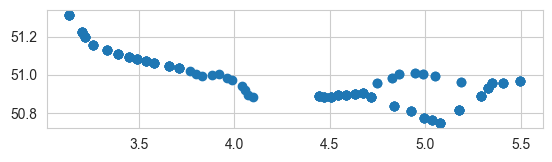

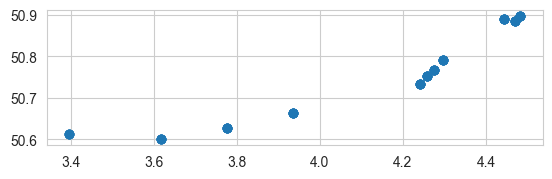

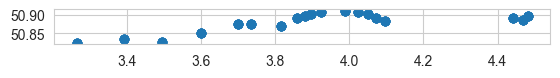

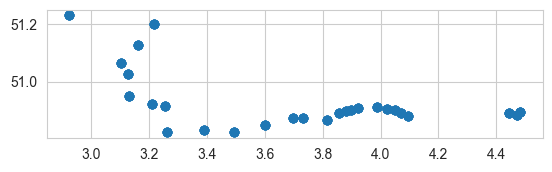

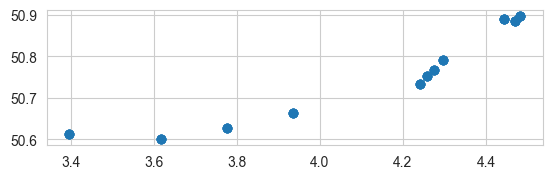

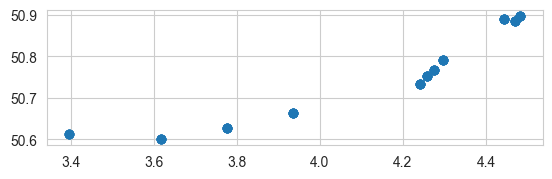

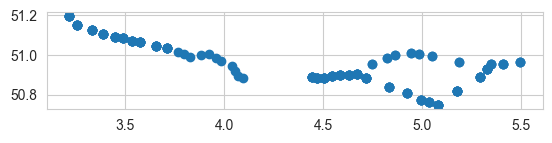

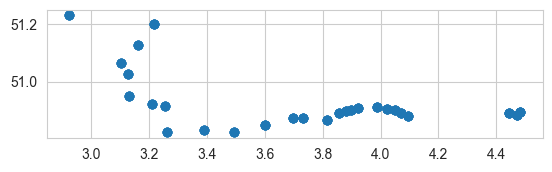

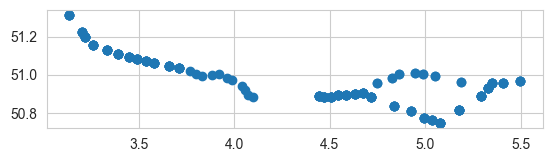

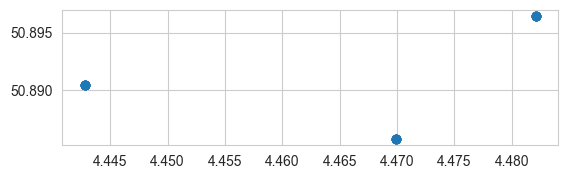

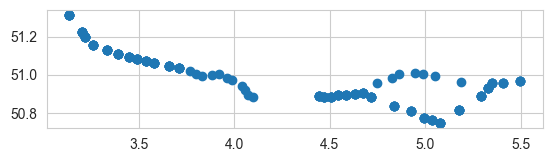

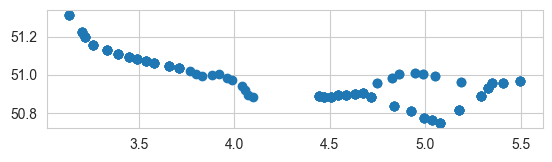

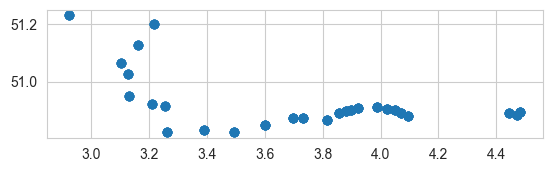

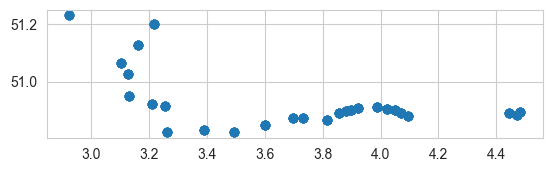

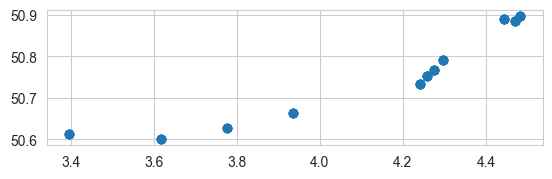

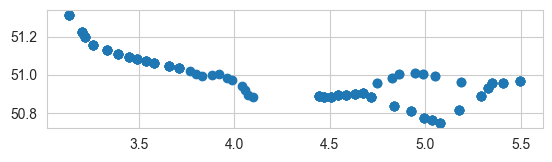

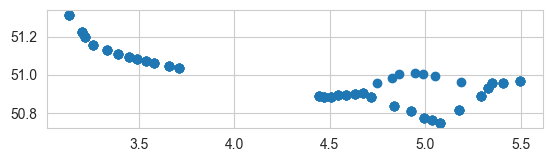

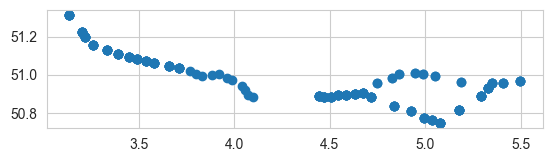

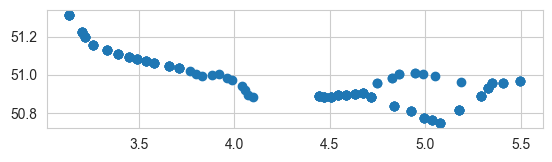

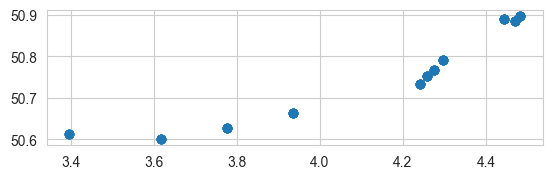

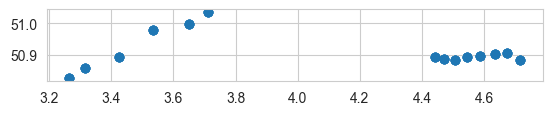

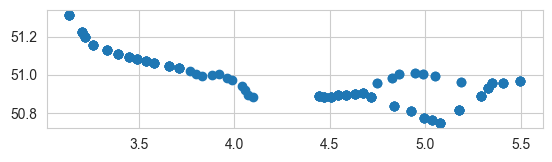

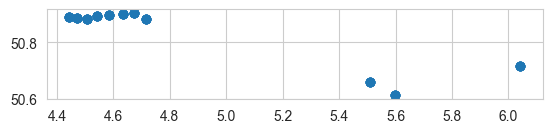

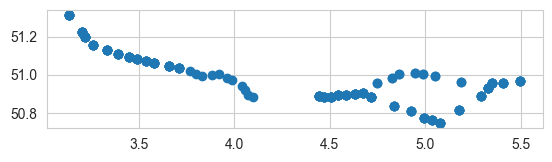

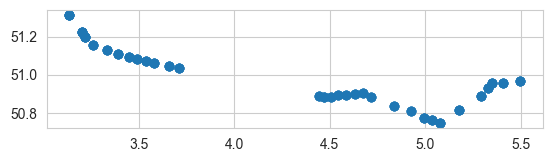

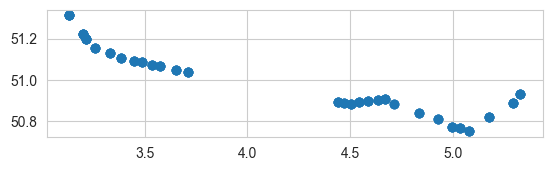

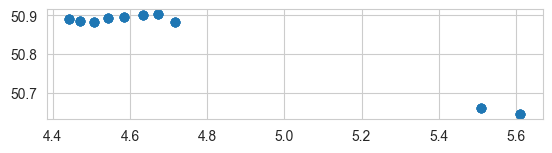

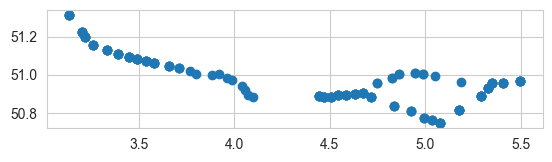

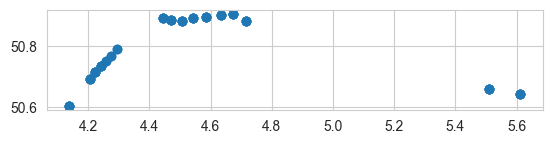

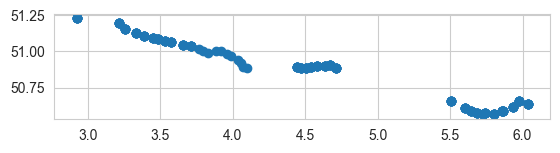

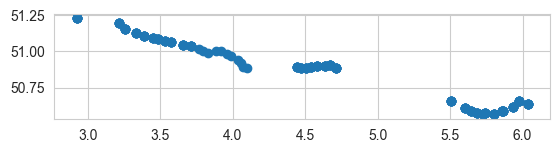

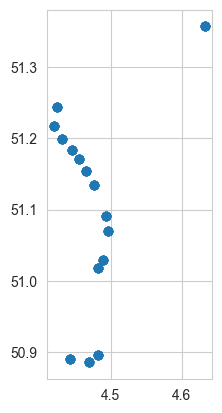

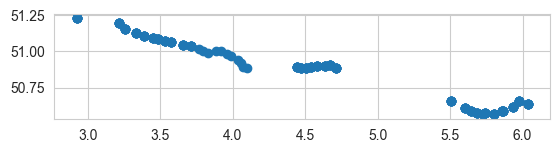

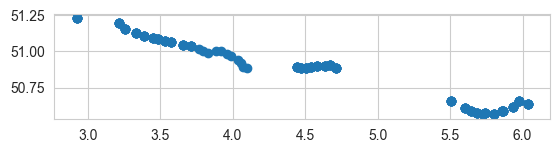

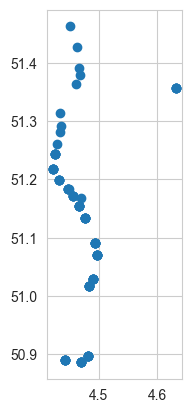

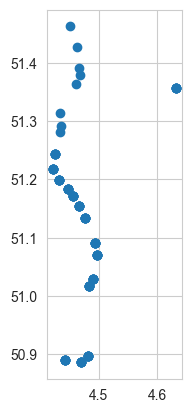

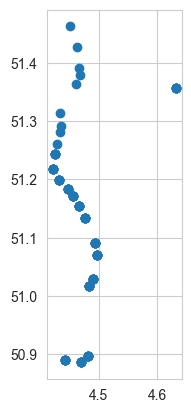

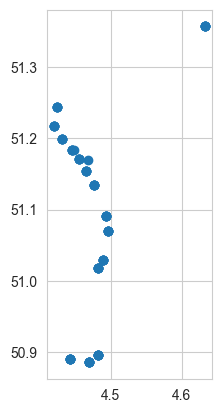

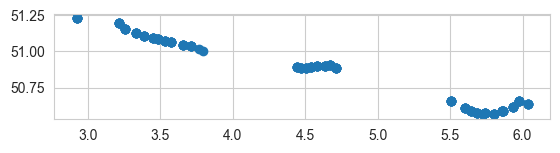

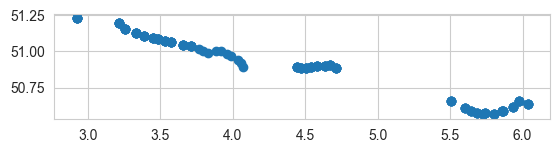

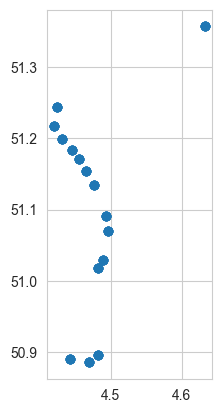

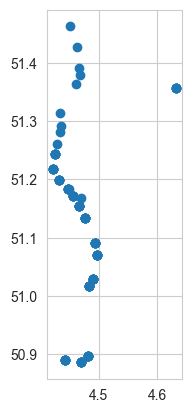

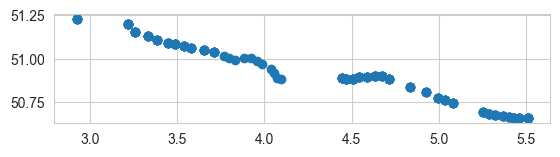

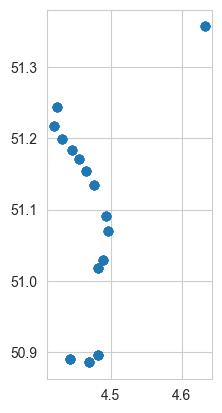

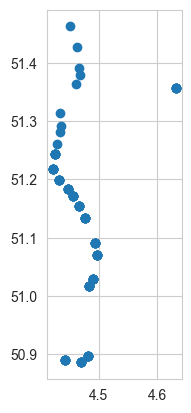

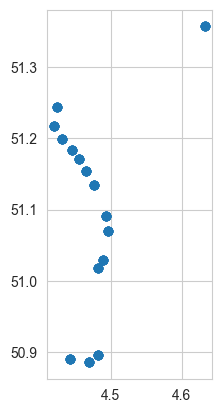

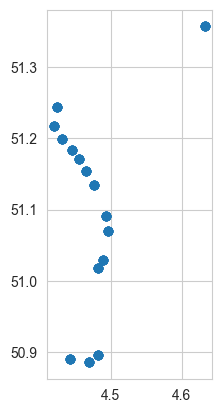

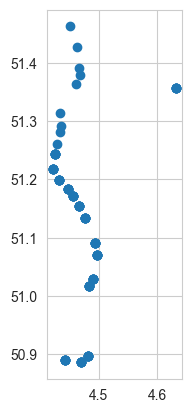

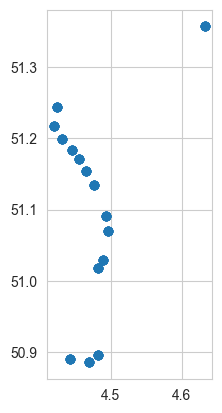

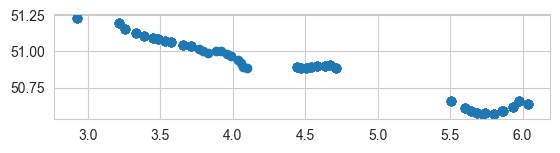

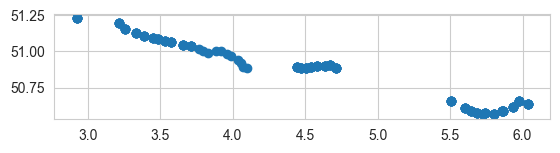

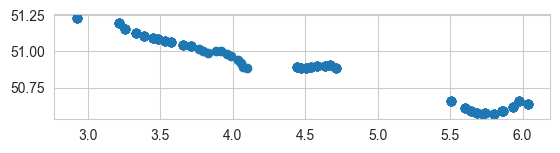

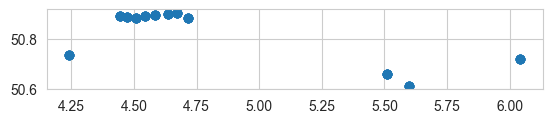

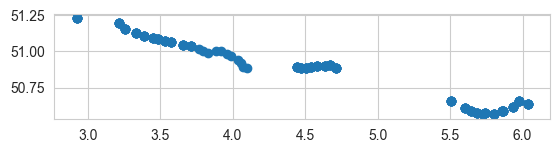

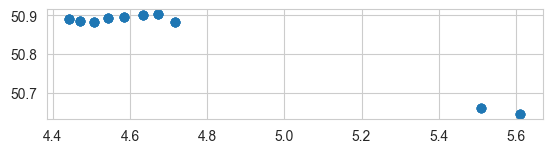

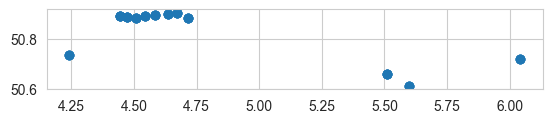

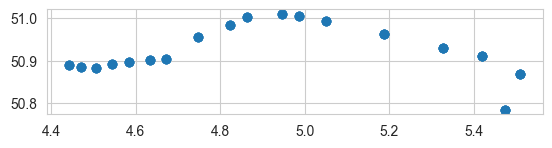

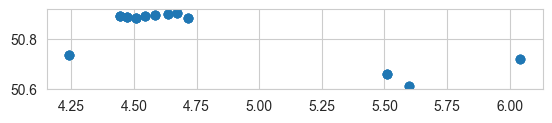

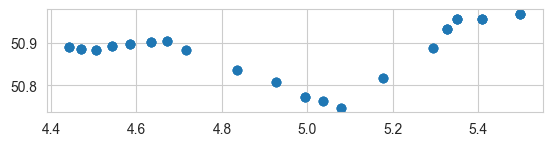

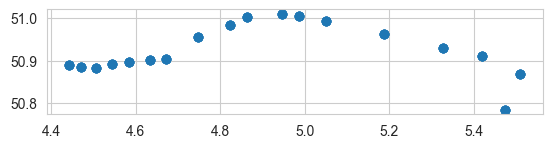

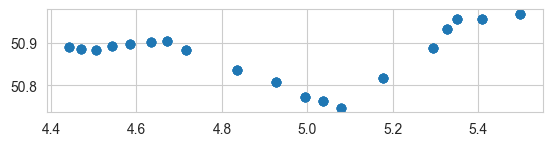

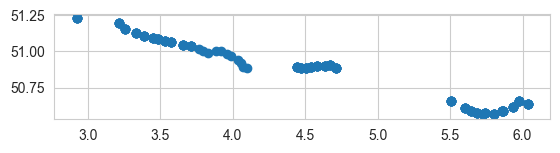

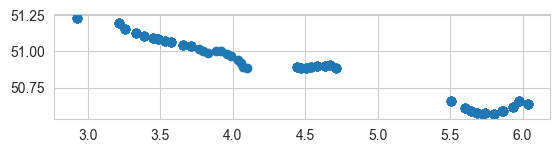

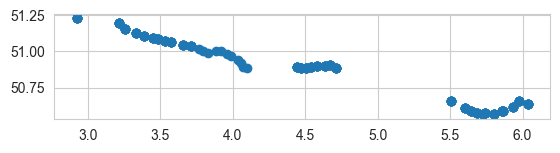

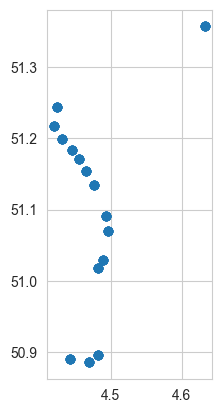

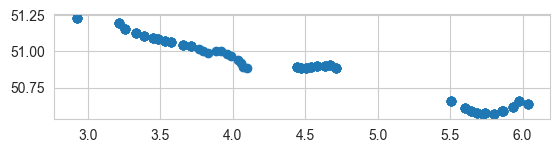

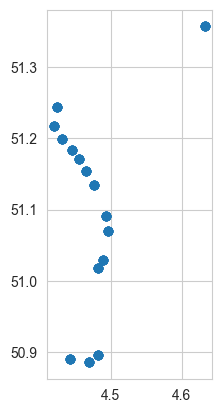

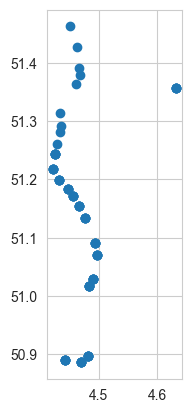

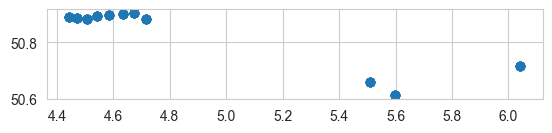

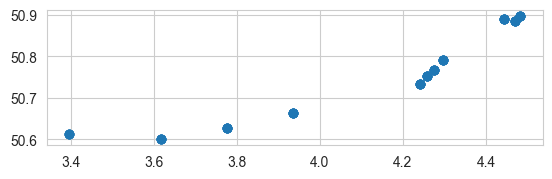

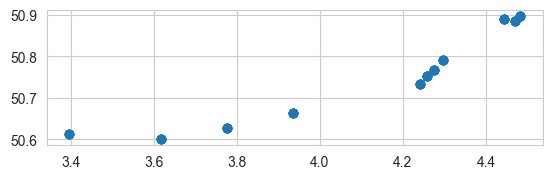

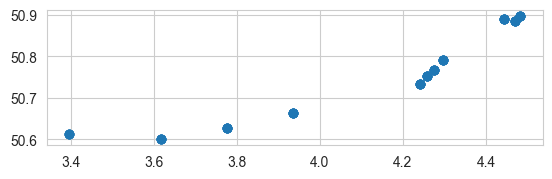

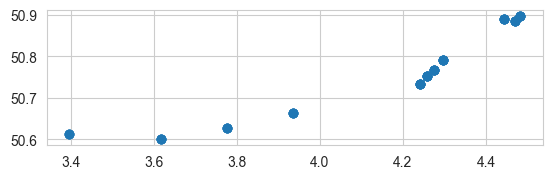

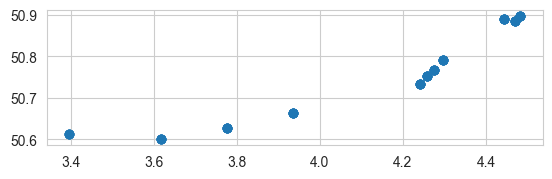

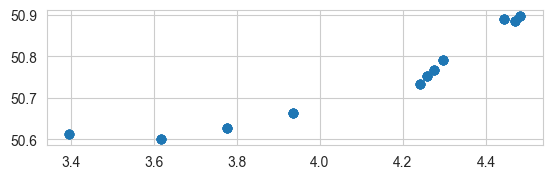

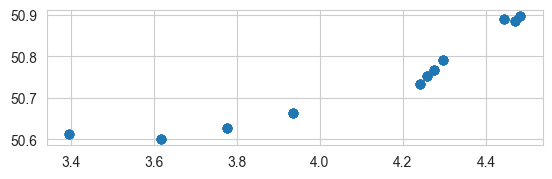

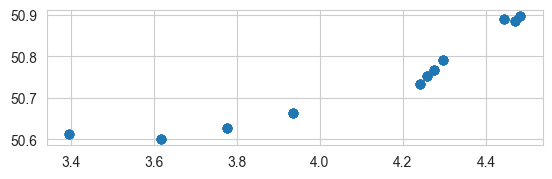

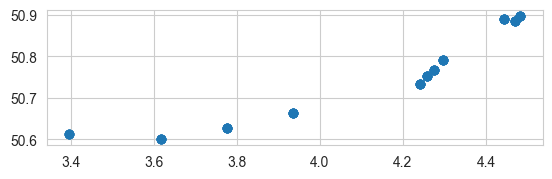

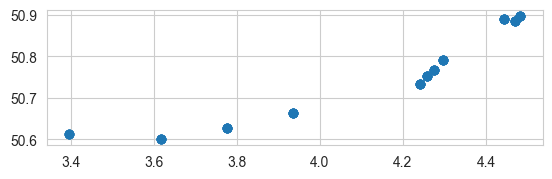

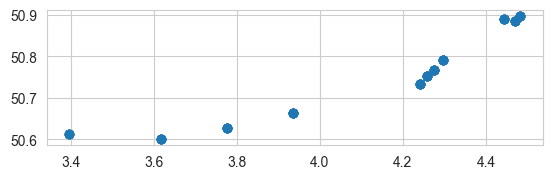

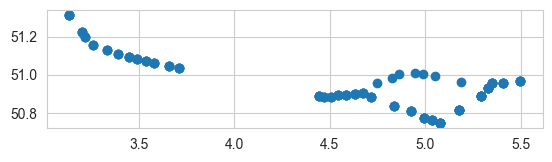

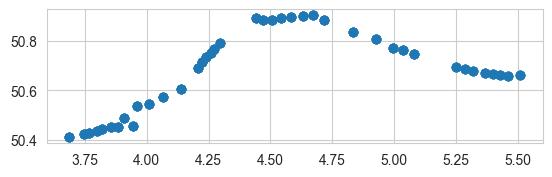

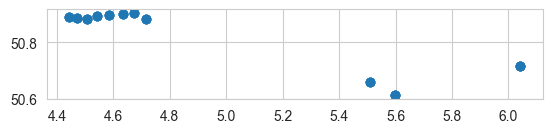

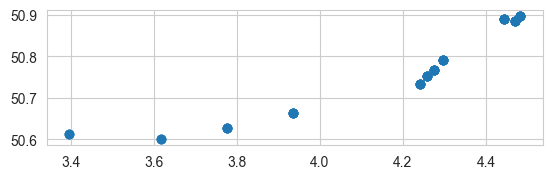

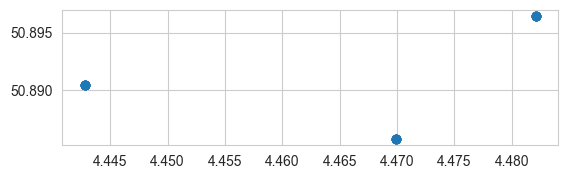

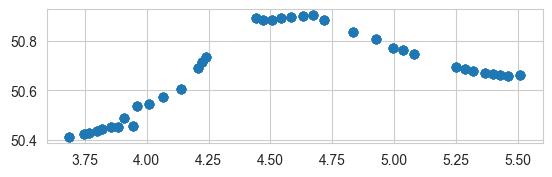

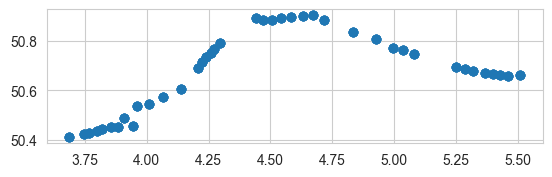

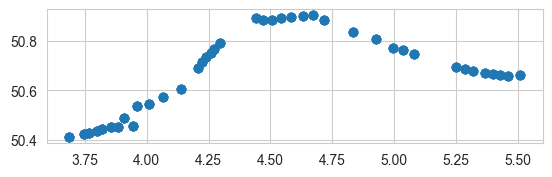

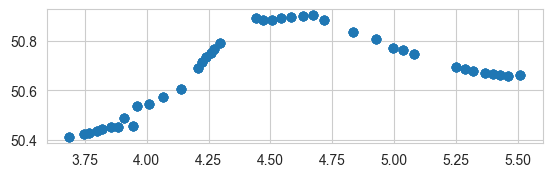

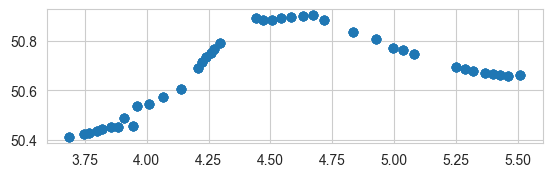

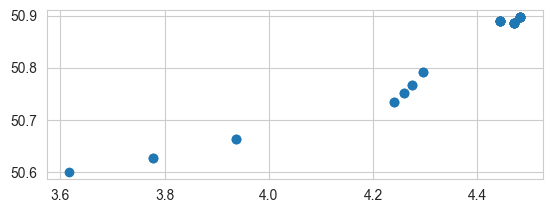

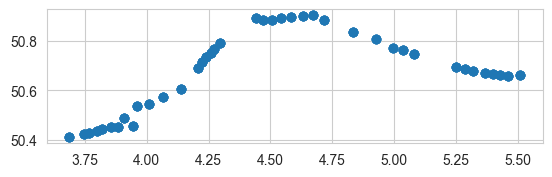

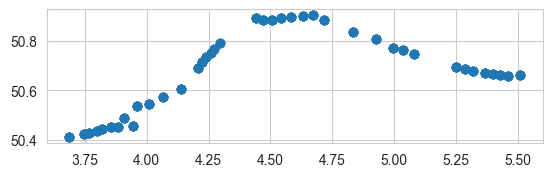

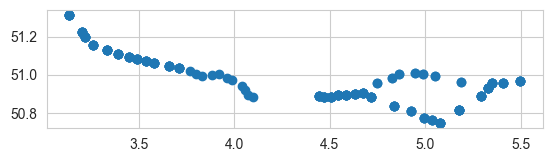

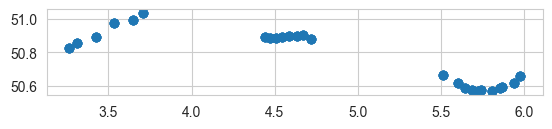

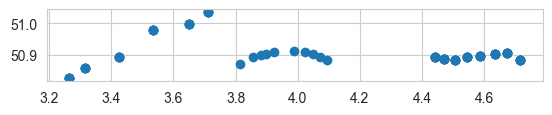

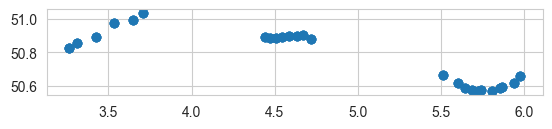

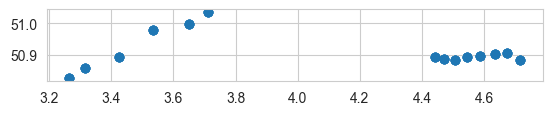

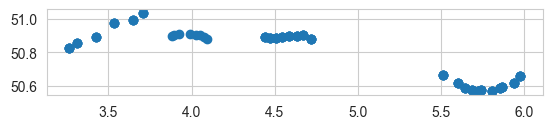

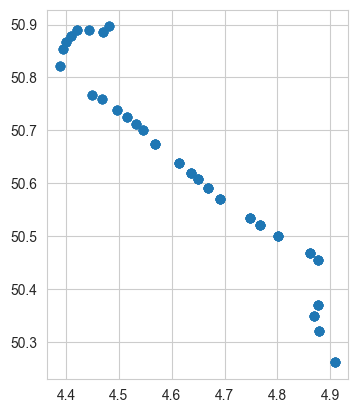

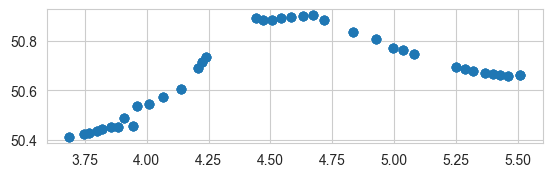

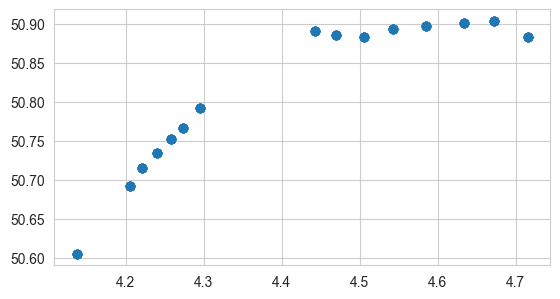

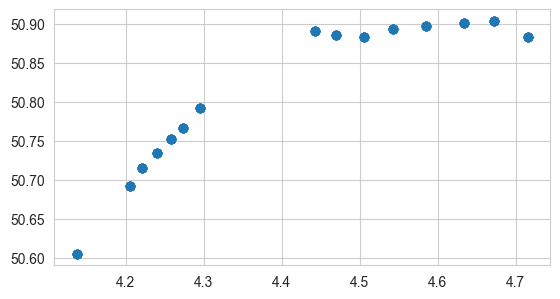

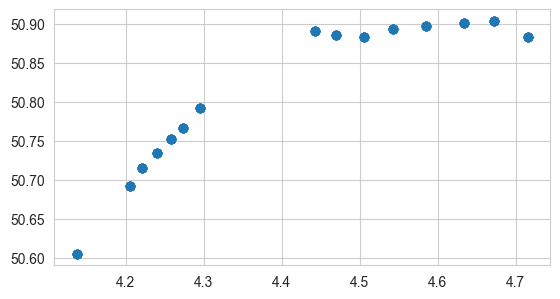

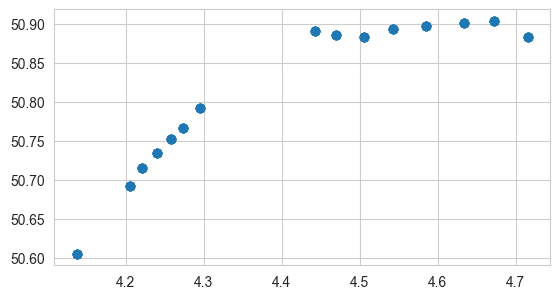

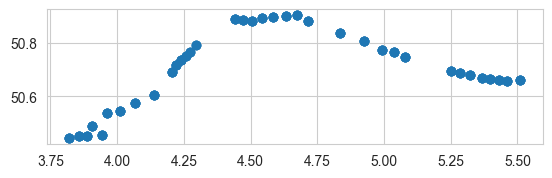

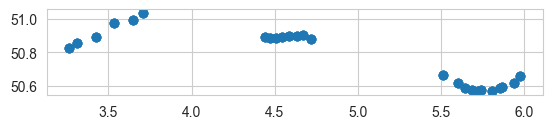

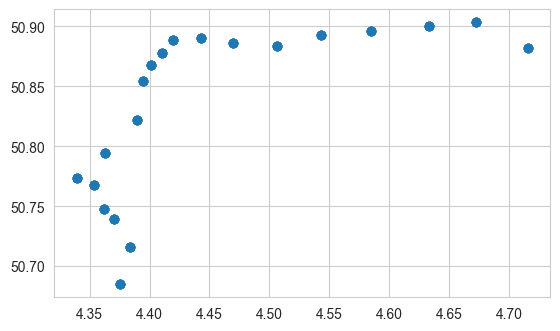

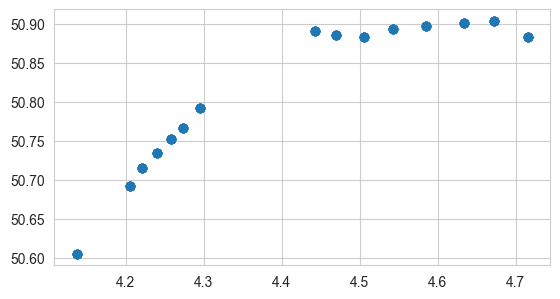

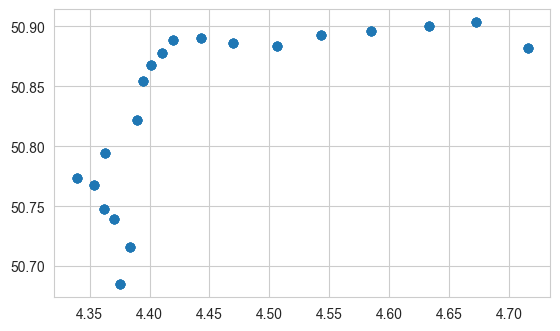

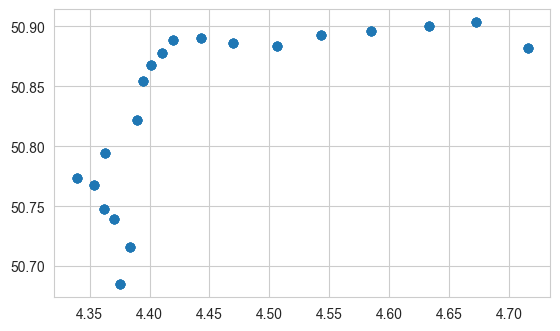

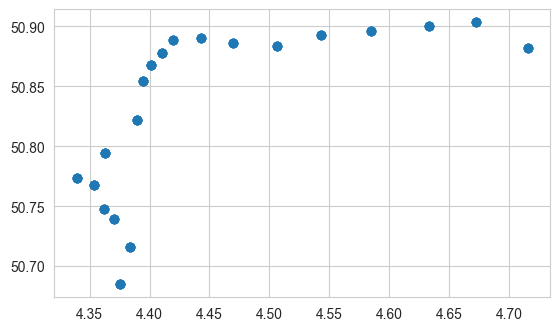

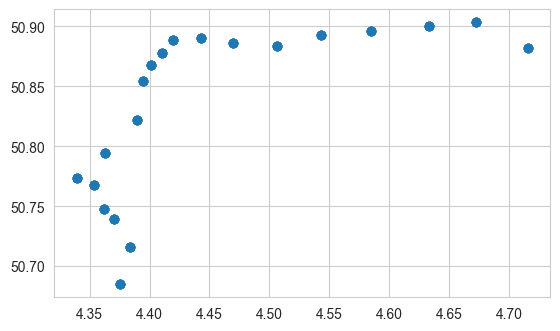

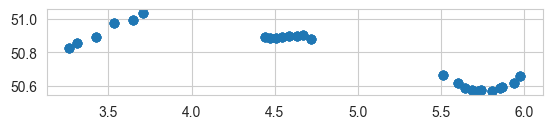

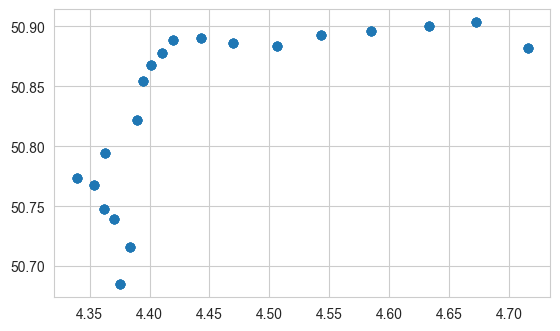

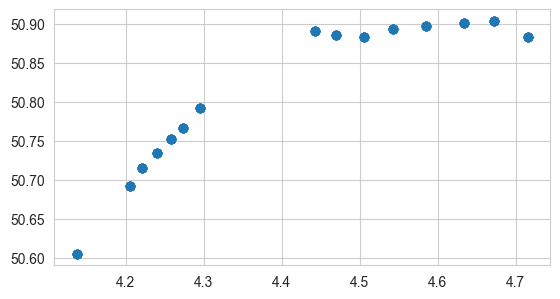

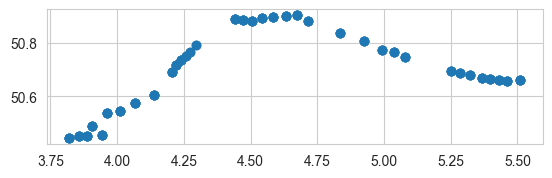

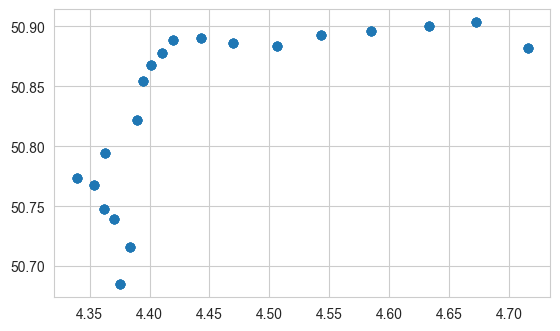

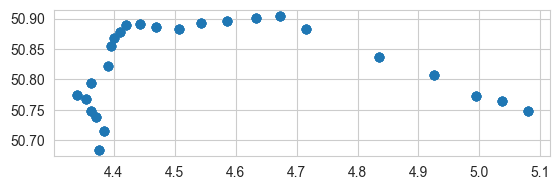

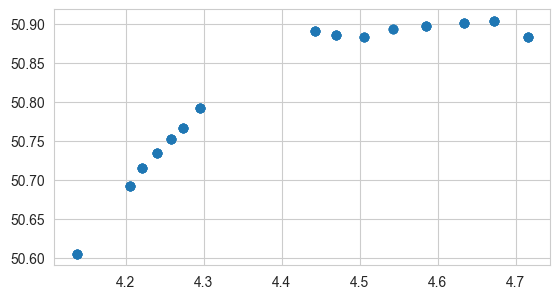

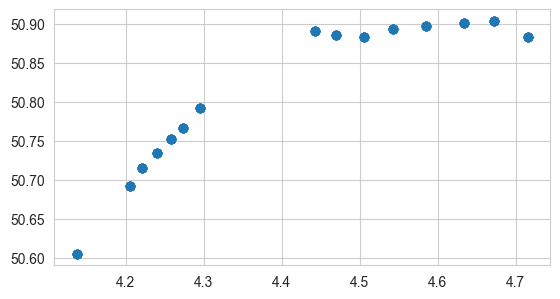

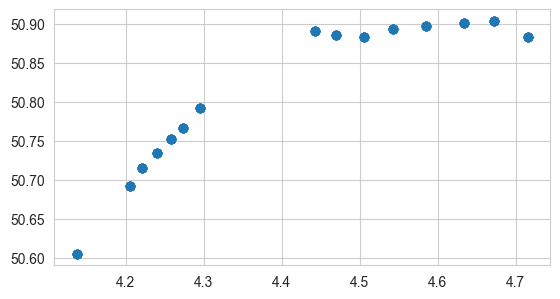

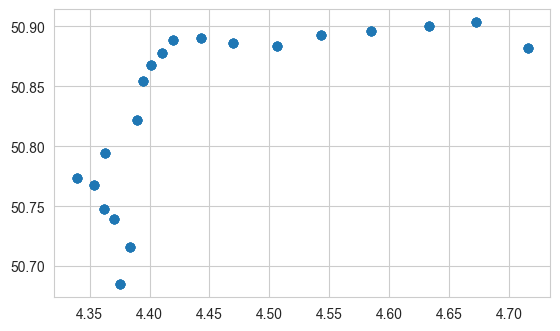

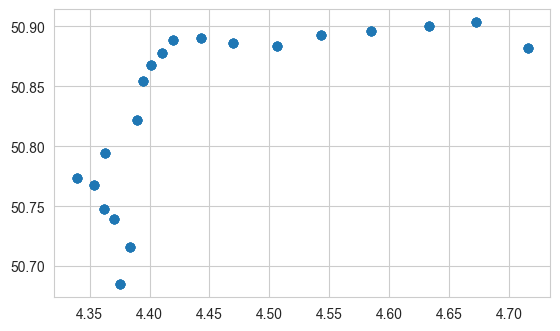

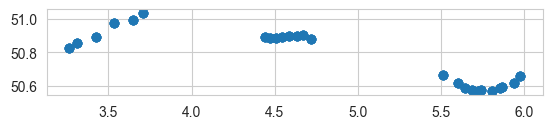

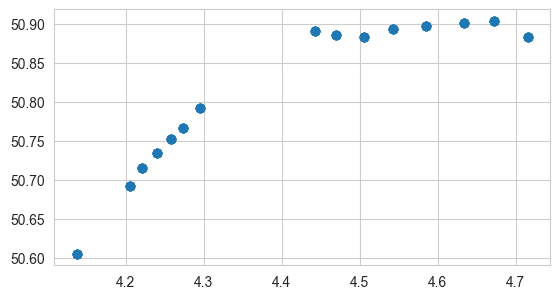

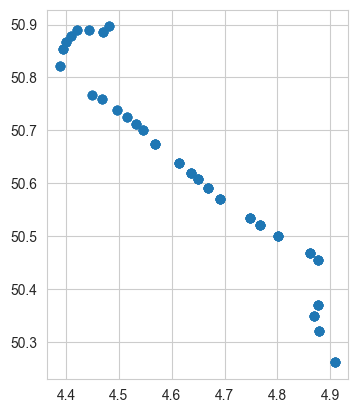

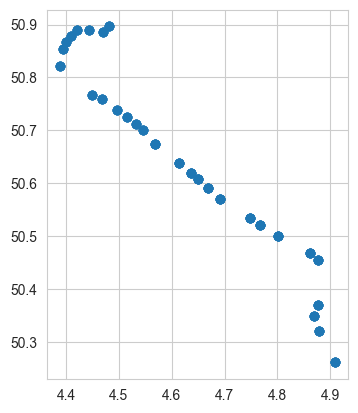

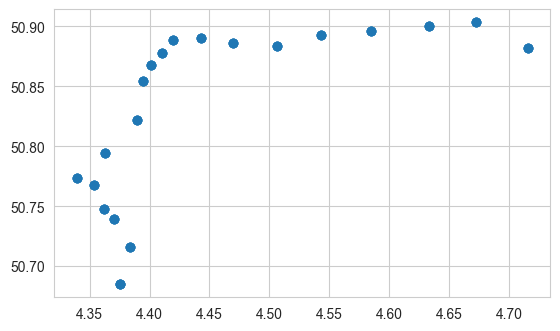

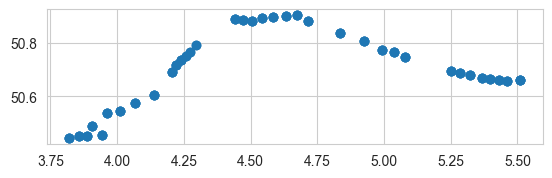

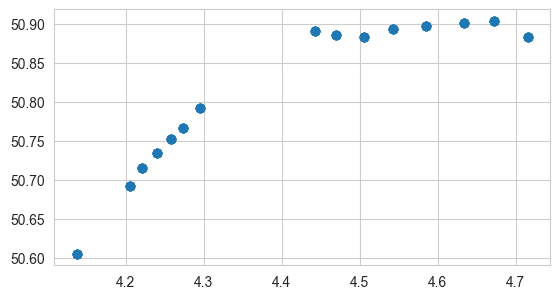

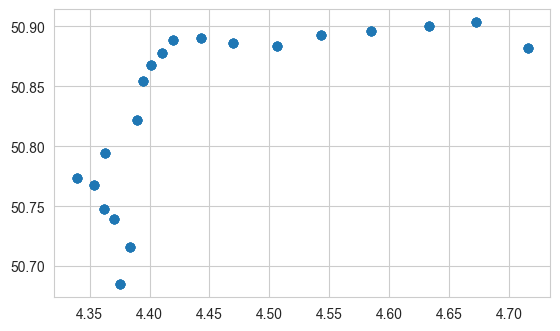

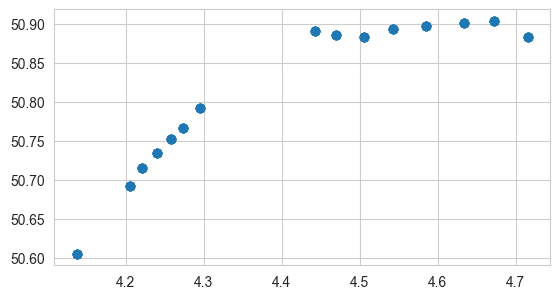

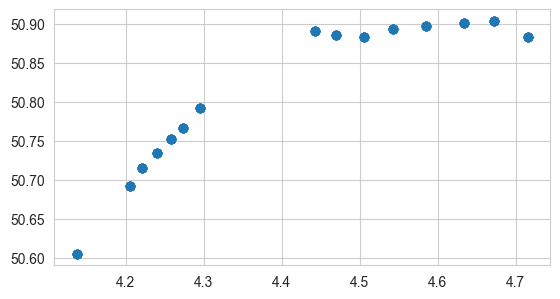

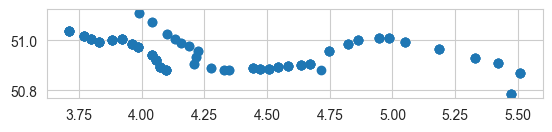

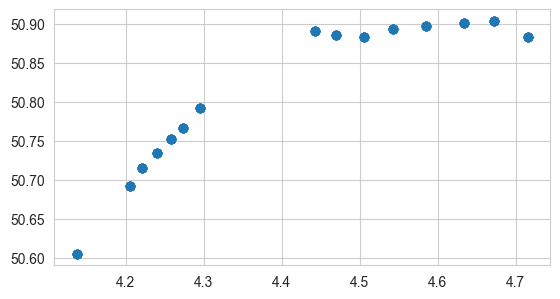

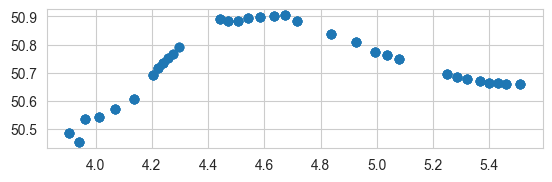

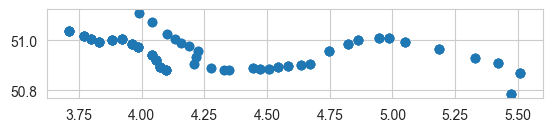

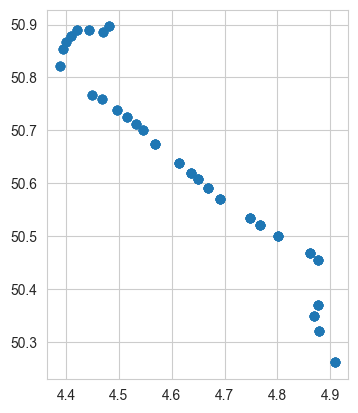

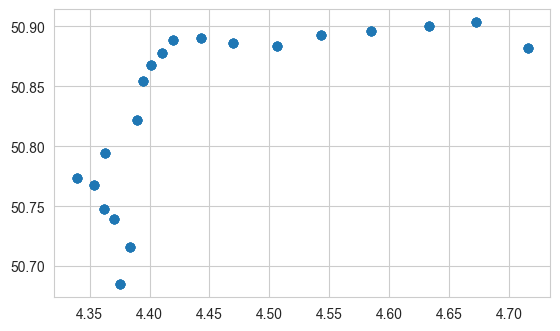

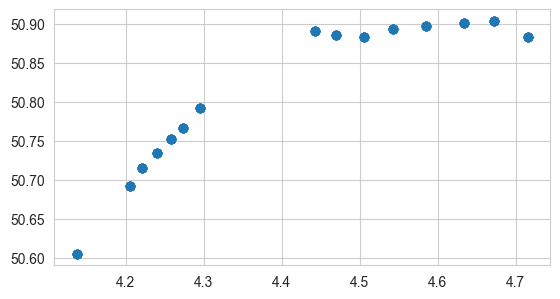

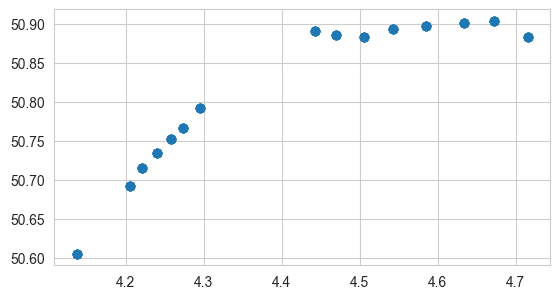

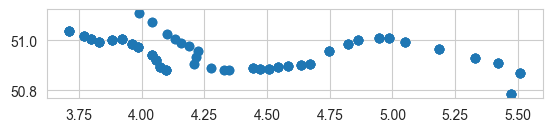

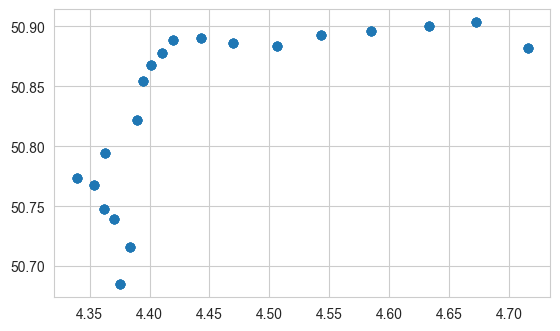

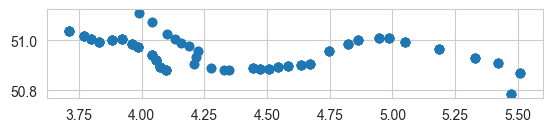

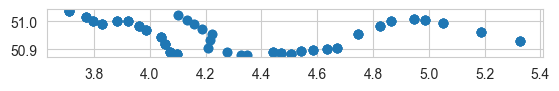

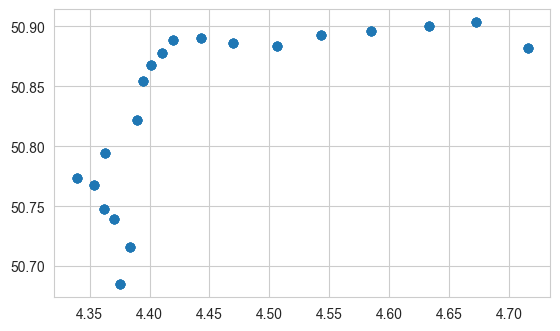

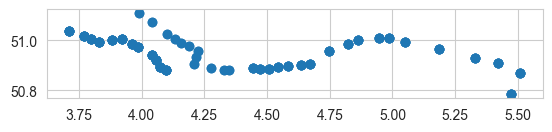

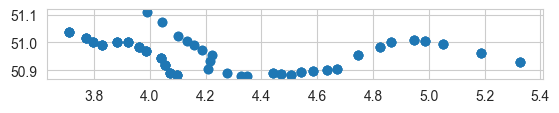

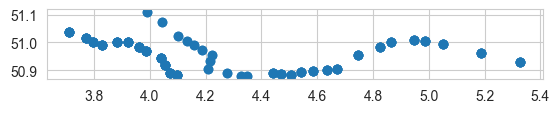

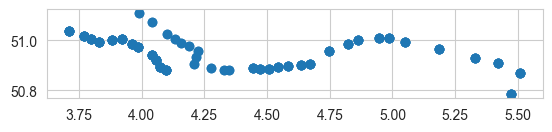

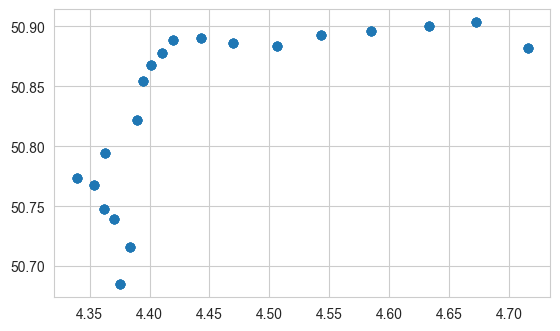

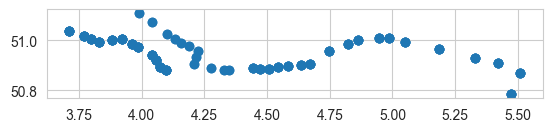

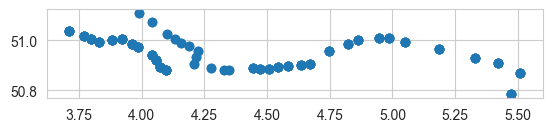

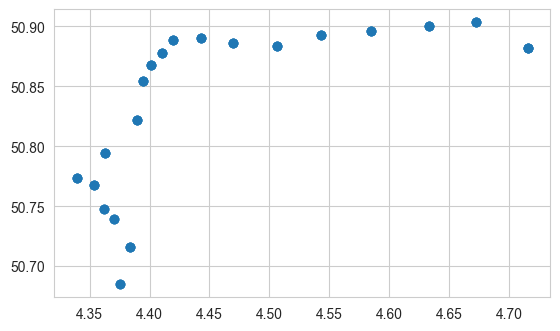

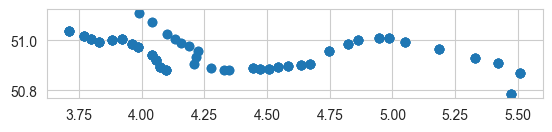

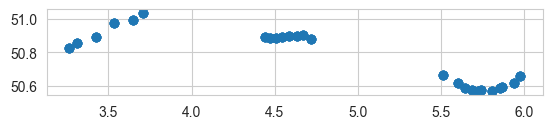

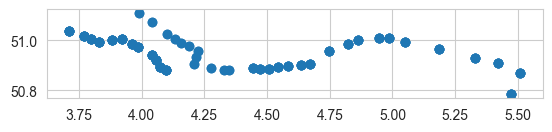

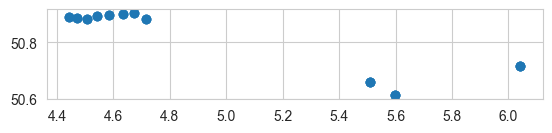

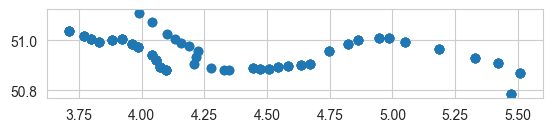

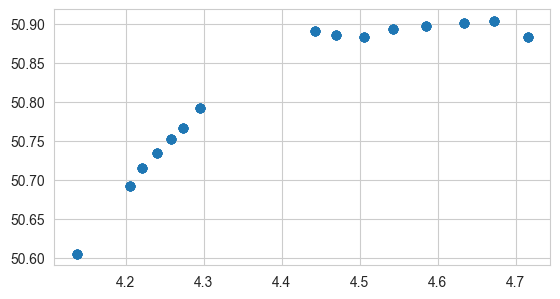

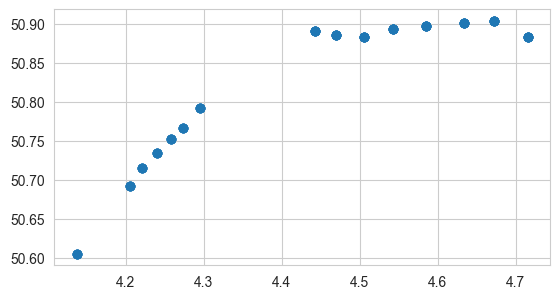

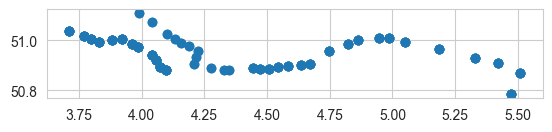

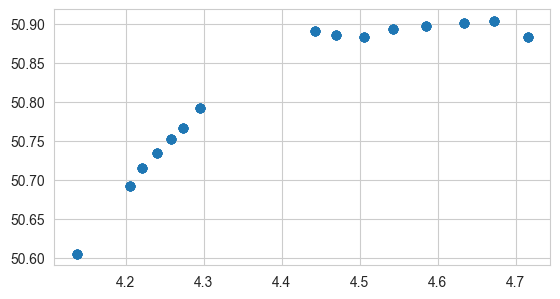

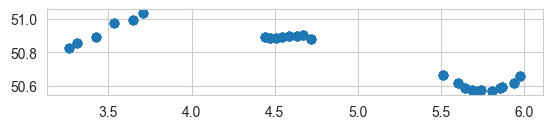

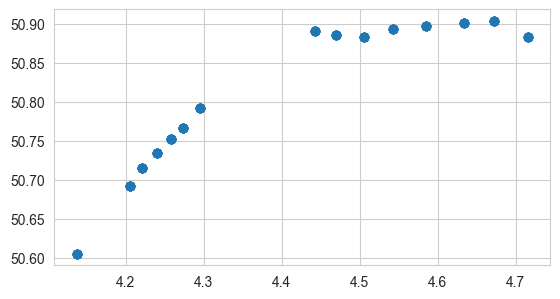

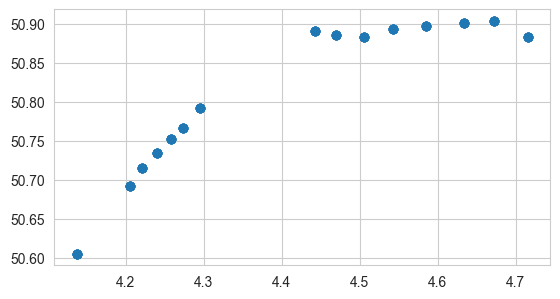

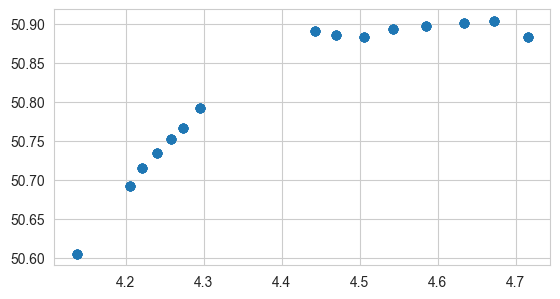

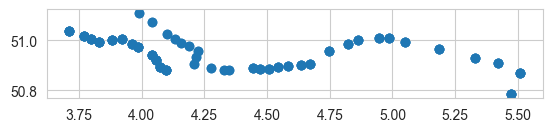

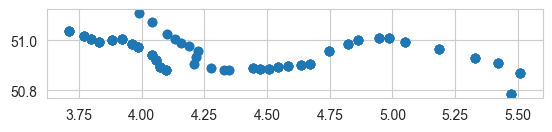

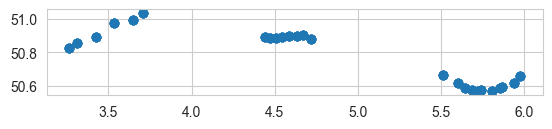

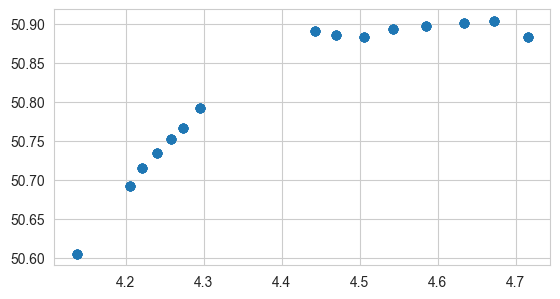

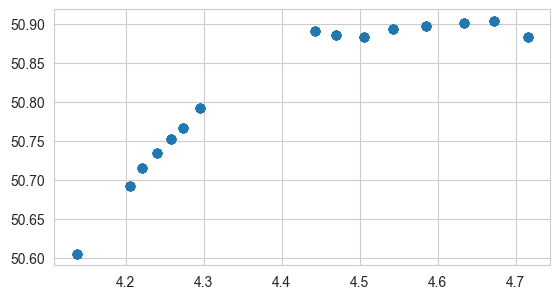

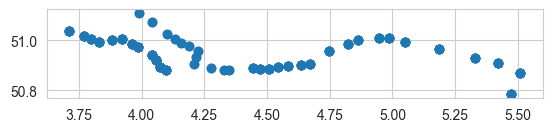

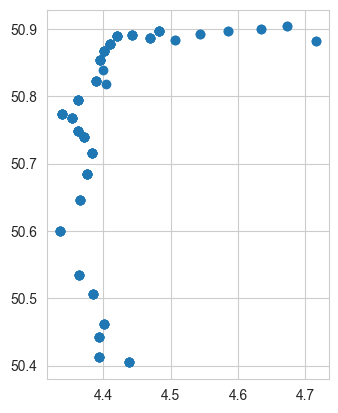

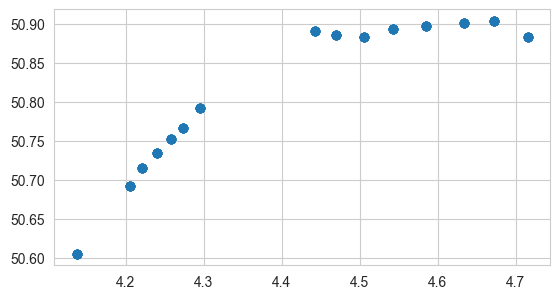

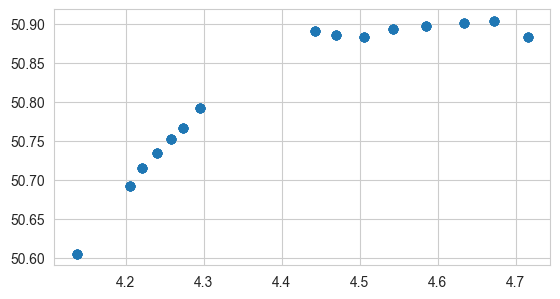

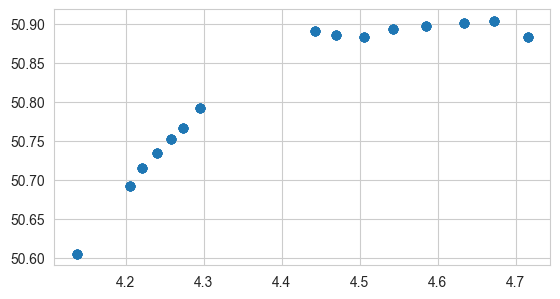

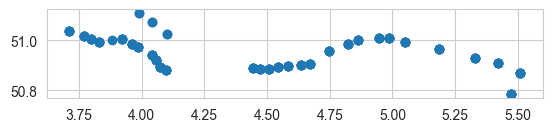

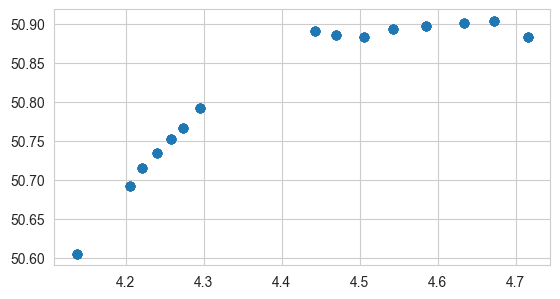

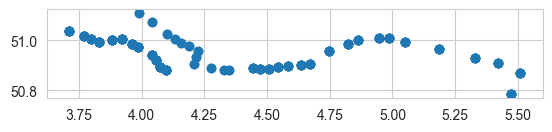

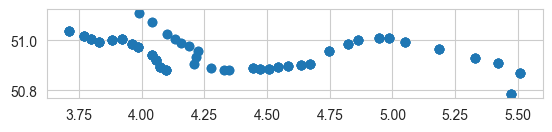

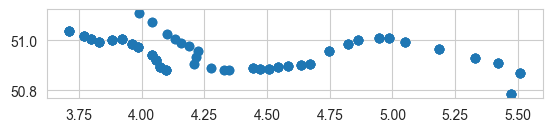

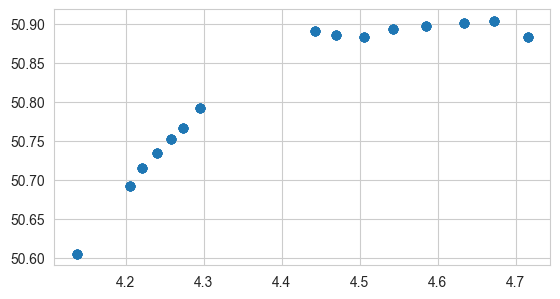

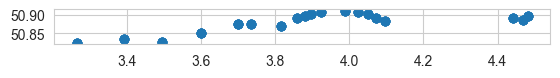

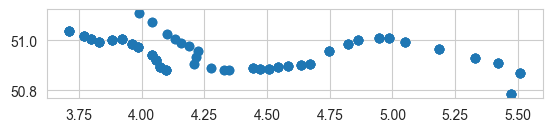

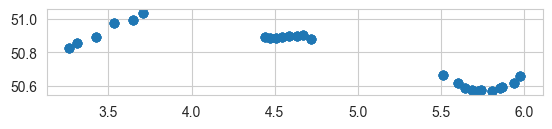

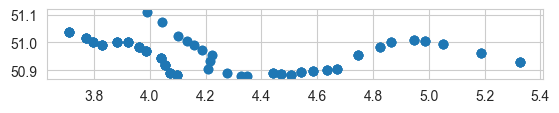

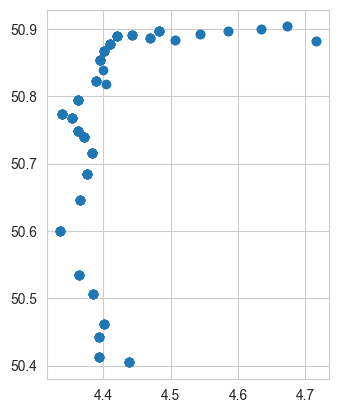

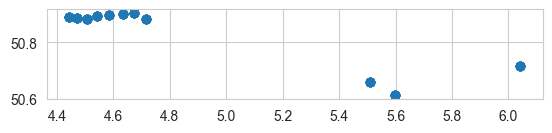

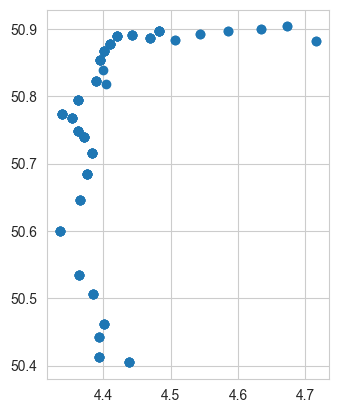

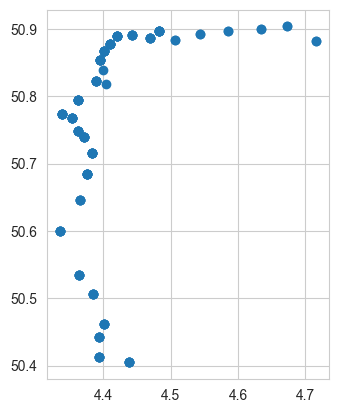

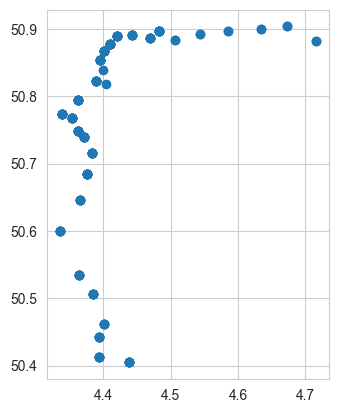

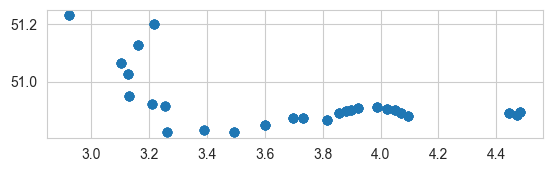

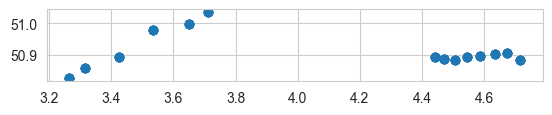

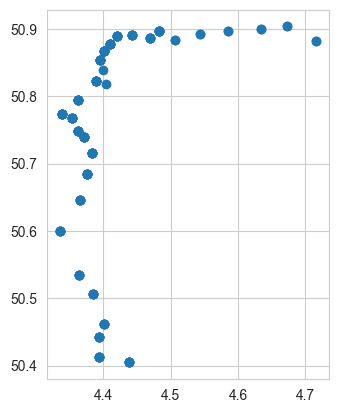

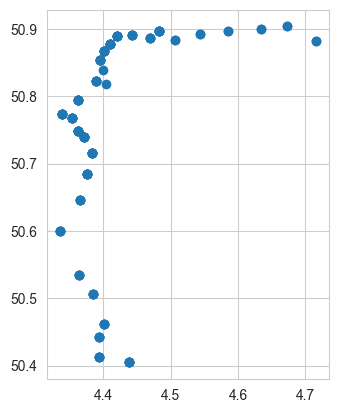

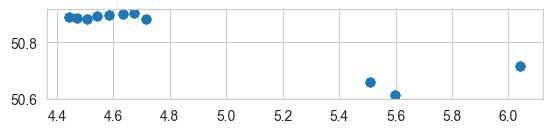

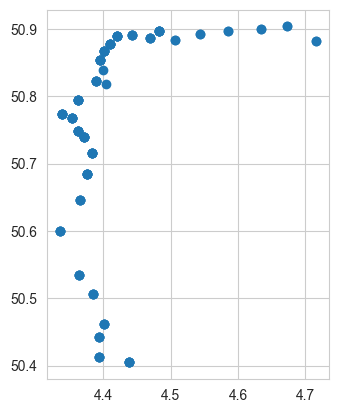

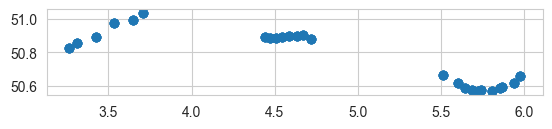

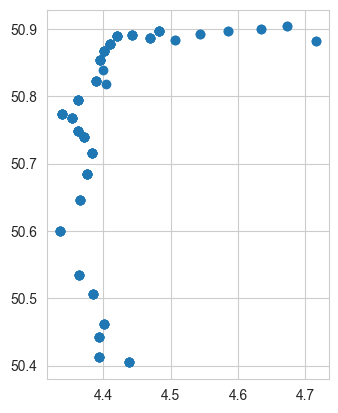

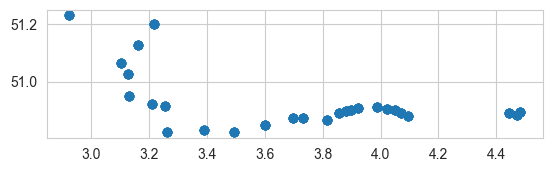

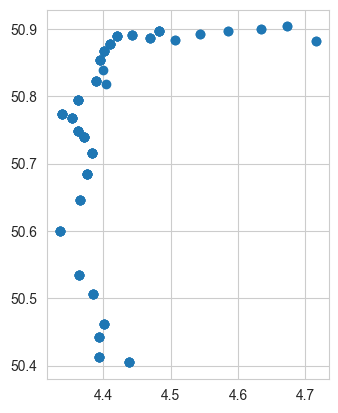

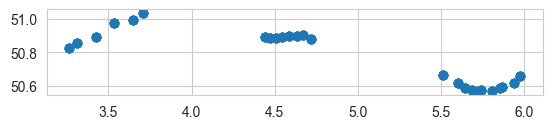

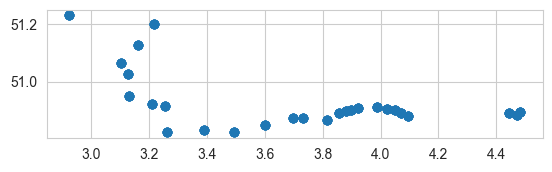

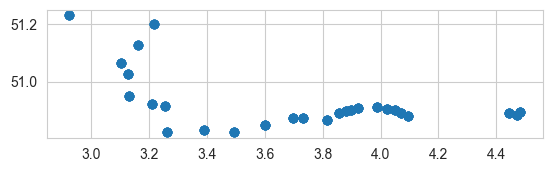

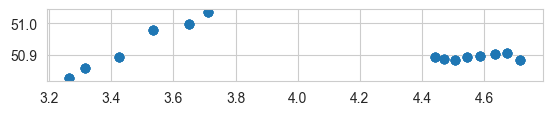

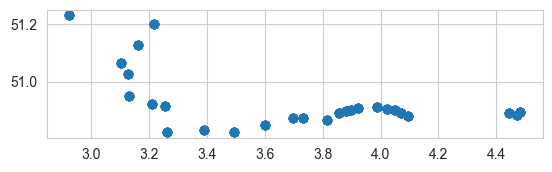

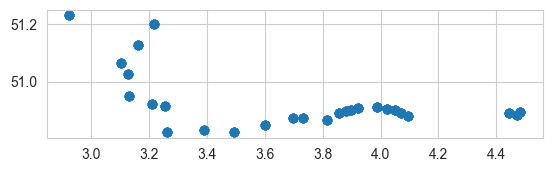

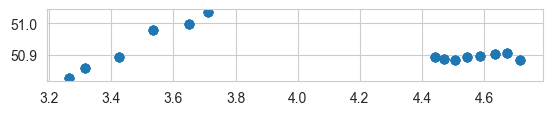

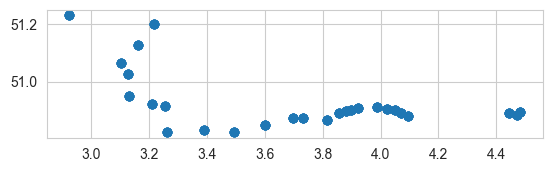

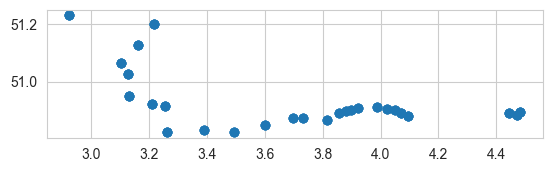

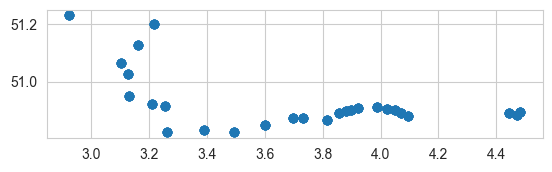

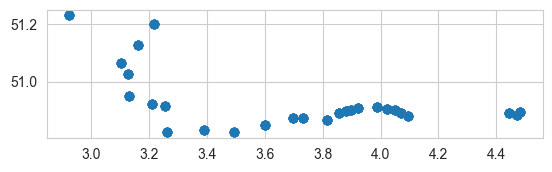

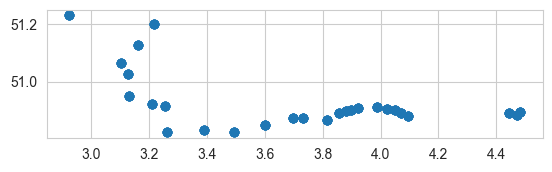

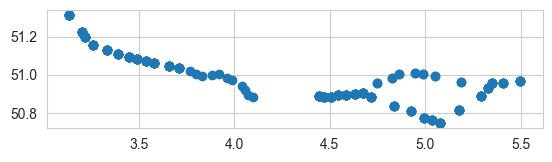

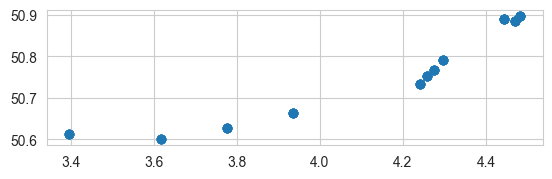

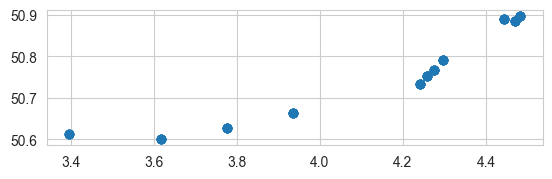

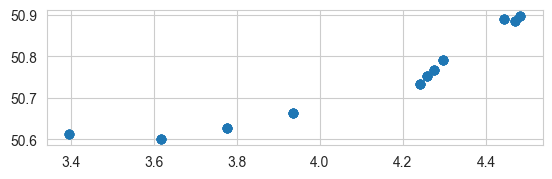

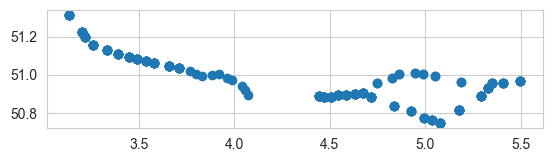

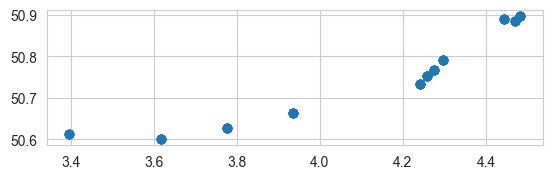

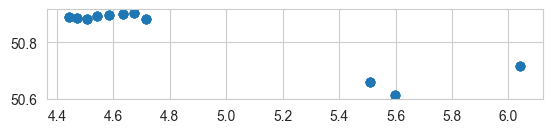

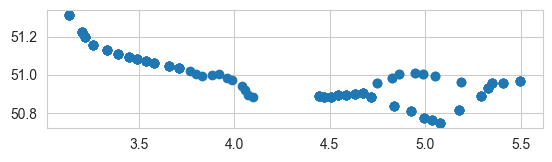

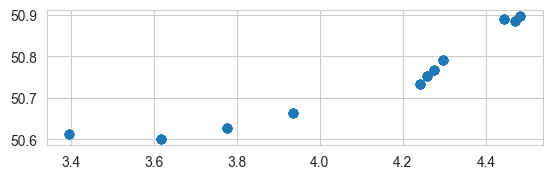

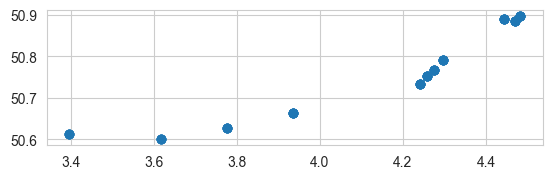

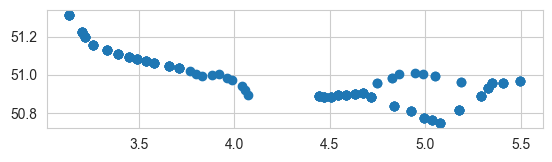

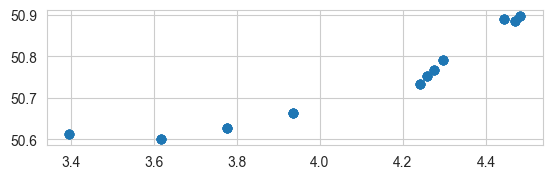

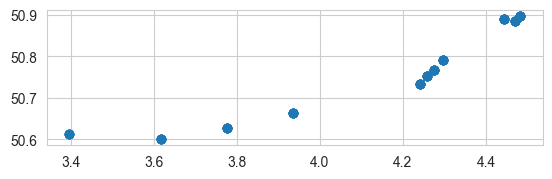

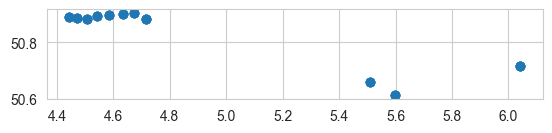

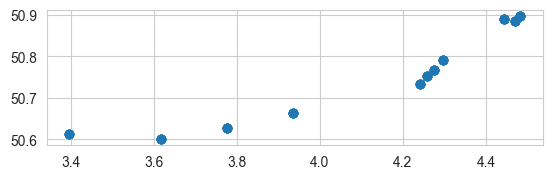

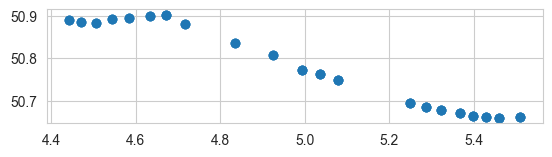

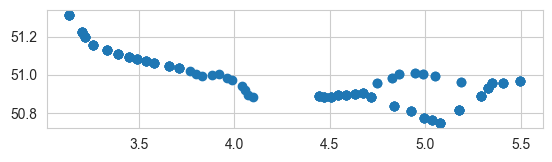

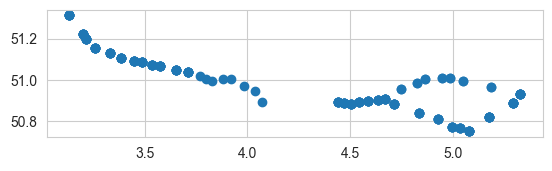

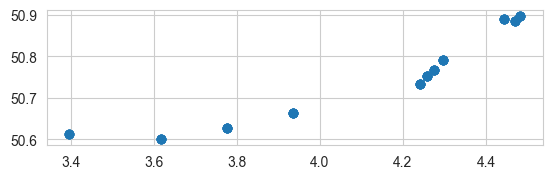

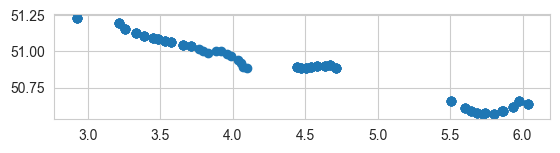

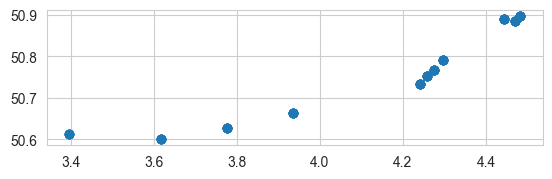

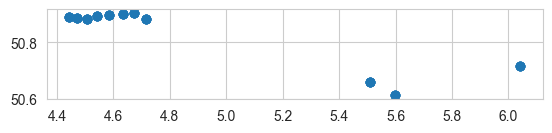

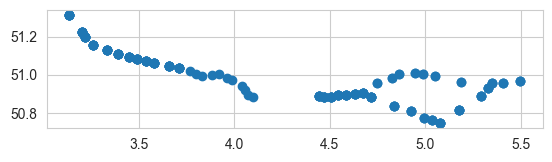

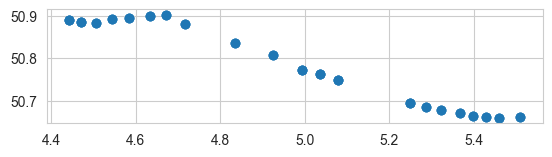

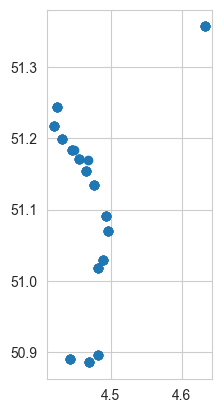

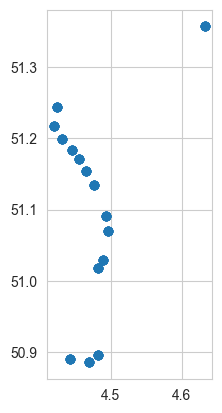

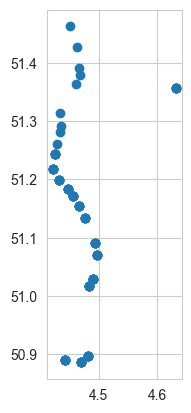

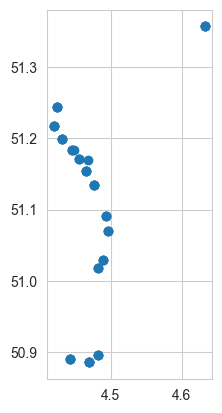

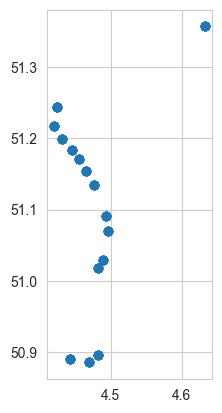

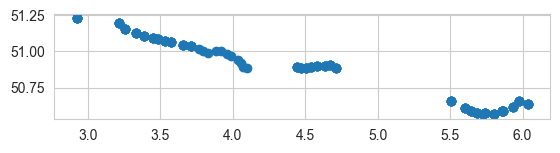

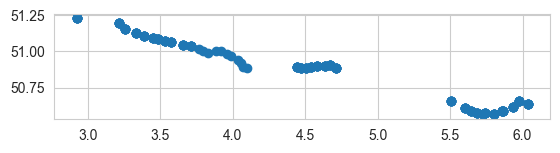

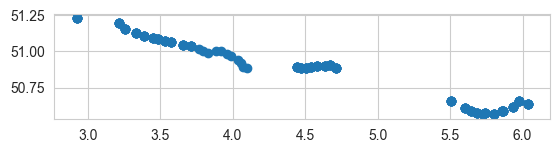

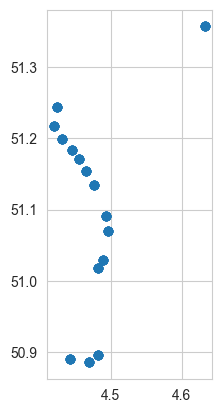

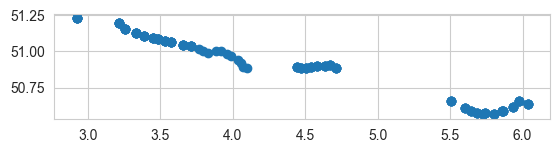

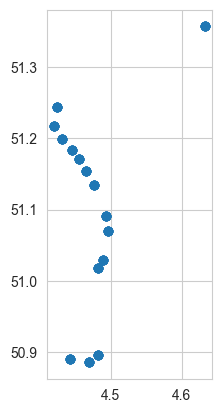

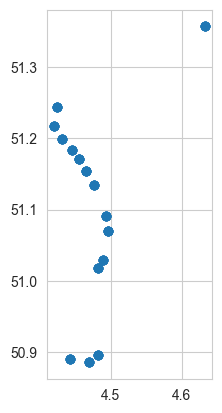

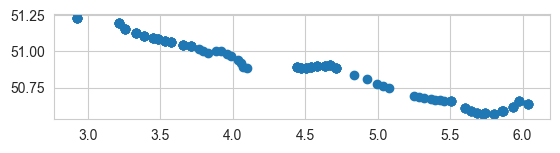

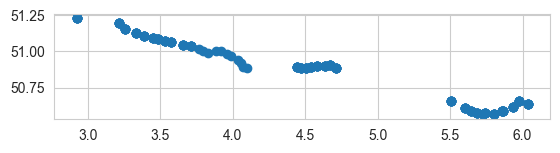

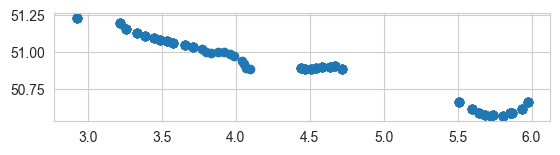

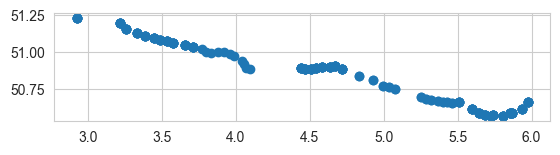

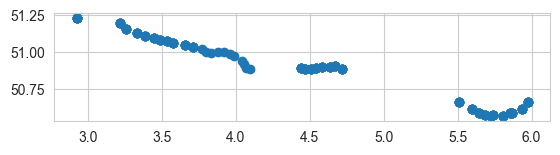

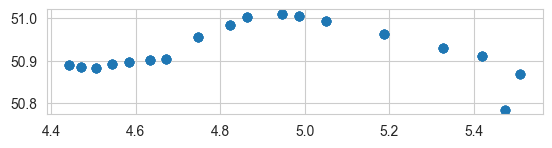

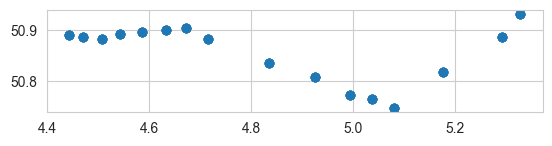

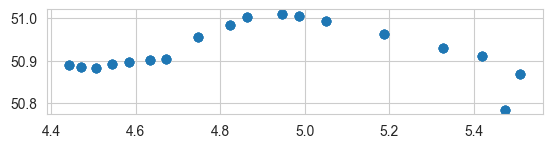

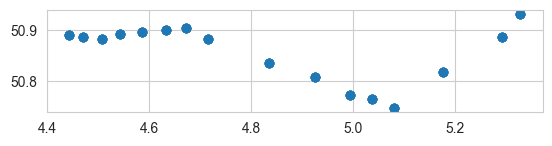

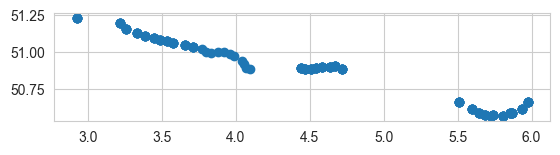

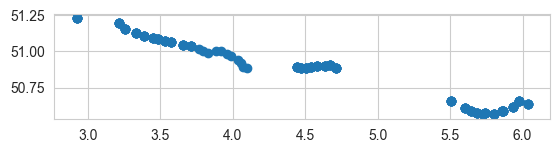

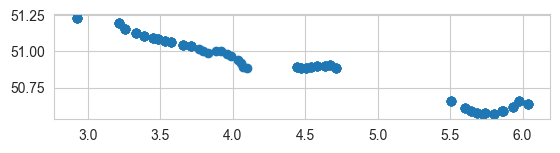

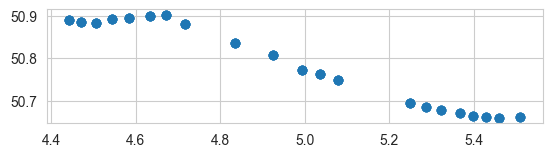

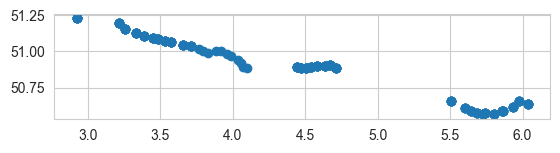

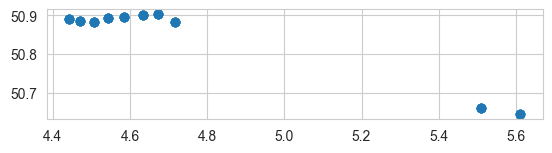

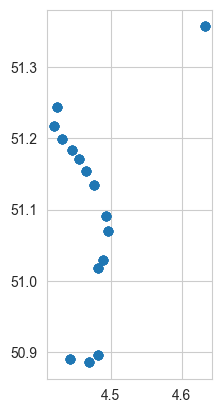

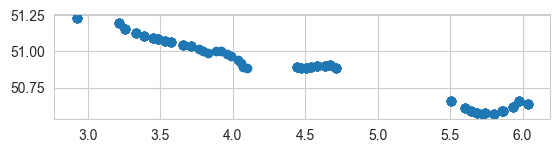

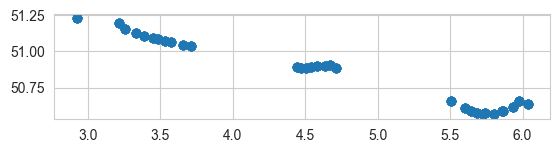

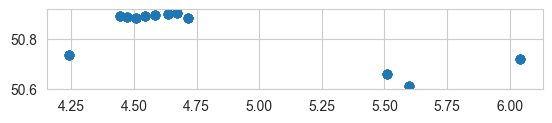

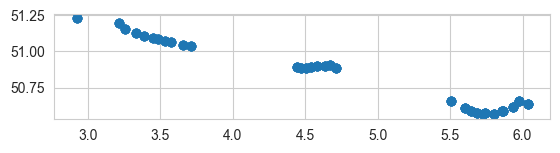

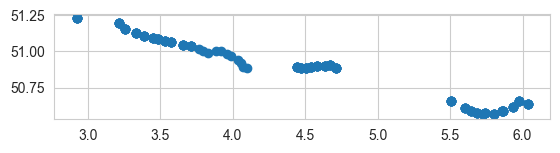

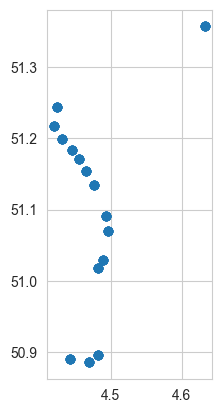

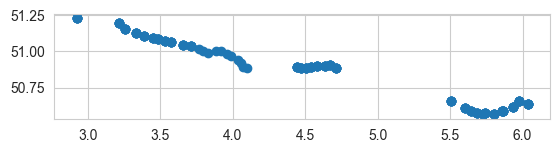

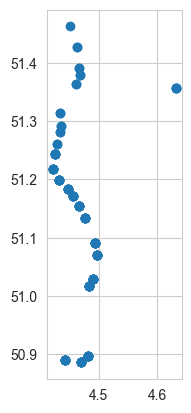

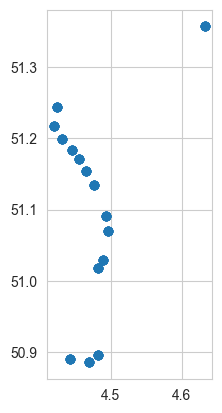

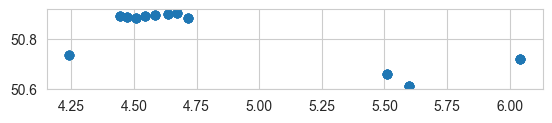

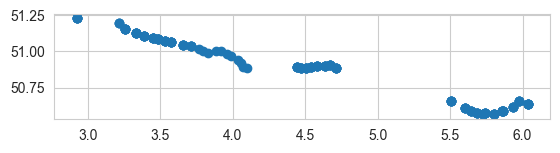

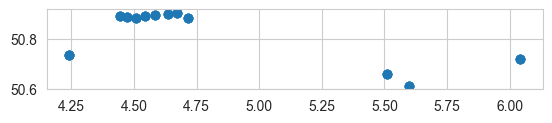

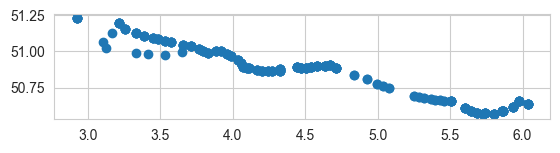

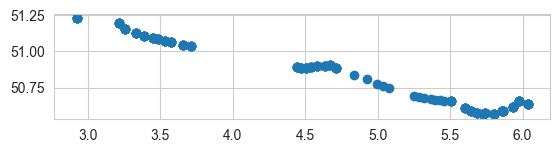

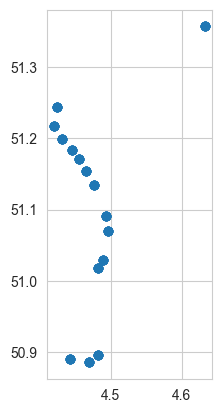

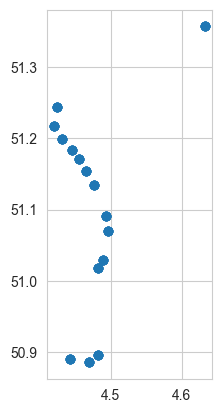

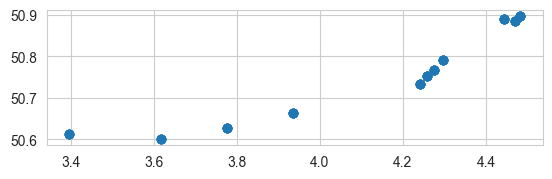

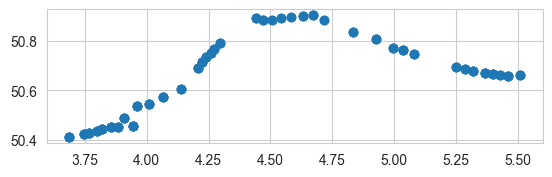

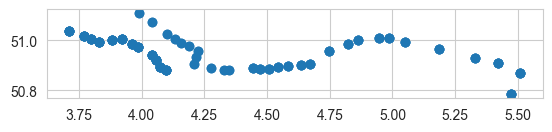

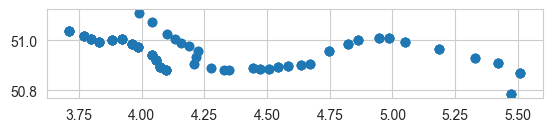

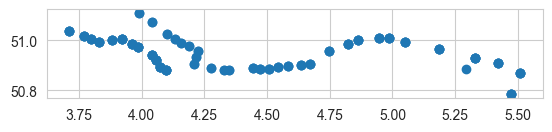

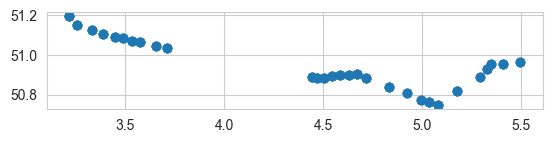

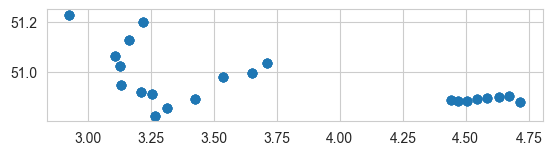

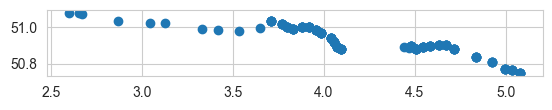

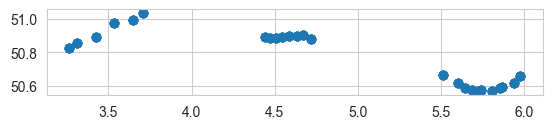

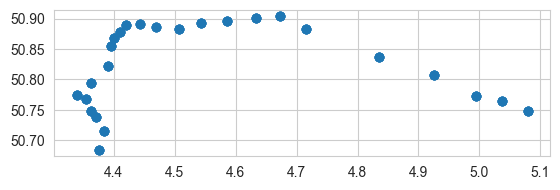

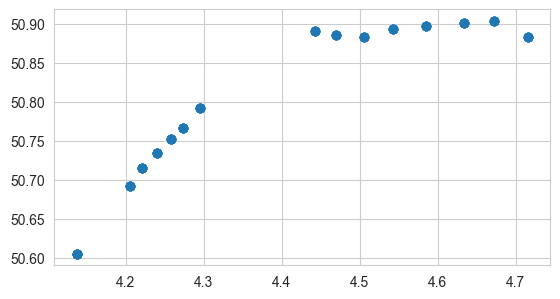

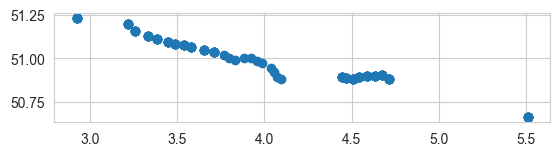

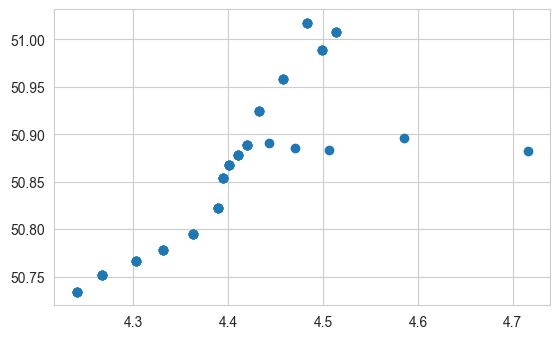

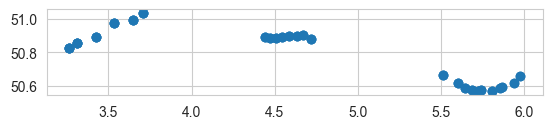

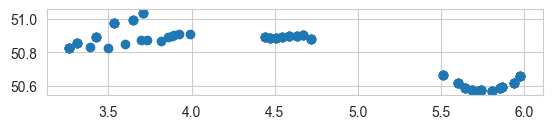

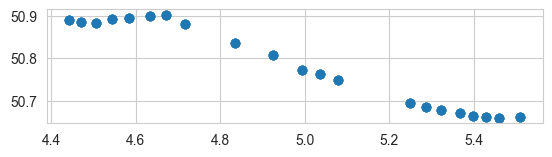

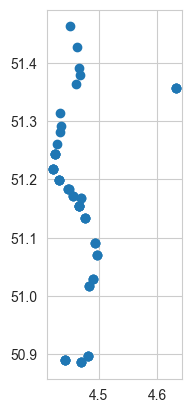

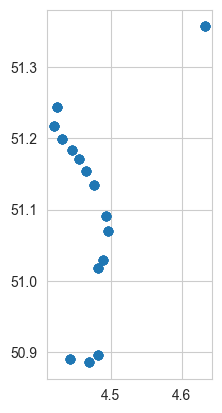

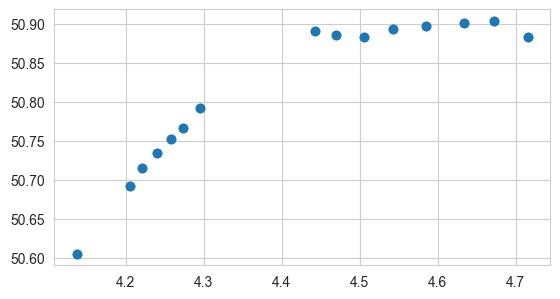

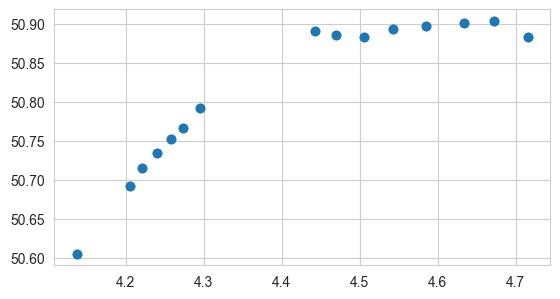

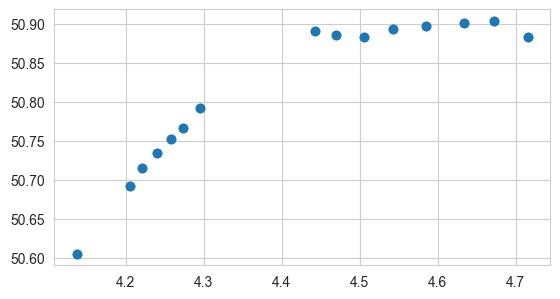

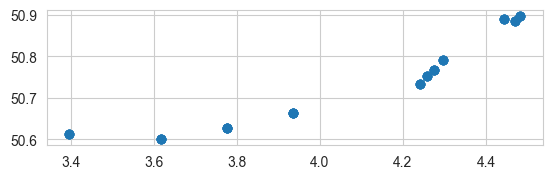

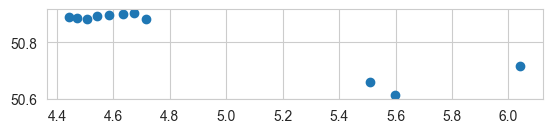

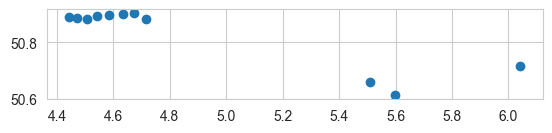

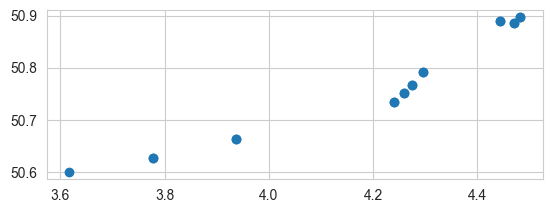

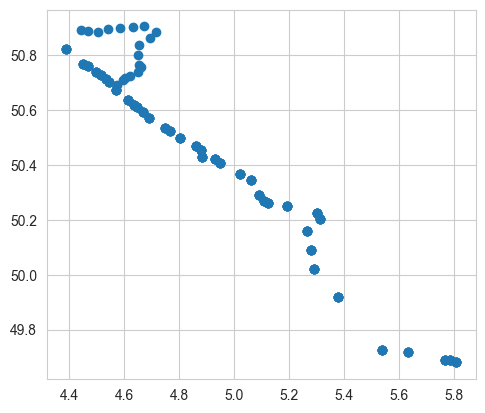

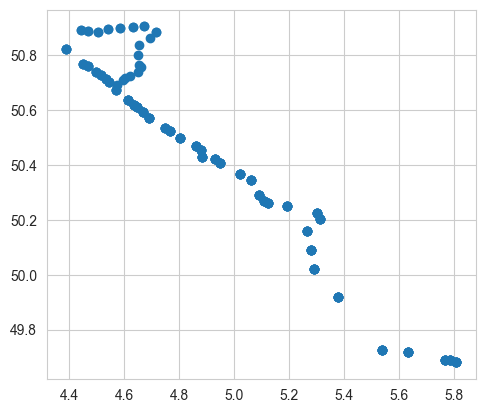

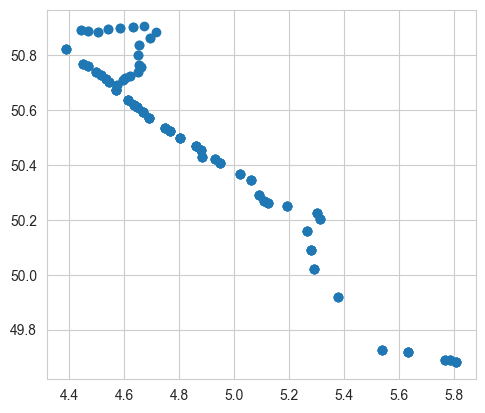

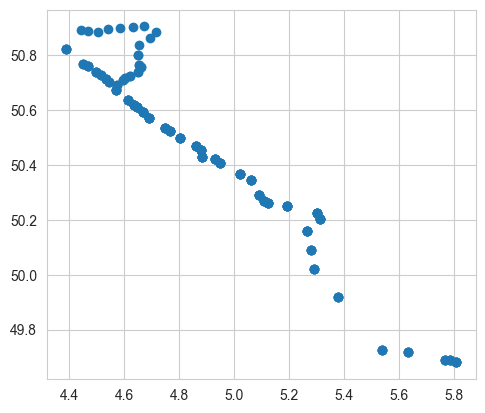

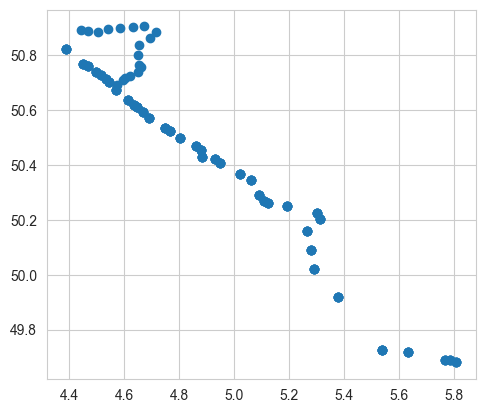

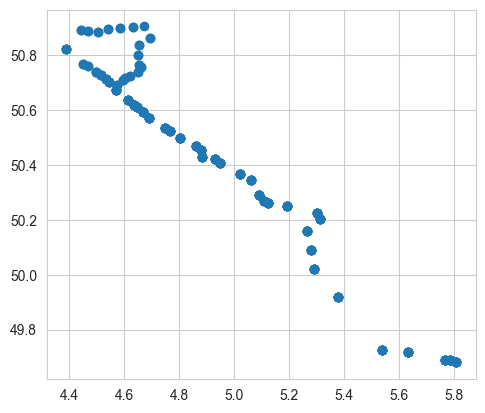

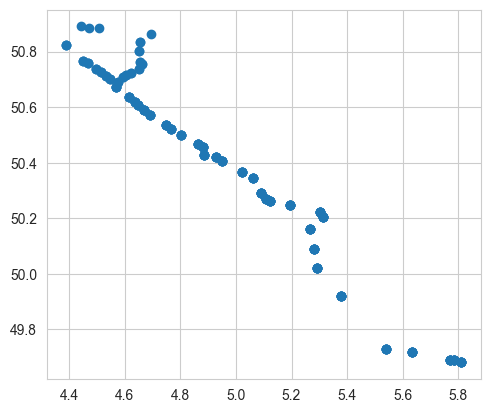

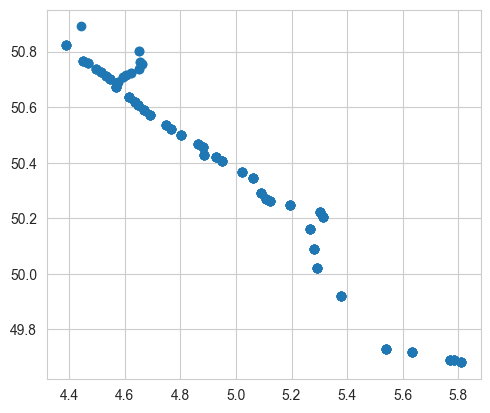

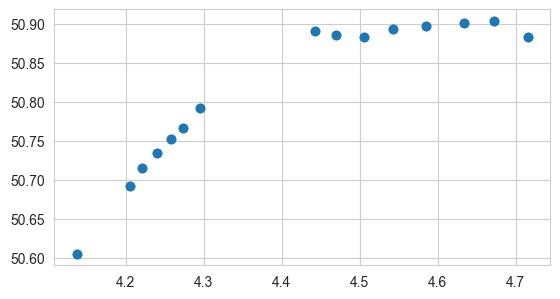

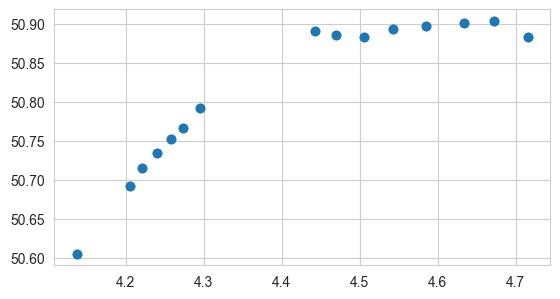

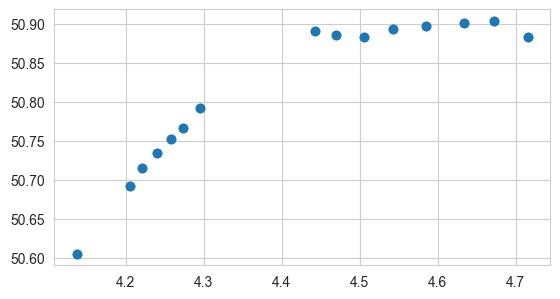

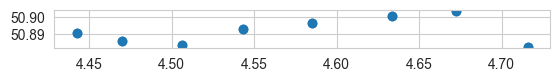

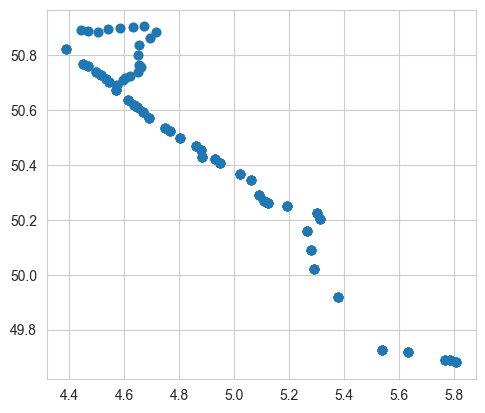

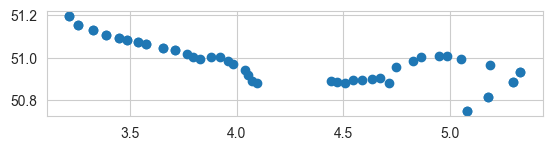

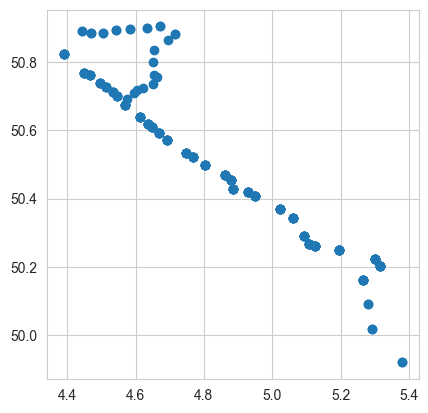

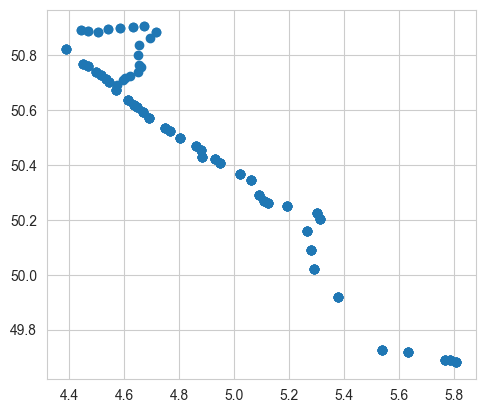

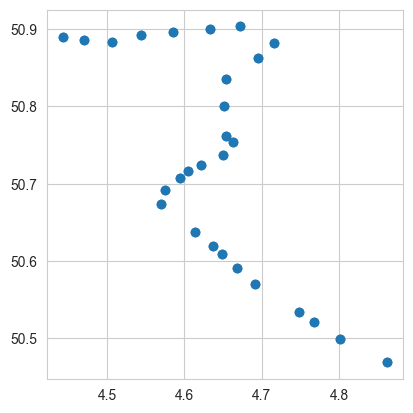

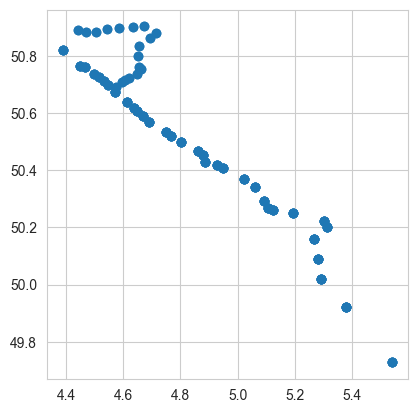

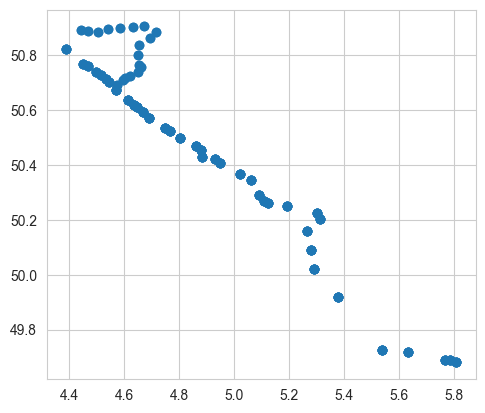

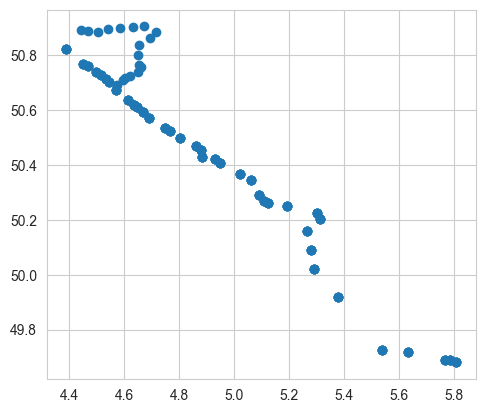

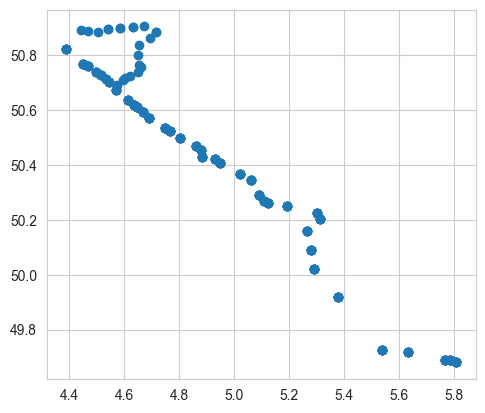

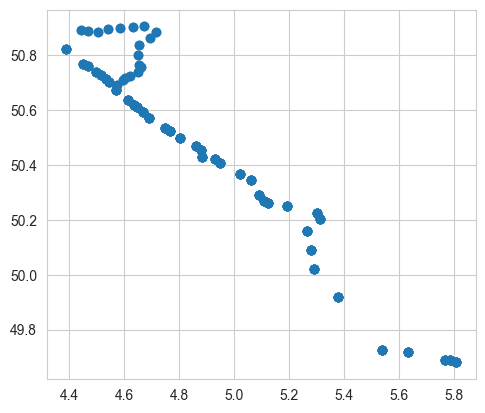

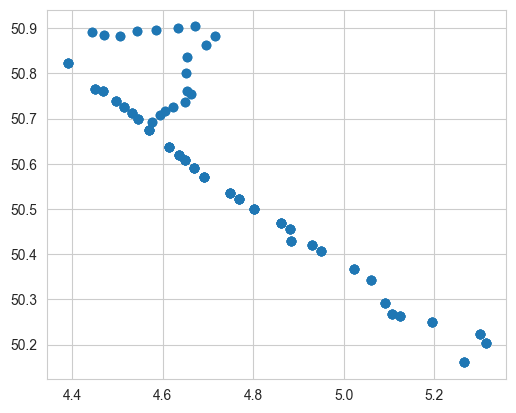

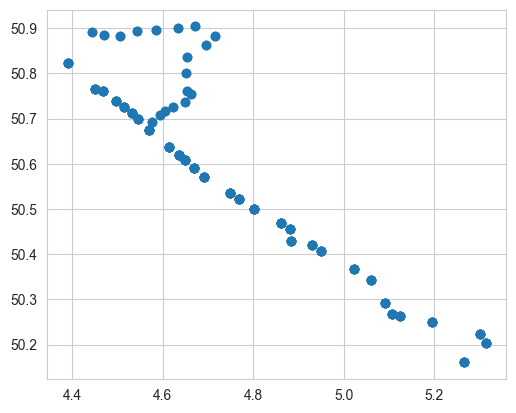

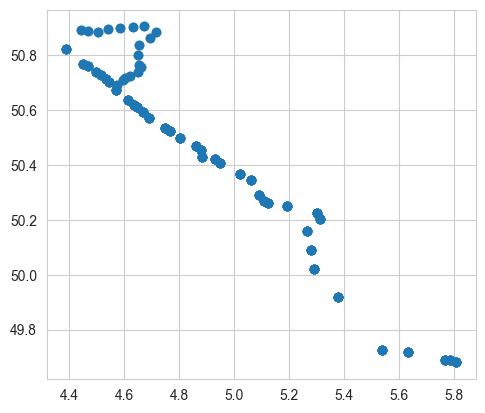

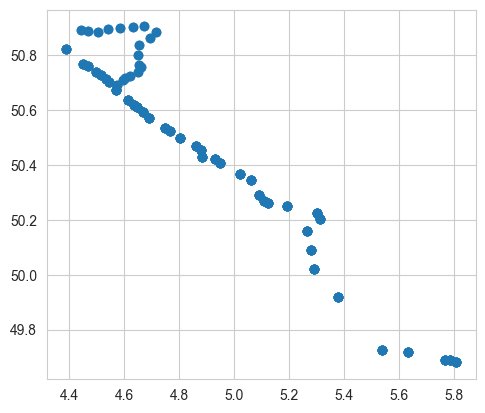

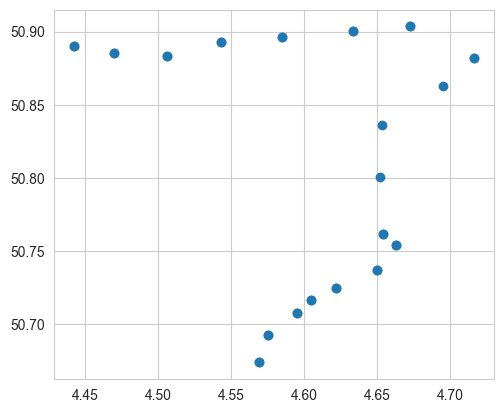

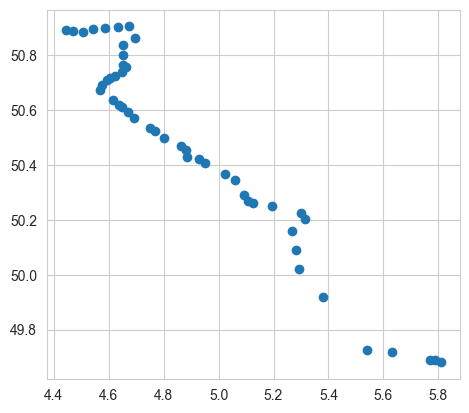

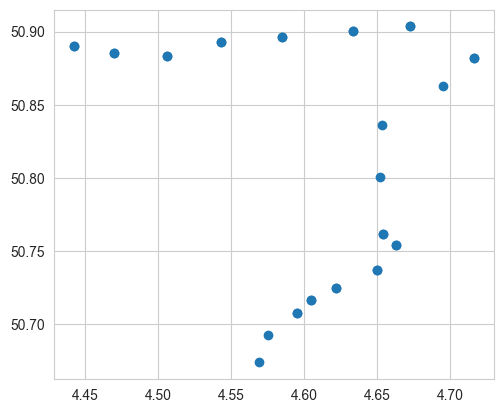

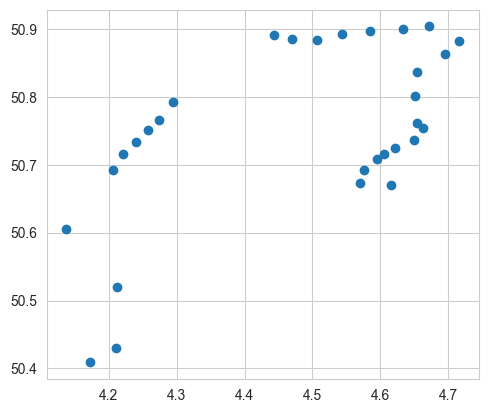

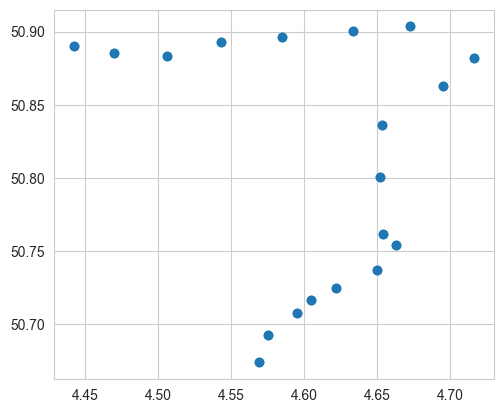

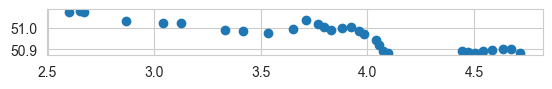

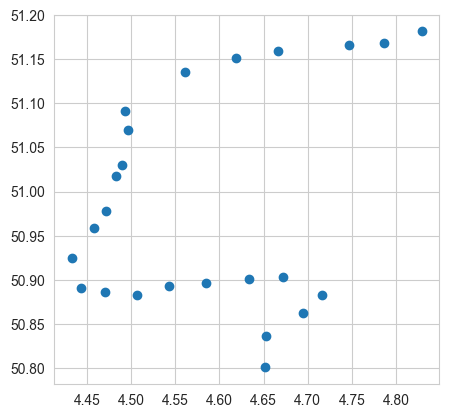

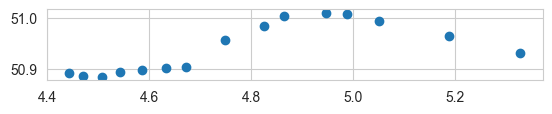

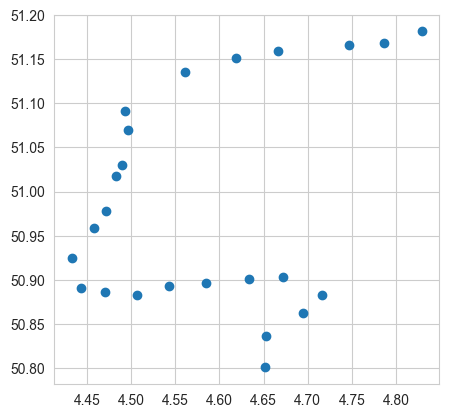

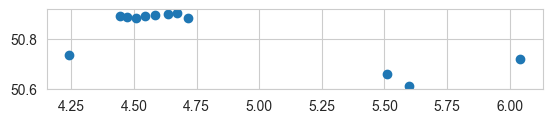

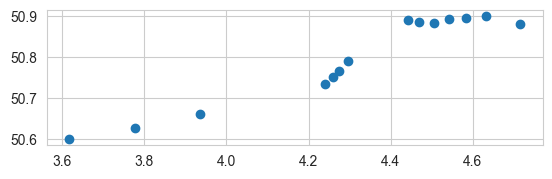

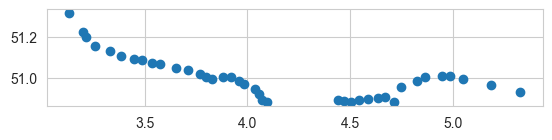

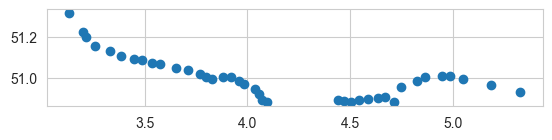

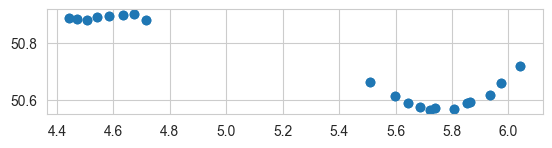

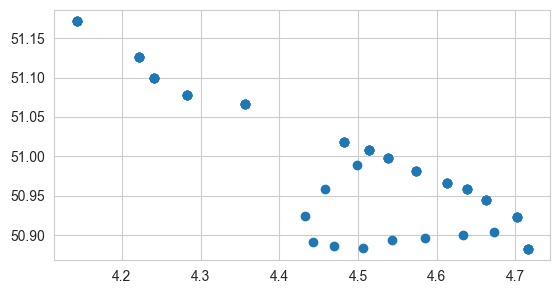

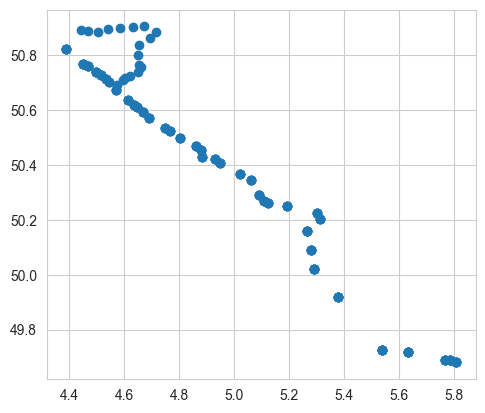

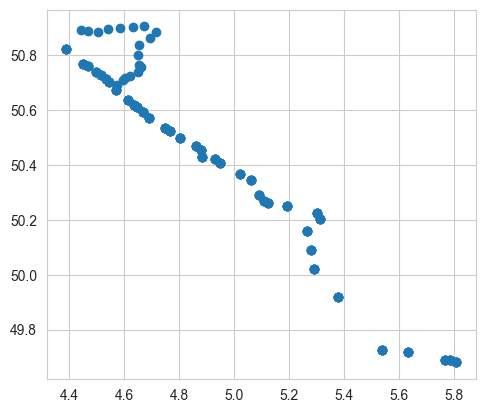

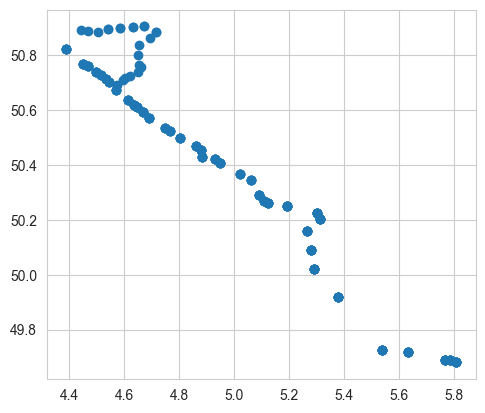

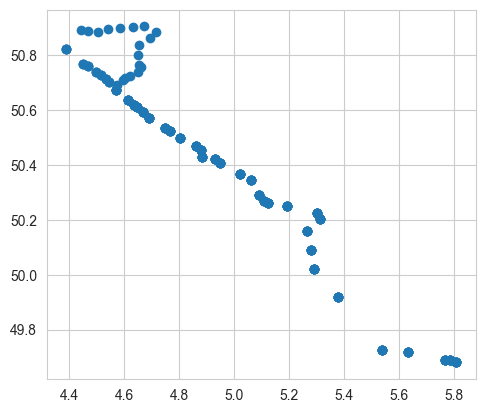

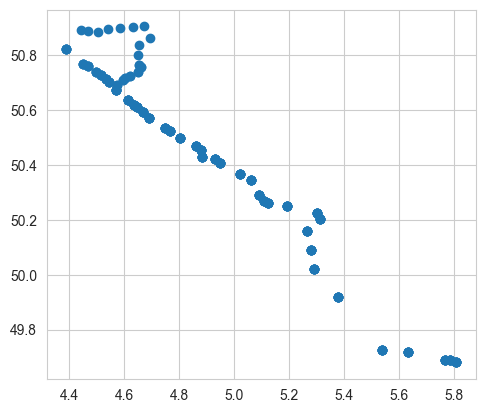

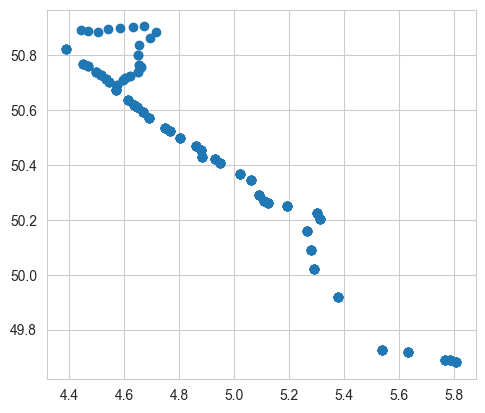

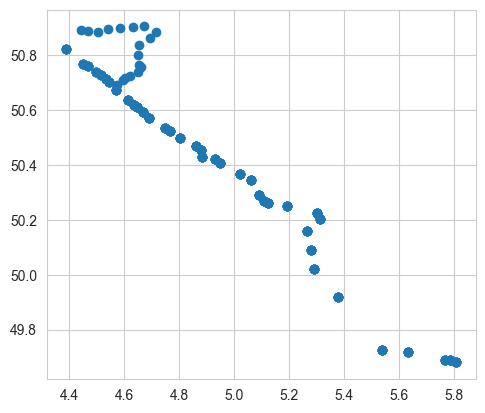

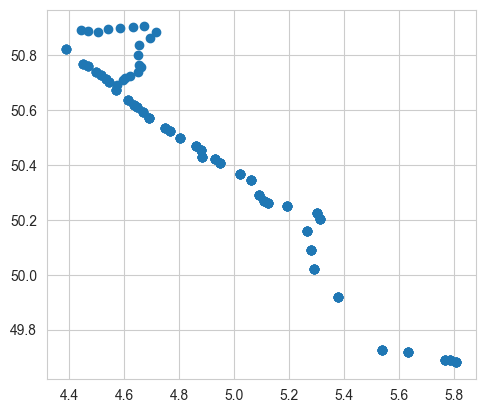

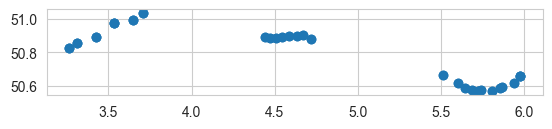

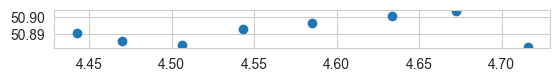

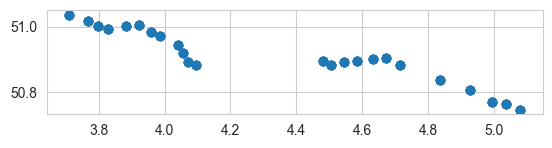

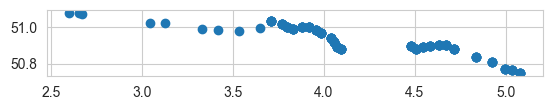

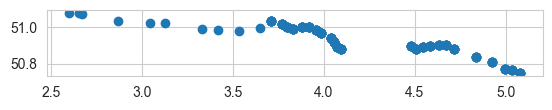

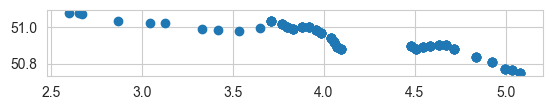

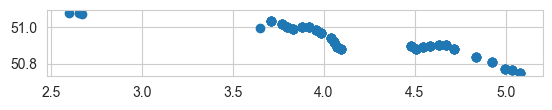

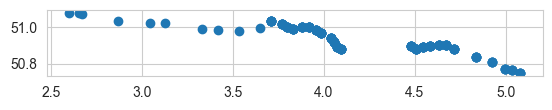

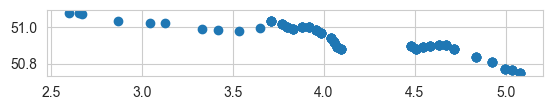

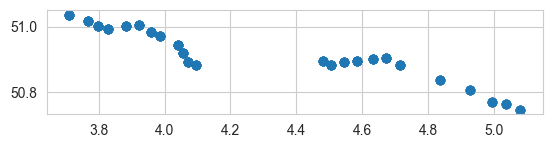

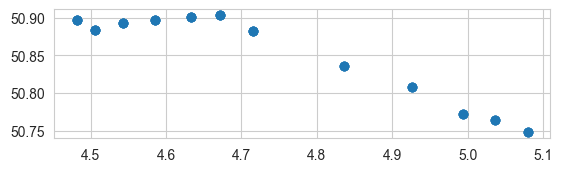

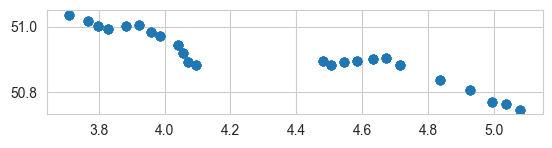

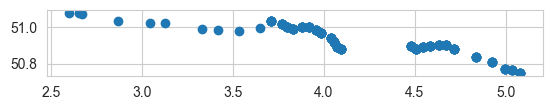

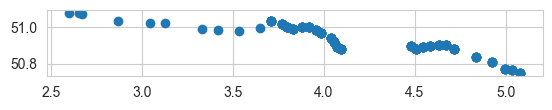

Error in callback <function flush_figures at 0x290ef8f70> (for post_execute):


KeyboardInterrupt: 

In [118]:
for train_number in train_numbers:
    gdf = gpd.GeoDataFrame(
    routes.get(train_number), geometry=gpd.points_from_xy(routes.get(train_number).longitude, routes.get(train_number).latitude))
    gdf.plot()
plt.show()


In [117]:
routes.get(10)

Date of departure  Train number Time of real arrival  \
41287        2020-09-26            10  2022-10-28 20:26:47   
41329        2020-09-25            10  2022-10-28 20:27:51   
41254        2020-09-21            10  2022-10-28 20:27:54   
41130        2020-09-22            10  2022-10-28 20:30:31   
41158        2020-09-23            10  2022-10-28 20:35:15   
...                 ...           ...                  ...   
584          2020-09-23            10  2022-10-28 21:23:14   
926          2020-09-20            10  2022-10-28 21:24:31   
95320        2020-09-24            10  2022-10-28 21:24:42   
62564        2020-09-24            10  2022-10-28 21:25:34   
2365         2020-09-24            10  2022-10-28 21:26:29   

      Time of real departure Time of planned arrival  \
41287    2022-10-28 20:26:47     2022-10-28 20:29:00   
41329    2022-10-28 20:27:51     2022-10-28 20:29:00   
41254    2022-10-28 20:27:54     2022-10-28 20:29:00   
41130    2022-10-28 20:30:31     2022-10-28 20:29:00   
41158    2022-10-28 20:35:15     2022-10-28 20:29:00   
...                      ...                     ...   
584      2022-10-28 21:24:17     2022-10-28 21:19:00   
926      2022-10-28 21:24:31     2022-10-28 21:21:00   
95320    2022-10-28 21:24:42     2022-10-28 21:17:00   
62564    2022-10-28 21:25:34     2022-10-28 21:18:00   
2365     2022-10-28 21:26:29     2022-10-28 21:19:00   

      Time of planned departure Name of the stop  Delay time  longitude  \
41287       2022-10-28 20:29:00       hergenrath         0.0   6.041335   
41329       2022-10-28 20:29:00       hergenrath         0.0   6.041335   
41254       2022-10-28 20:29:00       hergenrath         0.0   6.041335   
41130       2022-10-28 20:29:00       hergenrath        91.0   6.041335   
41158       2022-10-28 20:29:00       hergenrath       375.0   6.041335   
...                         ...              ...         ...        ...   
584         2022-10-28 21:19:00           diegem       254.0   4.442774   
926         2022-10-28 21:21:00           diegem       211.0   4.442774   
95320       2022-10-28 21:17:00         nossegem       462.0   4.506112   
62564       2022-10-28 21:18:00         zaventem       454.0   4.469886   
2365        2022-10-28 21:19:00           diegem       449.0   4.442774   

        latitude  Number of delays  
41287  50.718209          0.597403  
41329  50.718209          0.597403  
41254  50.718209          0.597403  
41130  50.718209          0.597403  
41158  50.718209          0.597403  
...          ...               ...  
584    50.890478          0.597403  
926    50.890478          0.597403  
95320  50.883314          0.597403  
62564  50.885723          0.597403  
2365   50.890478          0.597403  

[77 rows x 11 columns]


For each route , we need to get the total times delay time >0 , then divide by the number of total stops (route length)


In [ ]:
for train_number in train_numbers:
    routes.get(train_number)[]

In [28]:
types = [type(r) for r in routes.values()]
types

[pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.co

For each route, get the average delay  -> wrong we need to see if a trip is more likely to experience a delay,
not how much that delay is

In [29]:
# routes_delay = trips
# routes_delay.groupby("Train number")["Delay time"].mean()
# routes_delay = routes_delay[["Train number", "Delay time"]]
# routes_delay.sort_values(by = "Delay time" , ascending = False)


In [28]:
routes_delay = trips
routes_delay.groupby("Train number")["Delay time"].apply(lambda x: len((x > 0)))
routes_delay = routes_delay[["Train number", "Delay time"]]
routes_delay.sort_values(by = "Delay time" , ascending = False)
routes_delay = routes_delay.rename(columns ={"Delay time": "absolute_delay_occurences"})
routes_delay[routes_delay['Train number']==10]

Train number  absolute_delay_occurences
216              10                        0.0
584              10                      254.0
926              10                      211.0
1169             10                        0.0
1515             10                        0.0
...             ...                        ...
96799            10                      240.0
97162            10                        0.0
97586            10                        0.0
97926            10                       36.0
98805            10                      427.0

[77 rows x 2 columns]

In [27]:
trips_grouped = trips.groupby("Train number")["Delay time"].count()
routes_delay = routes_delay.merge(trips_grouped, left_on="Train number", right_on = "Train number")
routes_delay = routes_delay.rename(columns ={"Delay time": "total_delay_occurences"})
routes_delay

Train number  absolute_delay_occurences  total_delay_occurences
0                 11                       39.0                      64
1                 11                        0.0                      64
2                 11                      194.0                      64
3                 11                      178.0                      64
4                 11                       30.0                      64
...              ...                        ...                     ...
313648          5094                        0.0                       6
313649          5094                        0.0                       6
313650          5094                        0.0                       6
313651          5094                        0.0                       6
313652          5094                        0.0                       6

[313653 rows x 3 columns]

We have to divide the absolute occurences by the total occurences

In [46]:
routes_delay["relative_delay_occurences"] = routes_delay["absolute_delay_occurences"] / routes_delay["total_delay_occurences"].astype(float)
routes_delay

Train number  absolute_delay_occurences  total_delay_occurences  \
0                 11                       39.0                      57   
1                 11                        0.0                      57   
2                 11                      194.0                      57   
3                 11                      178.0                      57   
4                 11                       30.0                      57   
...              ...                        ...                     ...   
298845          5094                        0.0                       6   
298846          5094                        0.0                       6   
298847          5094                        0.0                       6   
298848          5094                        0.0                       6   
298849          5094                        0.0                       6   

        relative_delay_occurences  
0                        0.684211  
1                        0.000000  
2                        3.403509  
3                        3.122807  
4                        0.526316  
...                           ...  
298845                   0.000000  
298846                   0.000000  
298847                   0.000000  
298848                   0.000000  
298849                   0.000000  

[298850 rows x 4 columns]

Boxplot for the minutes of delay

In [47]:
plt.hist(routes_delay["delay_indicator"])
plt.show

KeyError: 'delay_indicator'

Merge routes and stations dataset so we get the coordinates, to be able to plot the routes

In [48]:
routes = routes.merge(stations,left_on ="Name of the stop", right_on="name")

AttributeError: 'dict' object has no attribute 'merge'

In [49]:

columns = ['Train number','Direction of relation',
       'Name of the stop', 'Railway of arrival','Delay time']
trips[trips["Direction of relation"] == "INT: WIEN HBF -> BRUSSEL-ZUID"]


KeyError: 'Direction of relation'

In total 259 distinct route ( direction of relation)

In [50]:
obj3 = trips[columns].groupby("Direction of relation").count()
obj3


KeyError: "['Direction of relation', 'Railway of arrival'] not in index"

Average delay time per route

In [36]:
trips_delay = trips.groupby("Direction of relation")["Delay time"].mean()
trips_delay



Direction of relation
EURST:BRUSSEL-ZUID -> LONDON-ST-PANCRAS INTL     61.256410
EURST:LONDON-ST-PANCRAS INTL -> BRUSSEL-ZUID     23.424658
IC 01: EUPEN -> OOSTENDE                         62.436881
IC 01: OOSTENDE -> EUPEN                         47.180362
IC 02: ANTWERPEN-CENTRAAL -> OOSTENDE            55.154119
                                                   ...    
THAL:BRUSSEL-ZUID -> AMSTERDAM CENTRAAL          96.203390
THAL:BRUSSEL-ZUID -> PARIS-NORD                 101.571429
THAL:KOLN HBF -> PARIS-NORD                      74.753086
THAL:PARIS-NORD -> AMSTERDAM CENTRAAL            75.224944
THAL:PARIS-NORD -> KOLN HBF                      32.420000
Name: Delay time, Length: 259, dtype: float64

In [37]:
trips_delay.sort_values(ascending = False)

Direction of relation
L B4: AALST -> VILVOORDE                    178.144578
IZY:BRUSSEL-ZUID -> PARIS-NORD              133.500000
L B8-4: OTTIGNIES -> BRUSSEL-ZUID           123.493174
L B8-1: LOUVAIN-LA-NEUVE -> BRUSSEL-ZUID    121.810469
L L3: MAASTRICHT -> HASSELT                 106.436522
                                               ...    
L 12: ARLON -> LUXEMBOURG                     0.000000
TGV:LILLE-EUROPE -> BRUSSEL-ZUID              0.000000
IC 04-2: KORTRIJK -> LILLE FLANDRES           0.000000
L 41: ATHUS -> LUXEMBOURG                     0.000000
L 42: ATHUS -> LUXEMBOURG                     0.000000
Name: Delay time, Length: 259, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

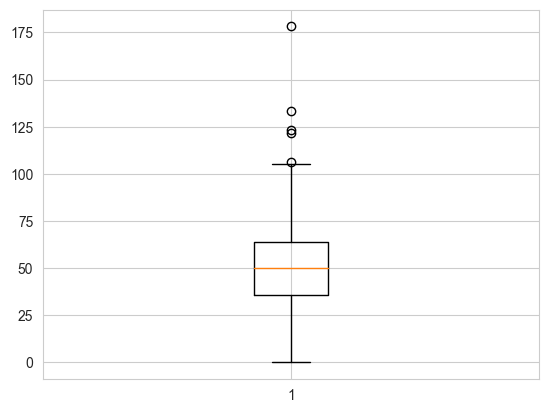

In [38]:
plt.boxplot(trips_delay)
plt.show

Number of minutes of delay grouped by place. Note we also have 69836 delay minutes for average incidents

In [39]:
delay_per_station = data.incidents.groupby('Place')['Number of minutes delay'].sum()
delay_per_station

Place
-                           69836
aarschot                     4287
anderlecht-rooster oost      2060
anderlecht-rooster west      1303
ans                          1849
                            ...  
y.ruisbroek                  5565
y.sint-katherina-lombeek     1319
y.west berchem               1170
zellik                       2149
zwijndrecht                  1347
Name: Number of minutes delay, Length: 113, dtype: int64

We choose to allocate these minutes of delay based on the number of travelers per place.

In [40]:
data.travelers["sum"] = data.travelers["week"] + data.travelers["saturday"] + data.travelers["sunday"]
frequency_travelers = data.travelers[["Station", "sum"]].sort_values(by = ["sum"], ascending = False)
frequency_travelers

Station       sum
83   brussel-centraal/bruxelles-central  106069.0
197                   gent-sint-pieters  101227.0
88         brussel-noord/bruxelles-nord   87982.0
16                   antwerpen-centraal   82099.0
306                              leuven   59739.0
..                                  ...       ...
46                              beignée      20.0
224                            harchies      17.0
346                             maubray      15.0
99                           callenelle      12.0
255                             hourpes       7.0

[553 rows x 2 columns]

In [ ]:
# check if the union of these groups
